# Accunts classifications 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from time import sleep
from time import process_time
from datetime import datetime
import itertools

#Preprocessamento
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import cross_validate, cross_val_score


#Avaliacao do Modelo
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#SVM
from sklearn import svm

#Voting CLassifier
from sklearn.ensemble import VotingClassifier

#Grid Search
from sklearn.model_selection import GridSearchCV
from itertools import permutations 
from itertools import combinations_with_replacement 
from sklearn.metrics import roc_auc_score, make_scorer

### Funções a serem usadas

In [2]:
def valueMetrics(y_test, y_predict):

    print('-------')
    print('Metrics')
    print('-------')

    print('Acurácia:', metrics.accuracy_score(y_test, y_predict))
    
    print('\n------------')
    print('Micro: Calcule métricas globalmente, contando o total de tp, fn e fp.')
    print('Micro: Calcule métricas para cada classe e encontre sua média não ponderada.')
    print('------------')
    
    print('\nPrecisão normal:', metrics.precision_score(y_test, y_predict))
    print('Precisão macro:', metrics.precision_score(y_test, y_predict, average='macro'))
    print('Precisão micro:', metrics.precision_score(y_test, y_predict, average='micro'))
    
    print('\nRecall normal:', metrics.recall_score(y_test, y_predict))
    print('\nRecall macro:', metrics.recall_score(y_test, y_predict, average='macro'))
    print('Recall micro:', metrics.recall_score(y_test, y_predict, average='micro'))
    
    print('\nF1-Score normal:', metrics.f1_score(y_test, y_predict ))
    print('\nF1-Score macro:', metrics.f1_score(y_test, y_predict ,average='macro'))
    print('F1-Score micro:', metrics.f1_score(y_test, y_predict ,average='micro'))
    
    print('\nFbeta1 normal:', metrics.fbeta_score(y_test, y_predict, beta=1))
    print('\nFbeta1 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=1))
    print('Fbeta1 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=1))
    
    print('\nFbeta2 normal:', metrics.fbeta_score(y_test, y_predict ,beta=2))
    print('\nFbeta2 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=2))
    print('Fbeta2 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=2))
    
    print('\nFbeta200 normal:', metrics.fbeta_score(y_test, y_predict ,beta=200))
    print('\nFbeta200 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=200))
    print('Fbeta200 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=200))
    

In [3]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [4]:
def analysis(X_test, y_test, y_predict, model,text):
    print(text, end='\n\n')

    print(classification_report(y_test, y_predict))

    acuracy = metrics.accuracy_score(y_test, y_predict)
    precision = metrics.precision_score(y_test, y_predict)
    recall= metrics.recall_score(y_test, y_predict)
    f_score = metrics.f1_score(y_test, y_predict)
    f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
    ROC_auc_curve = metrics.roc_auc_score(y_test, y_predict)
    MCC = metrics.matthews_corrcoef(y_test, y_predict)
    
    
    TP = len(y_test[(y_test==1) & (y_predict==1)]) #é falha 3% -> True Positive
    TN = len(y_test[(y_test==0) & (y_predict==0)]) #não é falha 97% -> True Negative
    
    
    tp = len(y_test[(y_test==1) & (y_predict==1)])
    tn = len(y_test[(y_test==0) & (y_predict==0)])
    fp = len(y_test[(y_test==0) & (y_predict==1)])
    fn = len(y_test[(y_test==1) & (y_predict==0)])  
    
    
    
    #print(metrics.matthews_corrcoef(y_test, y_predict), MCC)
    
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn]
    #print('[acuracy, precision, recall, f_score, f_beta, MCC, TP, TN, ROC_auc_curve]')
    #print(results)
    
    results_metrics = metrics_structure()
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC_auc_curve]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[text], columns=results_metrics.columns))
    print(results_metrics)

    
    
    #Compute confusion matrix

    cnf_matrix = confusion_matrix(y_test, y_predict)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,[0,1])
    plt.show()

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
def count_sent_recived(accounts, user_to, user_from):
    '''
    Calcula a quantidade de vezes que uma conta recebeu e enviou transações.
    Receber como parâmetro a lista de contas, a lista de user_to e user_from
    '''
    sent = []
    received = []
    for i in tqdm(accounts): 
        s = np.count_nonzero(user_to == i)
        r = np.count_nonzero(user_from == i)
        
        sent.append(s)
        received.append(r)
    
    sent, received = pd.Series(sent), pd.Series(received)

    return sent, received
        

In [7]:
def count_contracts(df, accounts):
    '''
    Função para calcular a quantidade de contratos que uma conta envia e quantos
    contratos ela recebe. Para isso a função recebe a base de dados das transações
    e as contas presentes na base
    '''
    contracts_sent = []
    contracts_received = []
    
    for a in tqdm(accounts):
        
        c_s = sum(df.value[df.user_from == a] == 0)
        contracts_sent.append(c_s)
        
        c_r = sum(df.value[df.user_to == a] == 0)
        contracts_received.append(c_r)
        
    return contracts_sent, contracts_received

In [8]:
def feature_importance(model,plot=True):
    '''
    Calcula a feature importance da ávore de decisão
    '''
    
    importances = pd.DataFrame({'feature':['saldo em ether','total de transações', 'transações enviadas',
                                           'transações recebidas', 'contratos enviados', 'contratos recebidos'],
                            'importance':np.round(model.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False)
    
    
    values = importances.importance.values
    labels = importances.feature.values
    y_pos = np.arange(len(labels))

    if plot:
        plt.bar([x for x in range(len(values))], values)
        plt.xticks(y_pos, labels, rotation = 45, ha='right')
        plt.show()
    
    

In [9]:
def normalize(*args):
    '''
    Normaliza os dados entre 0 e 1
    '''
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    lista = [scaler.fit_transform(a) for a in args]

    return(lista)
    

In [10]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [11]:
def plot_dct(dct,string):
    features = ['balance_ether','total_transactions',
                'sent','received','n_contracts_sent','n_contracts_received']
    
    export_graphviz(dct, out_file="mytree"+string+".dot",  
                     feature_names=features, filled=True,rounded=True, special_characters=True)  

In [12]:
def cv(X, y, model, name, balancer = None, params=None):

    results_cv = metrics_structure()
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    auc_media = 0
    
    skfold = StratifiedKFold(n_splits=10)
    
    for fold, (train_index, test_index) in tqdm(enumerate(skfold.split(X, y), 1)):
        start_time = time.time()
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]  # See comment on ravel and  y_train
        if balancer is not None:
            X_train, y_train = balancer.fit_resample(X_train, y_train)
        model.fit(X_train, y_train)
        
        y_predict = model.predict(X_test)
        print(f'For fold {fold}:')
        acuracy = metrics.accuracy_score(y_test, y_predict)
        precision = metrics.precision_score(y_test, y_predict)
        recall = metrics.recall_score(y_test, y_predict)
        f_score = metrics.f1_score(y_test, y_predict)
        f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
        ROC = metrics.roc_auc_score(y_test, y_predict)
        MCC = metrics.matthews_corrcoef(y_test, y_predict)
        TP = len(y_test[(y_test==1) & (y_predict==1)])
        TN = len(y_test[(y_test==0) & (y_predict==0)])
        
        tp += y_test[(y_test==1) & (y_predict==1)].count()
        tn += y_test[(y_test==0) & (y_predict==0)].count()
        fp += y_test[(y_test==0) & (y_predict==1)].count()
        fn += y_test[(y_test==1) & (y_predict==0)].count() 
        

        
        result_fold = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC]
        results_cv = results_cv.append(pd.DataFrame([result_fold], index=[('Fold' + str(fold))], columns=results_cv.columns))
        
        analysis(X_test, y_test, y_predict, model, name)
        
        if fold == 1:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
        elif ROC > bestROC:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
            
        
        elapsed_time = time.time() - start_time
        print('Tempo gasto fold', fold, '-', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    
    acur = (tp+tn)/(tp+tn+fp+fn)
    prec = 0 if tp + fp == 0 else tp/(tp+fp)
    reca = 0 if tp + fn == 0 else tp/(tp+fn)
    fbeta = 0 if reca + prec == 0 else (2*reca*prec)/(reca+prec)
    fbeta2 = (0 if reca + prec == 0 else (5*reca*prec)/((4*prec)+reca))
    MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    auc = (tp/((tp+fn)*2)) + (tn/((tn+fp)*2))


    results_metrics = metrics_structure()
    results = [acur, prec, reca, fbeta, fbeta2, MCC, int(tp), int(tn), auc]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[name], columns=results_metrics.columns))
    
    #Se o modelo for grid search, ele vai plotar a decisão dos pesos
    if params != None:
        grid_search_plot_results(model, params)

    #Final confusion Matrix
    cm = np.array([[tn,fp],[fn,tp]])
    plot_confusion_matrix(cm,[0,1])
    
    return results_metrics, results_cv, bestModel

**Importando dados**

In [13]:
df = pd.read_csv('accounts_features.csv')

In [14]:
df

user_account  balance_ether  \
0      0x6fa6afbd40f328d5fd20fbbe5253d547307389cf       0.005608   
1      0x0bfaa3b3bdf2b139cb591a1b3426e49a1ae06088       0.171537   
2      0xf1b7d207849367dc95a0b5caca62e6dad6210138       0.042797   
3      0x691ddddf51283130bc36eb692a9d4bffc355d8f0       0.609213   
4      0xc2481568a941b2bd0056a5eec083d192a0c8e000       0.004468   
...                                           ...            ...   
17015  0x0536b0e0a6d6c5dae84ceb107c87d85920c2760c      20.000000   
17016  0x6d77dad50ad027561d365fc5aafd8953b47ba98c       0.000542   
17017  0x785144e1a9c96728fc00924ad2a44f3ce851294c       0.000000   
17018  0xa22aca6399f4aae3548fa4a16f85bc3b684fe936       0.106390   
17019  0x22f123091a99faf85b8e977d2ab4287782e11ccc       0.000000   

       balance_value  total_transactions  classification  sent  received  \
0               2.19                 845               0     1        29   
1              67.13               26350               0     9       420   
2              16.75                  91               0     0         4   
3             238.42                1405               0     0        36   
4               1.75                  90               0     0         3   
...              ...                 ...             ...   ...       ...   
17015           0.01                  10               0     1         1   
17016           0.21                   5               0     0         1   
17017           0.00                  18               0     0         1   
17018          41.18                1117               0     0        12   
17019           0.00                   6               0     0         1   

       n_contracts_sent  n_contracts_received  
0                    29                     0  
1                   311                     0  
2                     4                     0  
3                    36                     0  
4                     3                     0  
...                 ...                   ...  
17015                 0                     0  
17016                 0                     0  
17017                 1                     0  
17018                12                     0  
17019                 1                     0  

[17020 rows x 9 columns]

In [15]:
#df_transactions = pd.read_csv('dataset_fix_20200810.csv')

In [16]:
#sent, received = count_sent_recived(df.user_account, df_transactions.user_to, df_transactions.user_from)

In [17]:
#c_s, c_r = count_contracts(df_transactions, df.user_account)

In [18]:
'''
df['sent'] = sent
df['received'] = received
df['n_contracts_sent'] = c_s
df['n_contracts_received'] = c_r
'''

"\ndf['sent'] = sent\ndf['received'] = received\ndf['n_contracts_sent'] = c_s\ndf['n_contracts_received'] = c_r\n"

Tomando em consideração:

Normal user = 0

Exchange = 1

In [19]:
#classes = df.classification

In [20]:
'''
df['classification'] = df['classification'].replace('Normal user', 0)
df['classification'] = df['classification'].replace('Exchange', 1)
'''

"\ndf['classification'] = df['classification'].replace('Normal user', 0)\ndf['classification'] = df['classification'].replace('Exchange', 1)\n"

In [21]:
#df.to_csv('accounts_features.csv', index=False)

Os parâmetros a serem usados serão *balance_ether* e *total_transactions*. Como *balance_value* é o valor em dólar, essas duas features são diretamente correlacionadas

**Preprocessamento dos dados**

In [22]:
X = df.iloc[:,[1,3,5,6,7,8]]
y = df.iloc[:, 4]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [24]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 11832, 1: 82})
Counter({0: 5071, 1: 35})


**Undersample, Oversample e SMOTE**

In [25]:
#Random Oversample 
ros = RandomUnderSampler()
#Randoom Undersample
rus = RandomUnderSampler()
#SMOTE
smt = SMOTE()

**Armazenamento dos classificadores e dos resultados**

In [26]:
#DataFrame com os resultados finais
all_results = metrics_structure()

#Lista com os classificadores
estimators = []

### K-Nearest Neighbours

In [27]:
#Gera o modelo
knn = KNeighborsClassifier()

estimators.append(('KNN',knn))

**Cross-Validation sem balanceamento**

For fold 1:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.29      0.36      0.32        11

    accuracy                           0.99      1702
   macro avg       0.64      0.68      0.66      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.990012   0.285714  0.363636      0.32  0.344828  0.317369   

                 TP      TN  ROC Curve  
KNN No Balance  4.0  1681.0   0.678861  
Confusion matrix, without normalization
[[1681   10]
 [   7    4]]


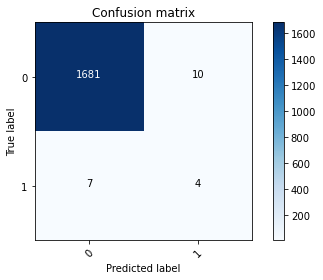

best fold 1
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.29      0.36      0.32        11

    accuracy                           0.99      1702
   macro avg       0.64      0.68      0.66      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.990012   0.285714  0.363636      0.32  0.344828  0.317369   

                 TP      TN  ROC Curve  
KNN No Balance  4.0  1681.0   0.678861  
Confusion matrix, without normalization
[[1681   10]
 [   7    4]]


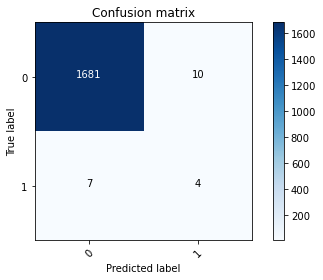

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.82      0.64        11

    accuracy                           0.99      1702
   macro avg       0.76      0.91      0.82      1702
weighted avg       1.00      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.994125   0.529412  0.818182  0.642857  0.737705  0.655504   

                 TP      TN  ROC Curve  
KNN No Balance  9.0  1683.0   0.906725  
Confusion matrix, without normalization
[[1683    8]
 [   2    9]]


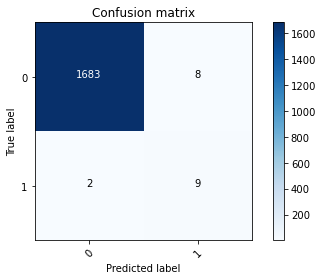

best fold 2
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.82      0.64        11

    accuracy                           0.99      1702
   macro avg       0.76      0.91      0.82      1702
weighted avg       1.00      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.994125   0.529412  0.818182  0.642857  0.737705  0.655504   

                 TP      TN  ROC Curve  
KNN No Balance  9.0  1683.0   0.906725  
Confusion matrix, without normalization
[[1683    8]
 [   2    9]]


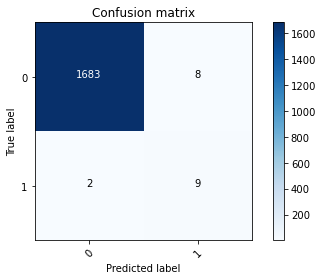

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.75      0.27      0.40        11

    accuracy                           0.99      1702
   macro avg       0.87      0.64      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
KNN No Balance  0.994712       0.75  0.272727       0.4  0.3125  0.450355   

                 TP      TN  ROC Curve  
KNN No Balance  3.0  1690.0   0.636068  
Confusion matrix, without normalization
[[1690    1]
 [   8    3]]


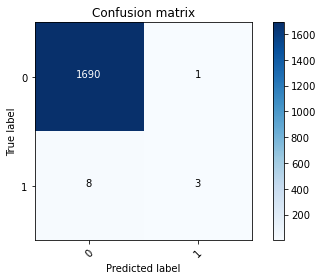

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.83      0.42      0.56        12

    accuracy                           1.00      1702
   macro avg       0.91      0.71      0.78      1702
weighted avg       0.99      1.00      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance   0.9953   0.833333  0.416667  0.555556  0.462963  0.587377   

                 TP      TN  ROC Curve  
KNN No Balance  5.0  1689.0   0.708037  
Confusion matrix, without normalization
[[1689    1]
 [   7    5]]


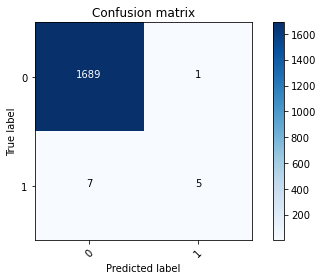

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.996475        1.0     0.5  0.666667  0.555556  0.705855   

                 TP      TN  ROC Curve  
KNN No Balance  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


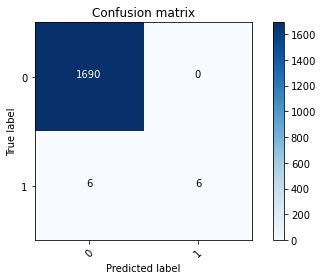

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.86      0.50      0.63        12

    accuracy                           1.00      1702
   macro avg       0.93      0.75      0.81      1702
weighted avg       1.00      1.00      1.00      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.995887   0.857143     0.5  0.631579  0.545455  0.652914   

                 TP      TN  ROC Curve  
KNN No Balance  6.0  1689.0   0.749704  
Confusion matrix, without normalization
[[1689    1]
 [   6    6]]


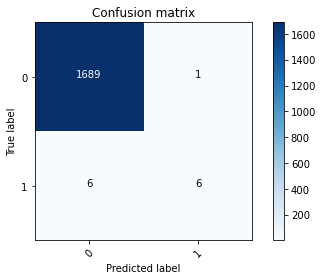

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta      MCC  \
KNN No Balance  0.993537        1.0  0.083333  0.153846  0.102041  0.28774   

                 TP      TN  ROC Curve  
KNN No Balance  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


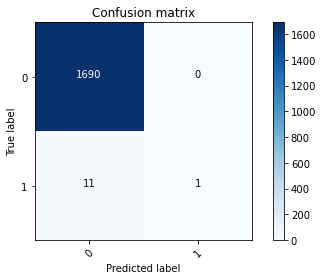

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
KNN No Balance  0.992949        0.5  0.083333  0.142857     0.1  0.202078   

                 TP      TN  ROC Curve  
KNN No Balance  1.0  1689.0   0.541371  
Confusion matrix, without normalization
[[1689    1]
 [  11    1]]


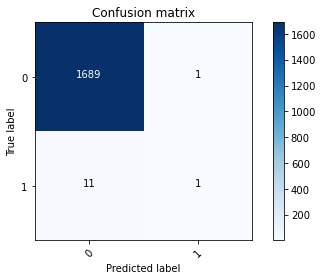

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
KNN No Balance  0.992949        0.5  0.083333  0.142857     0.1  0.202078   

                 TP      TN  ROC Curve  
KNN No Balance  1.0  1689.0   0.541371  
Confusion matrix, without normalization
[[1689    1]
 [  11    1]]


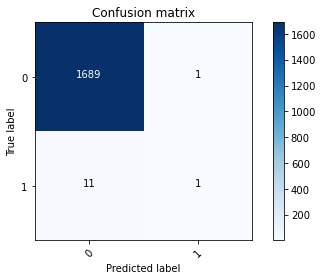

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.25      0.40        12

    accuracy                           0.99      1702
   macro avg       1.00      0.62      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN No Balance  0.994712        1.0    0.25       0.4  0.294118  0.498674   

                 TP      TN  ROC Curve  
KNN No Balance  3.0  1690.0      0.625  
Confusion matrix, without normalization
[[1690    0]
 [   9    3]]


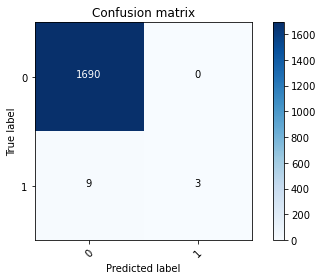

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16880    23]
 [   78    39]]


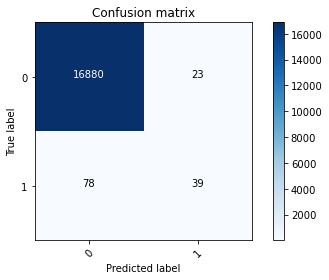

In [28]:
results_metrics, results_cv, bestModel = cv(X,y,knn,'KNN No Balance')

all_results = all_results.append(results_metrics)

**Cross_validation UnderSample**

For fold 1:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1691
           1       0.04      1.00      0.07        11

    accuracy                           0.84      1702
   macro avg       0.52      0.92      0.49      1702
weighted avg       0.99      0.84      0.90      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.835488   0.037801     1.0  0.072848  0.164179  0.177599   

                   TP      TN  ROC Curve  
KNN UnderSample  11.0  1411.0   0.917209  
Confusion matrix, without normalization
[[1411  280]
 [   0   11]]


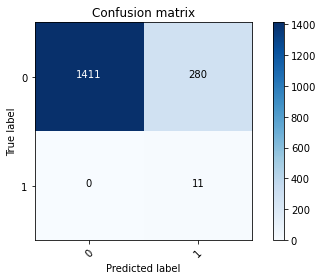

best fold 1
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1691
           1       0.04      1.00      0.07        11

    accuracy                           0.84      1702
   macro avg       0.52      0.92      0.49      1702
weighted avg       0.99      0.84      0.90      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.835488   0.037801     1.0  0.072848  0.164179  0.177599   

                   TP      TN  ROC Curve  
KNN UnderSample  11.0  1411.0   0.917209  
Confusion matrix, without normalization
[[1411  280]
 [   0   11]]


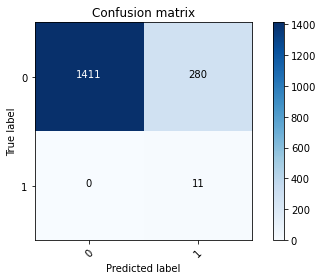

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.877791   0.050228     1.0  0.095652  0.209125  0.209881   

                   TP      TN  ROC Curve  
KNN UnderSample  11.0  1483.0   0.938498  
Confusion matrix, without normalization
[[1483  208]
 [   0   11]]


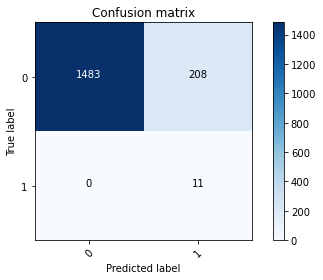

best fold 2
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.877791   0.050228     1.0  0.095652  0.209125  0.209881   

                   TP      TN  ROC Curve  
KNN UnderSample  11.0  1483.0   0.938498  
Confusion matrix, without normalization
[[1483  208]
 [   0   11]]


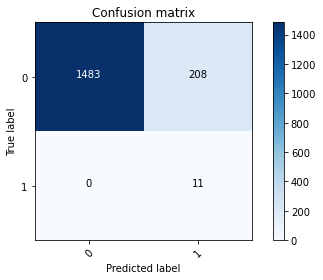

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      0.91      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.91      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                 Acuracy  Precision    Recall  F1-score    F-beta      MCC  \
KNN UnderSample  0.90188   0.056818  0.909091  0.106952  0.227273  0.21341   

                   TP      TN  ROC Curve  
KNN UnderSample  10.0  1525.0   0.905462  
Confusion matrix, without normalization
[[1525  166]
 [   1   10]]


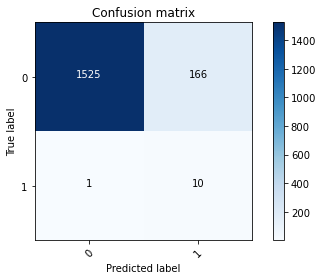

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.18        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.934195   0.096774     1.0  0.176471  0.348837  0.300601   

                   TP      TN  ROC Curve  
KNN UnderSample  12.0  1578.0   0.966864  
Confusion matrix, without normalization
[[1578  112]
 [   0   12]]


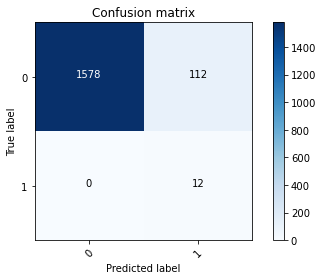

best fold 4
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.18        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.934195   0.096774     1.0  0.176471  0.348837  0.300601   

                   TP      TN  ROC Curve  
KNN UnderSample  12.0  1578.0   0.966864  
Confusion matrix, without normalization
[[1578  112]
 [   0   12]]


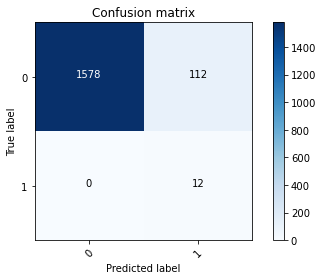

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.93302   0.095238     1.0  0.173913  0.344828  0.298016   

                   TP      TN  ROC Curve  
KNN UnderSample  12.0  1576.0   0.966272  
Confusion matrix, without normalization
[[1576  114]
 [   0   12]]


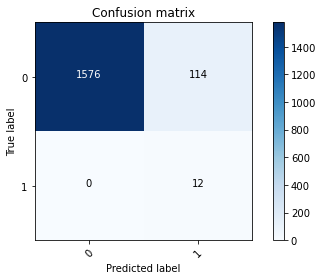

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.11      0.92      0.19        12

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                  Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.945946   0.107843  0.916667  0.192982  0.366667  0.304155   

                   TP      TN  ROC Curve  
KNN UnderSample  11.0  1599.0    0.93141  
Confusion matrix, without normalization
[[1599   91]
 [   1   11]]


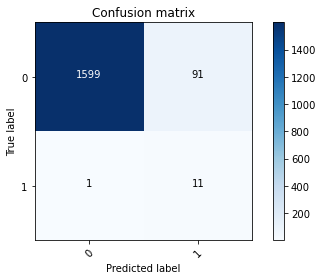

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.13      0.75      0.22        12

    accuracy                           0.96      1702
   macro avg       0.56      0.86      0.60      1702
weighted avg       0.99      0.96      0.98      1702

                 Acuracy  Precision  Recall  F1-score    F-beta      MCC   TP  \
KNN UnderSample  0.96181   0.126761    0.75  0.216867  0.378151  0.29851  9.0   

                     TN  ROC Curve  
KNN UnderSample  1628.0   0.856657  
Confusion matrix, without normalization
[[1628   62]
 [   3    9]]


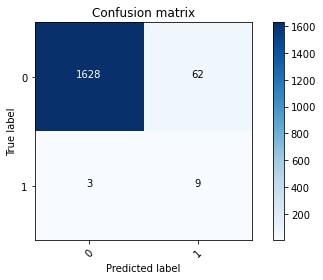

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.13      0.75      0.22        12

    accuracy                           0.96      1702
   macro avg       0.56      0.86      0.60      1702
weighted avg       0.99      0.96      0.98      1702

                  Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.962397   0.128571    0.75  0.219512  0.381356  0.300791   

                  TP      TN  ROC Curve  
KNN UnderSample  9.0  1629.0   0.856953  
Confusion matrix, without normalization
[[1629   61]
 [   3    9]]


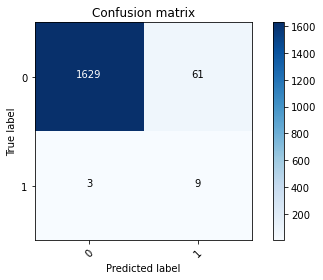

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.11      0.58      0.19        12

    accuracy                           0.96      1702
   macro avg       0.55      0.78      0.59      1702
weighted avg       0.99      0.96      0.98      1702

                  Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.964747   0.112903  0.583333  0.189189  0.318182  0.245981   

                  TP      TN  ROC Curve  
KNN UnderSample  7.0  1635.0   0.775394  
Confusion matrix, without normalization
[[1635   55]
 [   5    7]]


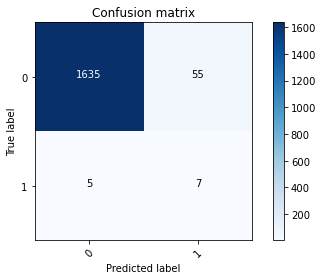

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.22      0.83      0.35        12

    accuracy                           0.98      1702
   macro avg       0.61      0.91      0.67      1702
weighted avg       0.99      0.98      0.98      1702

                  Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN UnderSample  0.978261   0.222222  0.833333  0.350877  0.537634  0.423795   

                   TP      TN  ROC Curve  
KNN UnderSample  10.0  1655.0   0.906312  
Confusion matrix, without normalization
[[1655   35]
 [   2   10]]


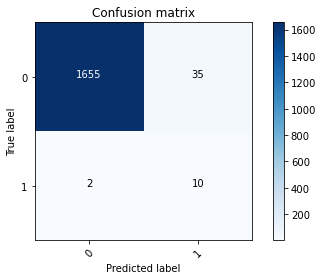

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15719  1184]
 [   15   102]]


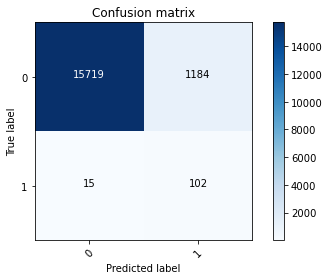

In [29]:
results_metrics, results_cv, bestModel = cv(X,y,knn,'KNN UnderSample', balancer=rus)

all_results = all_results.append(results_metrics)

**Cross_validation OverSample**

For fold 1:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.85      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.85      0.91      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.851939   0.041825     1.0  0.080292  0.179153  0.188659   

                  TP      TN  ROC Curve  
KNN OverSample  11.0  1439.0   0.925488  
Confusion matrix, without normalization
[[1439  252]
 [   0   11]]


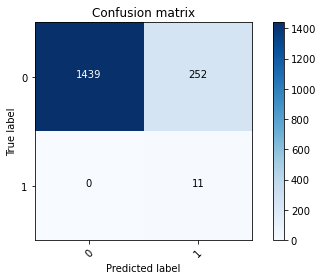

best fold 1
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.85      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.85      0.91      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.851939   0.041825     1.0  0.080292  0.179153  0.188659   

                  TP      TN  ROC Curve  
KNN OverSample  11.0  1439.0   0.925488  
Confusion matrix, without normalization
[[1439  252]
 [   0   11]]


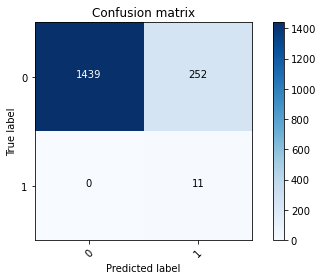

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.83      0.91      1691
           1       0.04      1.00      0.07        11

    accuracy                           0.83      1702
   macro avg       0.52      0.92      0.49      1702
weighted avg       0.99      0.83      0.90      1702

                 Acuracy  Precision  Recall  F1-score   F-beta       MCC  \
KNN OverSample  0.831962   0.037037     1.0  0.071429  0.16129  0.175422   

                  TP      TN  ROC Curve  
KNN OverSample  11.0  1405.0   0.915435  
Confusion matrix, without normalization
[[1405  286]
 [   0   11]]


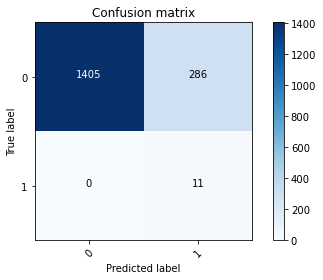

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1691
           1       0.05      0.91      0.10        11

    accuracy                           0.90      1702
   macro avg       0.53      0.90      0.52      1702
weighted avg       0.99      0.90      0.94      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.896005   0.053763  0.909091  0.101523  0.217391  0.206759   

                  TP      TN  ROC Curve  
KNN OverSample  10.0  1515.0   0.902505  
Confusion matrix, without normalization
[[1515  176]
 [   1   10]]


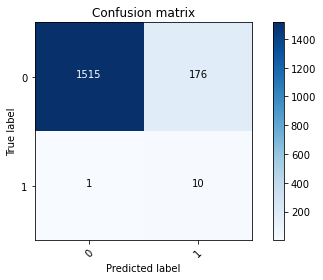

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.928907   0.090226     1.0  0.165517  0.331492  0.289423   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1569.0   0.964201  
Confusion matrix, without normalization
[[1569  121]
 [   0   12]]


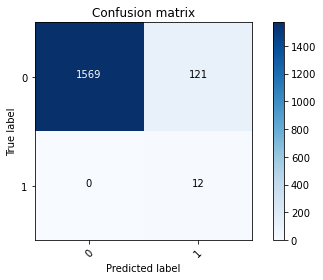

best fold 4
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.928907   0.090226     1.0  0.165517  0.331492  0.289423   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1569.0   0.964201  
Confusion matrix, without normalization
[[1569  121]
 [   0   12]]


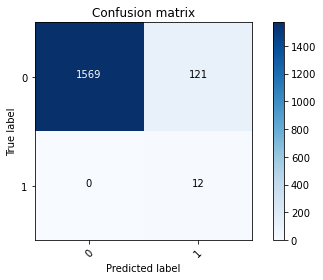

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.96      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                 Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
KNN OverSample  0.930082   0.091603     1.0  0.167832  0.335196  0.29181   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1571.0   0.964793  
Confusion matrix, without normalization
[[1571  119]
 [   0   12]]


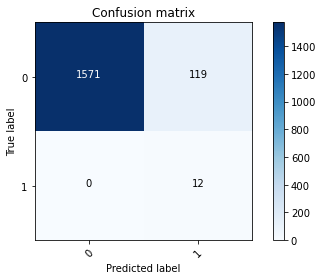

best fold 5
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.96      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                 Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
KNN OverSample  0.930082   0.091603     1.0  0.167832  0.335196  0.29181   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1571.0   0.964793  
Confusion matrix, without normalization
[[1571  119]
 [   0   12]]


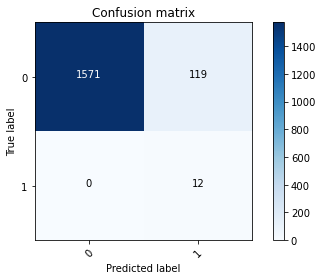

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      0.92      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.950059   0.115789  0.916667  0.205607  0.384615  0.315984   

                  TP      TN  ROC Curve  
KNN OverSample  11.0  1606.0   0.933481  
Confusion matrix, without normalization
[[1606   84]
 [   1   11]]


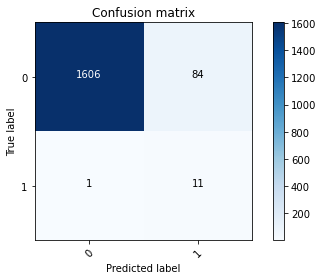

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.24      0.75      0.37        12

    accuracy                           0.98      1702
   macro avg       0.62      0.87      0.68      1702
weighted avg       0.99      0.98      0.99      1702

                 Acuracy  Precision  Recall  F1-score    F-beta      MCC   TP  \
KNN OverSample  0.981786   0.243243    0.75  0.367347  0.529412  0.42081  9.0   

                    TN  ROC Curve  
KNN OverSample  1662.0   0.866716  
Confusion matrix, without normalization
[[1662   28]
 [   3    9]]


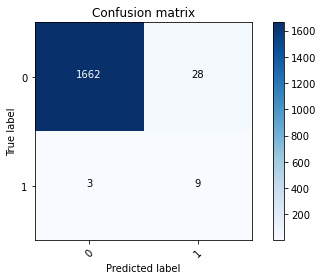

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      1.00      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.957697   0.142857     1.0      0.25  0.454545  0.369826   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1618.0   0.978698  
Confusion matrix, without normalization
[[1618   72]
 [   0   12]]


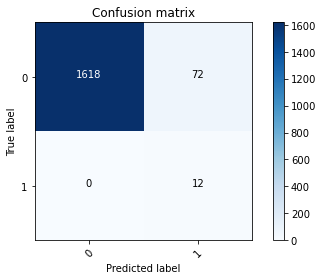

best fold 8
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      1.00      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                 Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.957697   0.142857     1.0      0.25  0.454545  0.369826   

                  TP      TN  ROC Curve  
KNN OverSample  12.0  1618.0   0.978698  
Confusion matrix, without normalization
[[1618   72]
 [   0   12]]


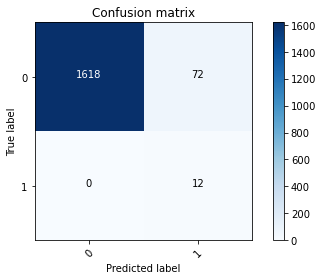

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.16      0.92      0.28        12

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.965922   0.161765  0.916667     0.275  0.474138  0.377211   

                  TP      TN  ROC Curve  
KNN OverSample  11.0  1633.0   0.941469  
Confusion matrix, without normalization
[[1633   57]
 [   1   11]]


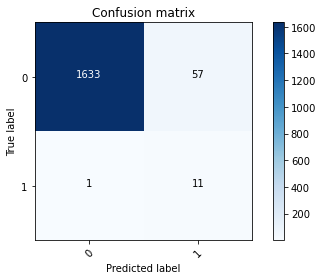

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      0.83      0.42        12

    accuracy                           0.98      1702
   macro avg       0.64      0.91      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                 Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN OverSample  0.983549   0.277778  0.833333  0.416667  0.595238  0.475632   

                  TP      TN  ROC Curve  
KNN OverSample  10.0  1664.0   0.908974  
Confusion matrix, without normalization
[[1664   26]
 [   2   10]]


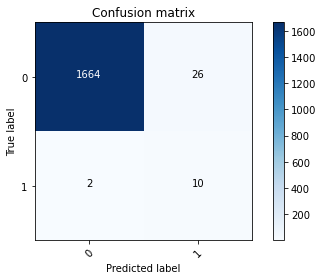

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15682  1221]
 [    8   109]]


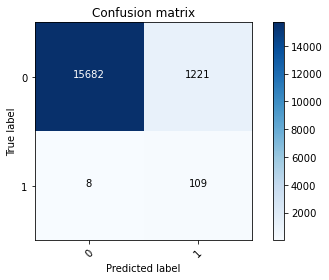

In [30]:
results_metrics, results_cv, bestModel = cv(X,y,knn,'KNN OverSample', balancer=ros)

all_results = all_results.append(results_metrics)

**Cross_validation SMOTE**

For fold 1:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.883079   0.052381     1.0  0.099548  0.216535  0.214981  11.0   

               TN  ROC Curve  
KNN Smote  1492.0   0.941159  
Confusion matrix, without normalization
[[1492  199]
 [   0   11]]


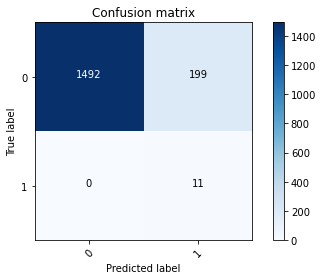

best fold 1
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.883079   0.052381     1.0  0.099548  0.216535  0.214981  11.0   

               TN  ROC Curve  
KNN Smote  1492.0   0.941159  
Confusion matrix, without normalization
[[1492  199]
 [   0   11]]


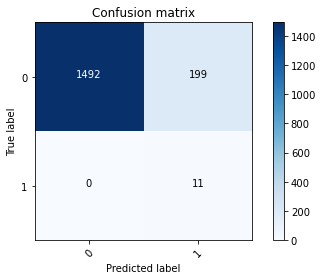

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.13        11

    accuracy                           0.92      1702
   macro avg       0.53      0.91      0.54      1702
weighted avg       0.99      0.92      0.95      1702

            Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.920682   0.069444  0.909091  0.129032  0.265957  0.238947  10.0   

               TN  ROC Curve  
KNN Smote  1557.0   0.914924  
Confusion matrix, without normalization
[[1557  134]
 [   1   10]]


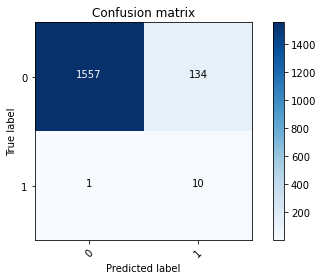

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.08      0.91      0.15        11

    accuracy                           0.94      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.94      0.96      1702

           Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.93537   0.084034  0.909091  0.153846  0.306748  0.265413  10.0   

               TN  ROC Curve  
KNN Smote  1582.0   0.922316  
Confusion matrix, without normalization
[[1582  109]
 [   1   10]]


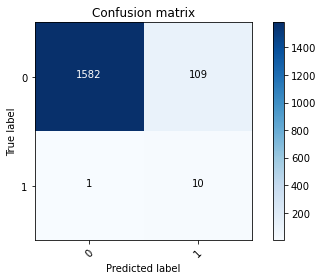

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.60      1702
weighted avg       0.99      0.95      0.97      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.949471   0.122449     1.0  0.218182  0.410959  0.340907  12.0   

               TN  ROC Curve  
KNN Smote  1604.0   0.974556  
Confusion matrix, without normalization
[[1604   86]
 [   0   12]]


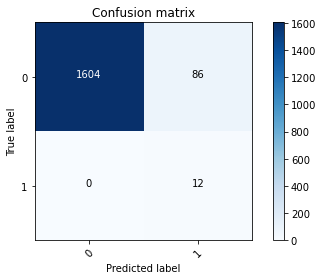

best fold 4
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.60      1702
weighted avg       0.99      0.95      0.97      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.949471   0.122449     1.0  0.218182  0.410959  0.340907  12.0   

               TN  ROC Curve  
KNN Smote  1604.0   0.974556  
Confusion matrix, without normalization
[[1604   86]
 [   0   12]]


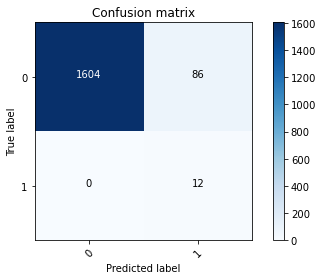

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.24        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.95      0.97      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.954172   0.133333     1.0  0.235294  0.434783  0.356622  12.0   

               TN  ROC Curve  
KNN Smote  1612.0   0.976923  
Confusion matrix, without normalization
[[1612   78]
 [   0   12]]


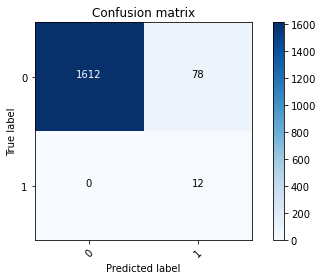

best fold 5
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.24        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.95      0.97      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.954172   0.133333     1.0  0.235294  0.434783  0.356622  12.0   

               TN  ROC Curve  
KNN Smote  1612.0   0.976923  
Confusion matrix, without normalization
[[1612   78]
 [   0   12]]


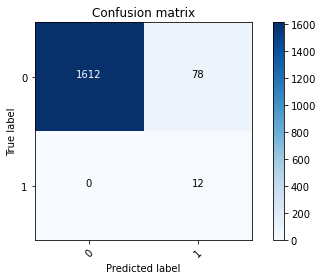

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.23        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.952996   0.130435     1.0  0.230769  0.428571  0.352506  12.0   

               TN  ROC Curve  
KNN Smote  1610.0   0.976331  
Confusion matrix, without normalization
[[1610   80]
 [   0   12]]


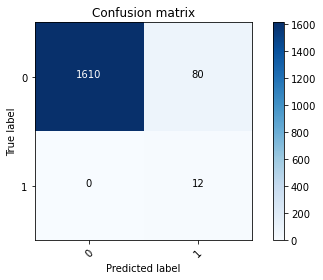

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.19      0.75      0.30        12

    accuracy                           0.98      1702
   macro avg       0.59      0.86      0.64      1702
weighted avg       0.99      0.98      0.98      1702

            Acuracy  Precision  Recall  F1-score   F-beta       MCC   TP  \
KNN Smote  0.975323     0.1875    0.75       0.3  0.46875  0.367396  9.0   

               TN  ROC Curve  
KNN Smote  1651.0   0.863462  
Confusion matrix, without normalization
[[1651   39]
 [   3    9]]


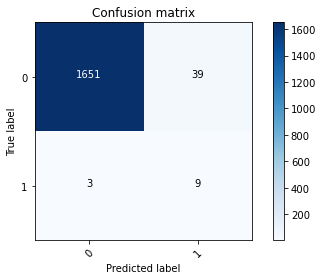

Tempo gasto fold 7 - 00:00:00
For fold 8:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.13      0.50      0.20        12

    accuracy                           0.97      1702
   macro avg       0.56      0.74      0.59      1702
weighted avg       0.99      0.97      0.98      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP  \
KNN Smote  0.972385    0.12766     0.5   0.20339  0.315789  0.242916  6.0   

               TN  ROC Curve  
KNN Smote  1649.0    0.73787  
Confusion matrix, without normalization
[[1649   41]
 [   6    6]]


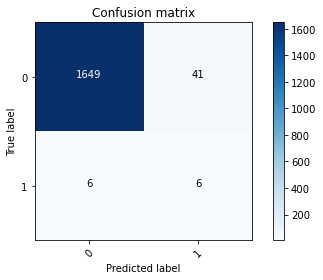

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.18      0.83      0.30        12

    accuracy                           0.97      1702
   macro avg       0.59      0.90      0.64      1702
weighted avg       0.99      0.97      0.98      1702

            Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
KNN Smote  0.972385   0.181818  0.833333  0.298507  0.485437  0.381699  10.0   

               TN  ROC Curve  
KNN Smote  1645.0   0.903353  
Confusion matrix, without normalization
[[1645   45]
 [   2   10]]


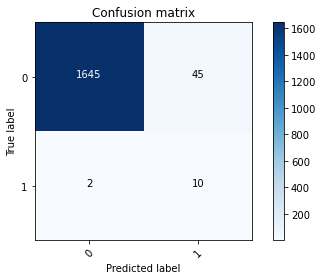

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.22      0.75      0.34        12

    accuracy                           0.98      1702
   macro avg       0.61      0.87      0.66      1702
weighted avg       0.99      0.98      0.98      1702

            Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP  \
KNN Smote  0.979436   0.219512    0.75  0.339623  0.505618  0.398945  9.0   

               TN  ROC Curve  
KNN Smote  1658.0   0.865533  
Confusion matrix, without normalization
[[1658   32]
 [   3    9]]


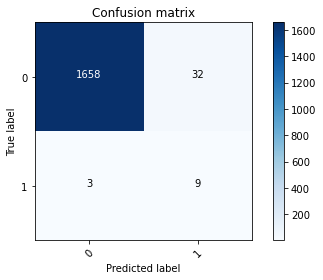

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16060   843]
 [   16   101]]


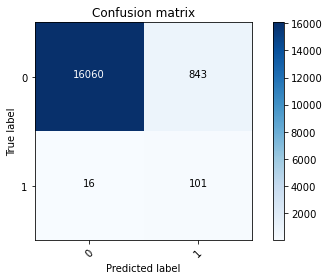

In [31]:
results_metrics, results_cv, bestModel = cv(X,y,knn,'KNN Smote', balancer=smt)
all_results = all_results.append(results_metrics)

In [32]:
all_results

Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
KNN No Balance   0.994066   0.629032  0.333333  0.435754  0.367925  0.455296   
KNN UnderSample  0.929553   0.079316  0.871795  0.145403  0.290764  0.250653   
KNN OverSample   0.927791   0.081955  0.931624  0.150657  0.303115  0.264562   
KNN Smote        0.949530   0.106992  0.863248  0.190386  0.357649  0.293623   

                    TP       TN  ROC Curve  
KNN No Balance    39.0  16880.0   0.665986  
KNN UnderSample  102.0  15719.0   0.900874  
KNN OverSample   109.0  15682.0   0.929694  
KNN Smote        101.0  16060.0   0.906688

### Decision Tree

In [33]:
dct = DecisionTreeClassifier(max_depth=5)

estimators.append(('DCT',dct))

**Cross_validation sem balanceamento**

For fold 1:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.33      0.36      0.35        11

    accuracy                           0.99      1702
   macro avg       0.66      0.68      0.67      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree No Balance  0.991187   0.333333  0.363636  0.347826  0.357143   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.343727  4.0  1683.0   0.679453  
Confusion matrix, without normalization
[[1683    8]
 [   7    4]]


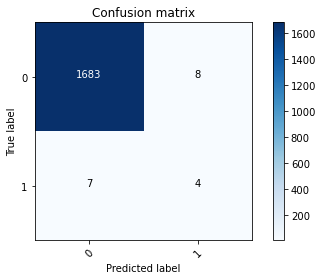

best fold 1
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.33      0.36      0.35        11

    accuracy                           0.99      1702
   macro avg       0.66      0.68      0.67      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree No Balance  0.991187   0.333333  0.363636  0.347826  0.357143   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.343727  4.0  1683.0   0.679453  
Confusion matrix, without normalization
[[1683    8]
 [   7    4]]


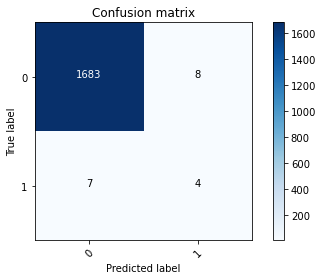

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.42      0.73      0.53        11

    accuracy                           0.99      1702
   macro avg       0.71      0.86      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree No Balance  0.991774   0.421053  0.727273  0.533333  0.634921   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.549724  8.0  1680.0   0.860384  
Confusion matrix, without normalization
[[1680   11]
 [   3    8]]


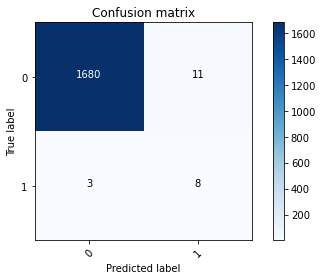

best fold 2
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.42      0.73      0.53        11

    accuracy                           0.99      1702
   macro avg       0.71      0.86      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree No Balance  0.991774   0.421053  0.727273  0.533333  0.634921   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.549724  8.0  1680.0   0.860384  
Confusion matrix, without normalization
[[1680   11]
 [   3    8]]


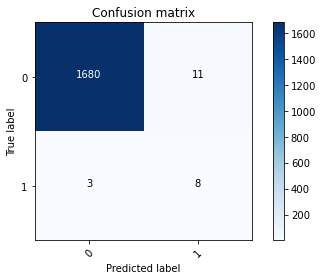

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.40      0.36      0.38        11

    accuracy                           0.99      1702
   macro avg       0.70      0.68      0.69      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score   F-beta  \
Decision Tree No Balance  0.992362        0.4  0.363636  0.380952  0.37037   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.377552  4.0  1685.0   0.680044  
Confusion matrix, without normalization
[[1685    6]
 [   7    4]]


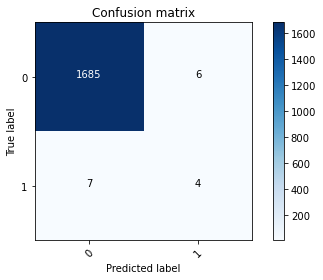

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.86      0.50      0.63        12

    accuracy                           1.00      1702
   macro avg       0.93      0.75      0.81      1702
weighted avg       1.00      1.00      1.00      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance  0.995887   0.857143     0.5  0.631579  0.545455   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.652914  6.0  1689.0   0.749704  
Confusion matrix, without normalization
[[1689    1]
 [   6    6]]


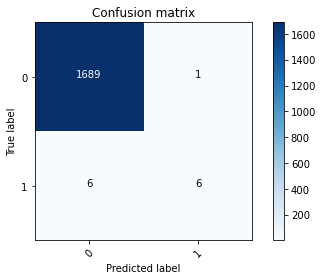

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.75      0.50      0.60        12

    accuracy                           1.00      1702
   macro avg       0.87      0.75      0.80      1702
weighted avg       0.99      1.00      0.99      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance   0.9953       0.75     0.5       0.6  0.535714   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.610201  6.0  1688.0   0.749408  
Confusion matrix, without normalization
[[1688    2]
 [   6    6]]


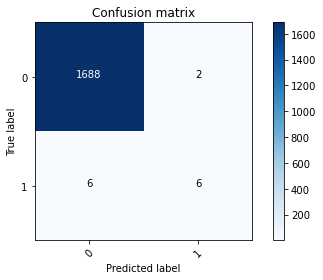

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


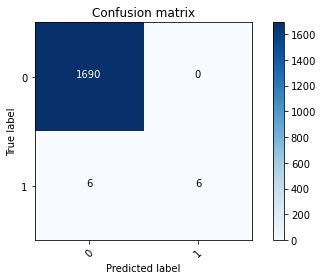

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.25      0.40        12

    accuracy                           0.99      1702
   macro avg       1.00      0.62      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance  0.994712        1.0    0.25       0.4  0.294118   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.498674  3.0  1690.0      0.625  
Confusion matrix, without normalization
[[1690    0]
 [   9    3]]


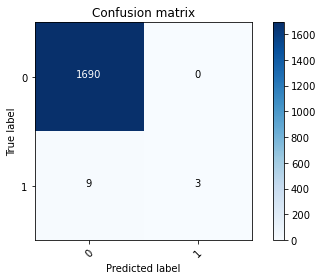

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                              MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


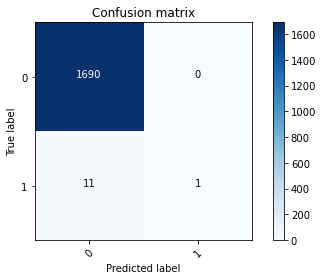

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.75      0.25      0.38        12

    accuracy                           0.99      1702
   macro avg       0.87      0.62      0.69      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance  0.994125       0.75    0.25     0.375  0.288462   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.430969  3.0  1689.0   0.624704  
Confusion matrix, without normalization
[[1689    1]
 [   9    3]]


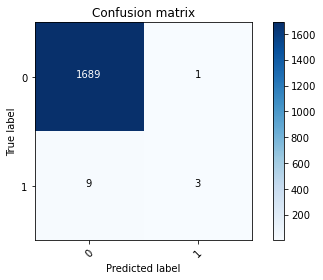

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.75      0.25      0.38        12

    accuracy                           0.99      1702
   macro avg       0.87      0.62      0.69      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree No Balance  0.994125       0.75    0.25     0.375  0.288462   

                               MCC   TP      TN  ROC Curve  
Decision Tree No Balance  0.430969  3.0  1689.0   0.624704  
Confusion matrix, without normalization
[[1689    1]
 [   9    3]]


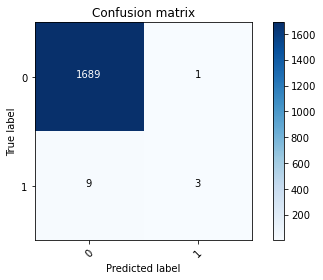

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16873    30]
 [   73    44]]


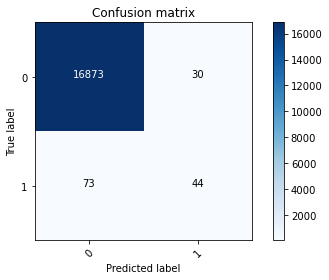

In [34]:
results_metrics, results_cv, bestModel = cv(X,y,dct,'Decision Tree No Balance')

all_results = all_results.append(results_metrics)

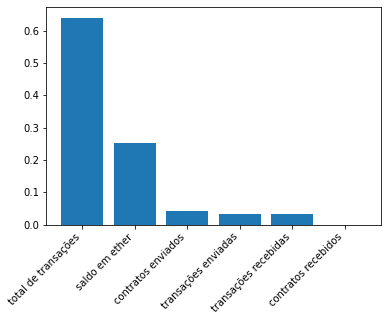

In [35]:
feature_importance(bestModel)

In [36]:
plot_dct(bestModel, 'no_balance')

**Cross_validation UnderSample**

For fold 1:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.897767   0.059459     1.0  0.112245  0.240175   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.230957  11.0  1517.0   0.948551  
Confusion matrix, without normalization
[[1517  174]
 [   0   11]]


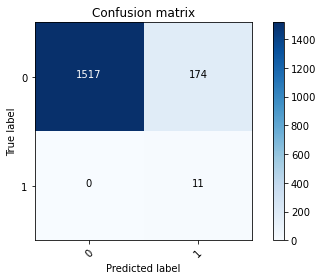

best fold 1
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.897767   0.059459     1.0  0.112245  0.240175   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.230957  11.0  1517.0   0.948551  
Confusion matrix, without normalization
[[1517  174]
 [   0   11]]


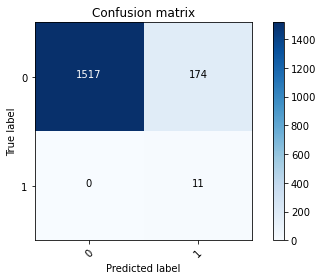

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.12        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score  F-beta  \
Decision Tree UnderSample  0.903055     0.0625     1.0  0.117647    0.25   

                               MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.23749  11.0  1526.0   0.951212  
Confusion matrix, without normalization
[[1526  165]
 [   0   11]]


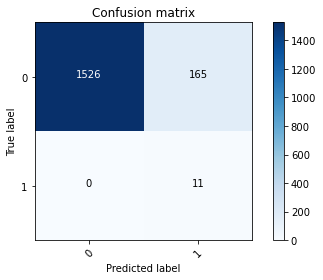

best fold 2
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.12        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score  F-beta  \
Decision Tree UnderSample  0.903055     0.0625     1.0  0.117647    0.25   

                               MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.23749  11.0  1526.0   0.951212  
Confusion matrix, without normalization
[[1526  165]
 [   0   11]]


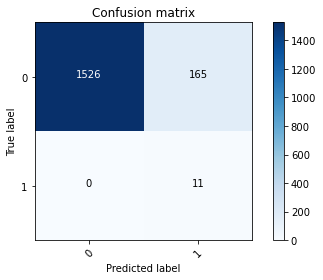

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      0.91      0.14        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.93      0.96      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.92832   0.076336  0.909091  0.140845  0.285714   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.251795  10.0  1570.0   0.918768  
Confusion matrix, without normalization
[[1570  121]
 [   1   10]]


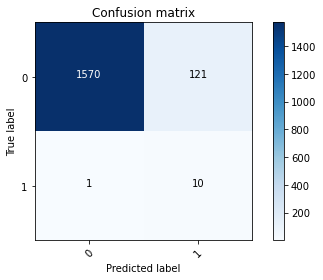

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1690
           1       0.09      1.00      0.16        12

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.925382   0.086331     1.0   0.15894  0.320856   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.282566  12.0  1563.0   0.962426  
Confusion matrix, without normalization
[[1563  127]
 [   0   12]]


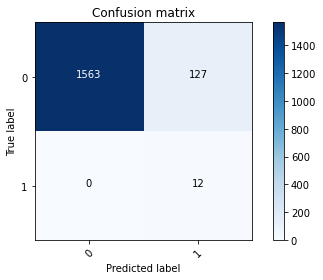

best fold 4
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1690
           1       0.09      1.00      0.16        12

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.925382   0.086331     1.0   0.15894  0.320856   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.282566  12.0  1563.0   0.962426  
Confusion matrix, without normalization
[[1563  127]
 [   0   12]]


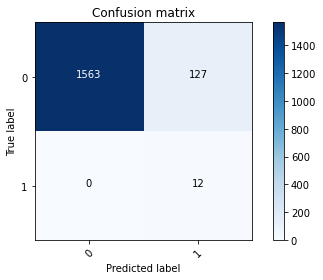

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.945946   0.115385     1.0  0.206897  0.394737   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.330308  12.0  1598.0   0.972781  
Confusion matrix, without normalization
[[1598   92]
 [   0   12]]


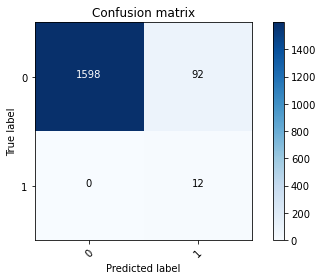

best fold 5
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.945946   0.115385     1.0  0.206897  0.394737   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.330308  12.0  1598.0   0.972781  
Confusion matrix, without normalization
[[1598   92]
 [   0   12]]


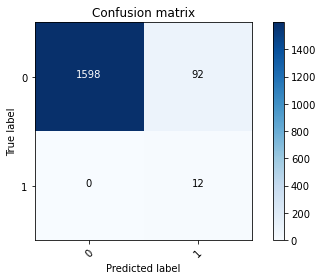

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.928907   0.090226     1.0  0.165517  0.331492   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.289423  12.0  1569.0   0.964201  
Confusion matrix, without normalization
[[1569  121]
 [   0   12]]


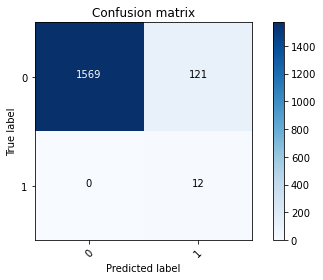

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.11      0.83      0.20        12

    accuracy                           0.95      1702
   macro avg       0.56      0.89      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision    Recall  F1-score   F-beta  \
Decision Tree UnderSample  0.953584   0.114943  0.833333   0.20202  0.37037   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.299287  10.0  1613.0   0.893886  
Confusion matrix, without normalization
[[1613   77]
 [   2   10]]


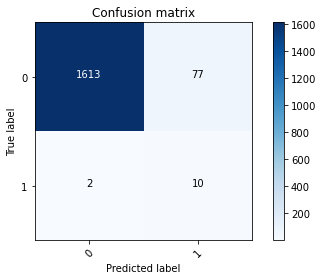

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.11      0.83      0.20        12

    accuracy                           0.95      1702
   macro avg       0.56      0.89      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision    Recall  F1-score   F-beta  \
Decision Tree UnderSample  0.953584   0.114943  0.833333   0.20202  0.37037   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.299287  10.0  1613.0   0.893886  
Confusion matrix, without normalization
[[1613   77]
 [   2   10]]


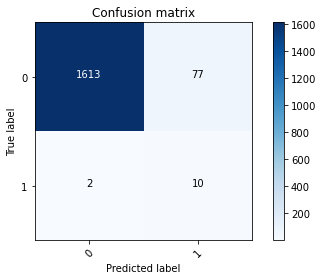

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.16      0.92      0.28        12

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree UnderSample  0.96651   0.164179  0.916667  0.278481  0.478261   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.380154  11.0  1634.0   0.941765  
Confusion matrix, without normalization
[[1634   56]
 [   1   11]]


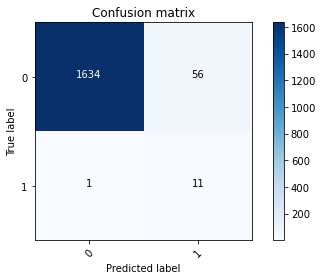

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.25        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                            Acuracy  Precision    Recall  F1-score  F-beta  \
Decision Tree UnderSample  0.960635   0.142857  0.916667  0.247191    0.44   

                                MCC    TP      TN  ROC Curve  
Decision Tree UnderSample  0.353318  11.0  1624.0   0.938807  
Confusion matrix, without normalization
[[1624   66]
 [   1   11]]


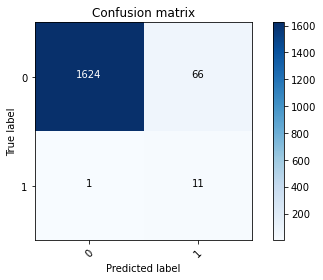

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15827  1076]
 [    7   110]]


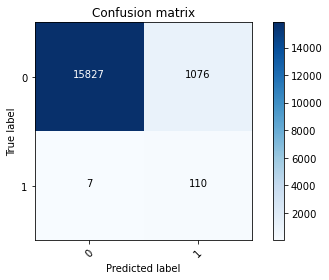

In [37]:
results_metrics, results_cv, bestModel = cv(X,y,dct,'Decision Tree UnderSample', balancer=rus)

all_results = all_results.append(results_metrics)

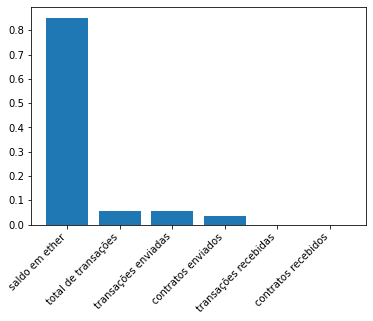

In [38]:
feature_importance(bestModel)

In [39]:
plot_dct(bestModel, 'under')

**Cross_validation OverSample**

For fold 1:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.86      0.92      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.864277   0.045455     1.0  0.086957  0.192308   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.198104  11.0  1460.0   0.931697  
Confusion matrix, without normalization
[[1460  231]
 [   0   11]]


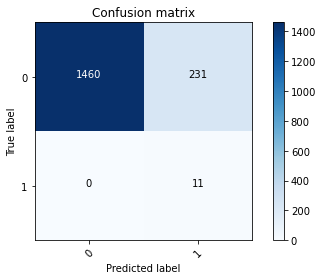

best fold 1
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.86      0.92      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.864277   0.045455     1.0  0.086957  0.192308   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.198104  11.0  1460.0   0.931697  
Confusion matrix, without normalization
[[1460  231]
 [   0   11]]


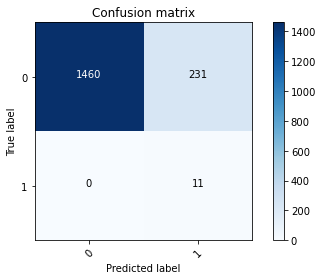

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1691
           1       0.07      1.00      0.12        11

    accuracy                           0.91      1702
   macro avg       0.53      0.95      0.54      1702
weighted avg       0.99      0.91      0.95      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.908931   0.066265     1.0  0.124294  0.261905   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.245339  11.0  1536.0   0.954169  
Confusion matrix, without normalization
[[1536  155]
 [   0   11]]


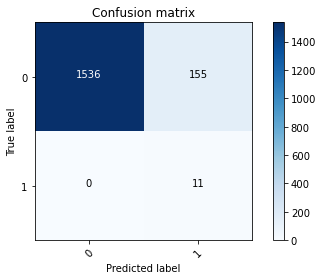

best fold 2
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1691
           1       0.07      1.00      0.12        11

    accuracy                           0.91      1702
   macro avg       0.53      0.95      0.54      1702
weighted avg       0.99      0.91      0.95      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.908931   0.066265     1.0  0.124294  0.261905   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.245339  11.0  1536.0   0.954169  
Confusion matrix, without normalization
[[1536  155]
 [   0   11]]


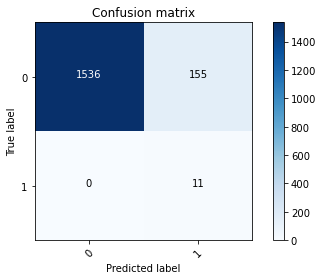

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.08      0.91      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                           Acuracy  Precision    Recall  F1-score   F-beta  \
Decision Tree OverSample  0.934195   0.082645  0.909091  0.151515  0.30303   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.263008  10.0  1580.0   0.921725  
Confusion matrix, without normalization
[[1580  111]
 [   1   10]]


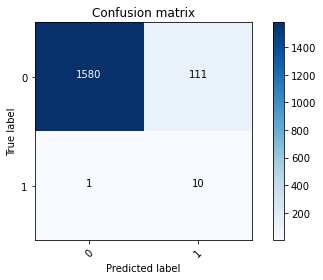

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.932432   0.094488     1.0  0.172662  0.342857   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.296747  12.0  1575.0   0.965976  
Confusion matrix, without normalization
[[1575  115]
 [   0   12]]


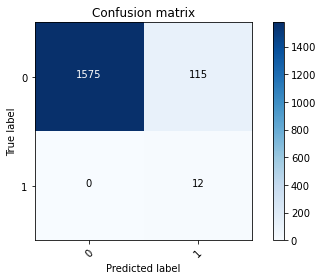

best fold 4
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.932432   0.094488     1.0  0.172662  0.342857   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.296747  12.0  1575.0   0.965976  
Confusion matrix, without normalization
[[1575  115]
 [   0   12]]


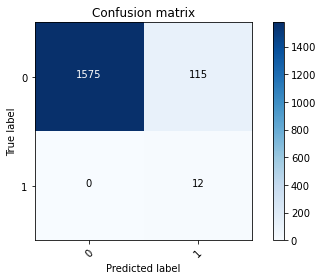

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1690
           1       0.11      1.00      0.20        12

    accuracy                           0.94      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.94      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.943596   0.111111     1.0       0.2  0.384615   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.323727  12.0  1594.0   0.971598  
Confusion matrix, without normalization
[[1594   96]
 [   0   12]]


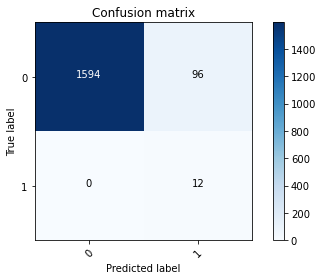

best fold 5
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1690
           1       0.11      1.00      0.20        12

    accuracy                           0.94      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.94      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.943596   0.111111     1.0       0.2  0.384615   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.323727  12.0  1594.0   0.971598  
Confusion matrix, without normalization
[[1594   96]
 [   0   12]]


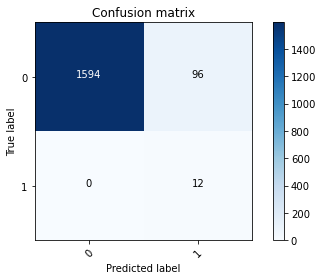

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.948884   0.121212     1.0  0.216216  0.408163   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.339076  12.0  1603.0    0.97426  
Confusion matrix, without normalization
[[1603   87]
 [   0   12]]


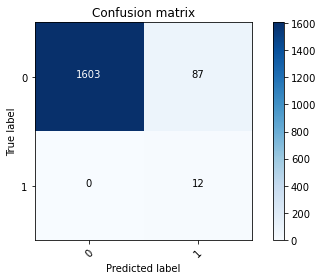

best fold 6
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.948884   0.121212     1.0  0.216216  0.408163   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.339076  12.0  1603.0    0.97426  
Confusion matrix, without normalization
[[1603   87]
 [   0   12]]


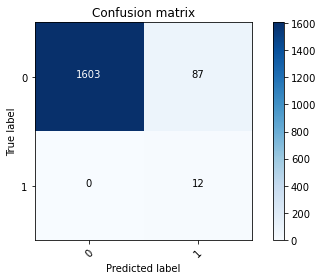

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.12      0.83      0.22        12

    accuracy                           0.96      1702
   macro avg       0.56      0.90      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree OverSample  0.957697      0.125  0.833333  0.217391  0.390625   

                              MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.31307  10.0  1620.0   0.895957  
Confusion matrix, without normalization
[[1620   70]
 [   2   10]]


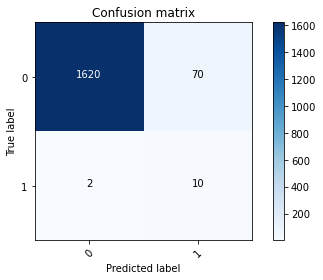

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.83      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.90      0.61      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree OverSample  0.96181   0.136986  0.833333  0.235294  0.413223   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.328742  10.0  1627.0   0.898028  
Confusion matrix, without normalization
[[1627   63]
 [   2   10]]


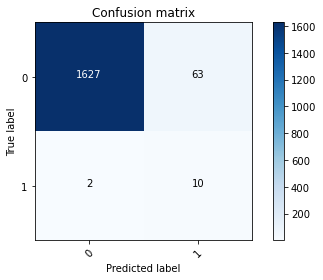

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  \
Decision Tree OverSample  0.96181   0.155844     1.0  0.269663    0.48   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.387105  12.0  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


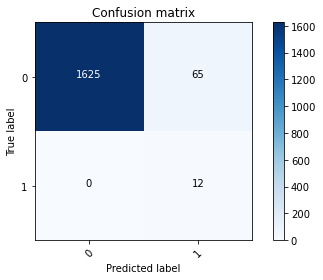

best fold 9
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  \
Decision Tree OverSample  0.96181   0.155844     1.0  0.269663    0.48   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.387105  12.0  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


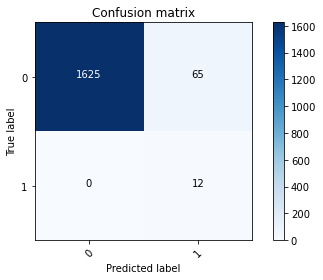

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.28        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.963572   0.162162     1.0   0.27907  0.491803   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.395238  12.0  1628.0   0.981657  
Confusion matrix, without normalization
[[1628   62]
 [   0   12]]


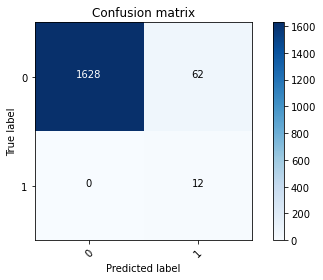

best fold 10
Decision Tree OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.28        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree OverSample  0.963572   0.162162     1.0   0.27907  0.491803   

                               MCC    TP      TN  ROC Curve  
Decision Tree OverSample  0.395238  12.0  1628.0   0.981657  
Confusion matrix, without normalization
[[1628   62]
 [   0   12]]


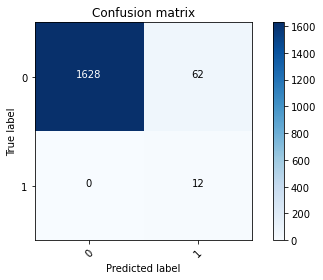

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15848  1055]
 [    5   112]]


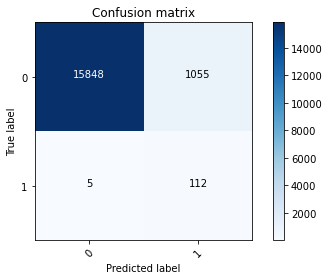

In [40]:
results_metrics, results_cv, bestModel = cv(X,y,dct,'Decision Tree OverSample', balancer=ros)

all_results = all_results.append(results_metrics)

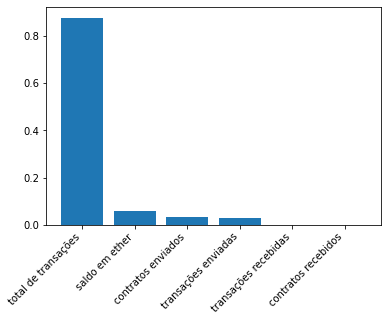

In [41]:
feature_importance(bestModel)

In [42]:
plot_dct(bestModel, 'over')

**Cross_validation SMOTE**

For fold 1:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.12        11

    accuracy                           0.92      1702
   macro avg       0.53      0.91      0.54      1702
weighted avg       0.99      0.92      0.95      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.915981   0.065789  0.909091  0.122699  0.255102   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.231844  10.0  1549.0   0.912558  
Confusion matrix, without normalization
[[1549  142]
 [   1   10]]


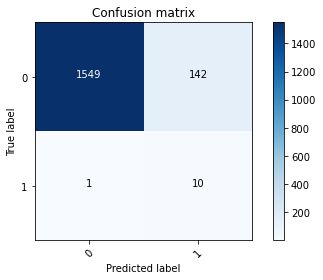

best fold 1
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.12        11

    accuracy                           0.92      1702
   macro avg       0.53      0.91      0.54      1702
weighted avg       0.99      0.92      0.95      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.915981   0.065789  0.909091  0.122699  0.255102   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.231844  10.0  1549.0   0.912558  
Confusion matrix, without normalization
[[1549  142]
 [   1   10]]


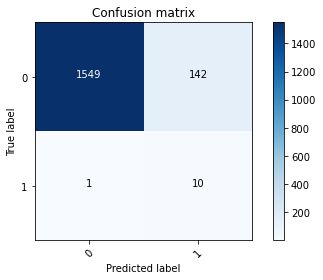

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.941833   0.092593  0.909091  0.168067  0.328947   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.279777  10.0  1593.0   0.925569  
Confusion matrix, without normalization
[[1593   98]
 [   1   10]]


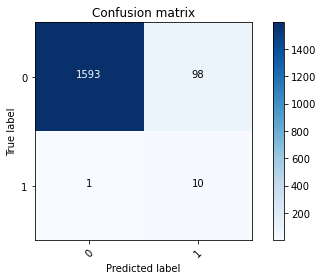

best fold 2
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.941833   0.092593  0.909091  0.168067  0.328947   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.279777  10.0  1593.0   0.925569  
Confusion matrix, without normalization
[[1593   98]
 [   1   10]]


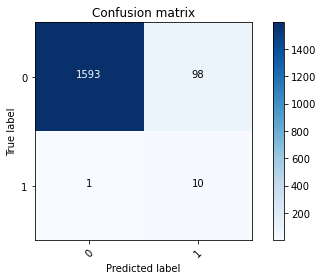

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.11      0.91      0.19        11

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.949471   0.105263  0.909091  0.188679  0.359712   

                         MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.29978  10.0  1606.0   0.929412  
Confusion matrix, without normalization
[[1606   85]
 [   1   10]]


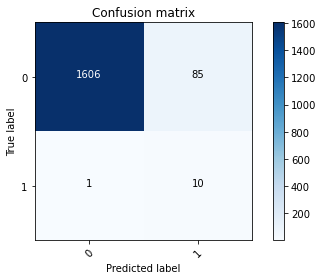

best fold 3
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.11      0.91      0.19        11

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.949471   0.105263  0.909091  0.188679  0.359712   

                         MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.29978  10.0  1606.0   0.929412  
Confusion matrix, without normalization
[[1606   85]
 [   1   10]]


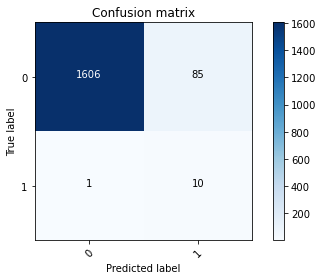

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.12      0.83      0.22        12

    accuracy                           0.96      1702
   macro avg       0.56      0.90      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.957697      0.125  0.833333  0.217391  0.390625   

                         MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.31307  10.0  1620.0   0.895957  
Confusion matrix, without normalization
[[1620   70]
 [   2   10]]


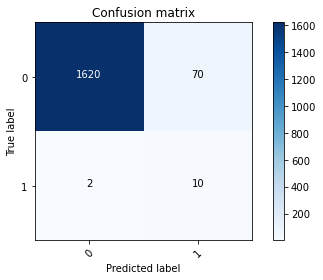

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.958284   0.135802  0.916667  0.236559  0.426357   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.343978  11.0  1620.0   0.937623  
Confusion matrix, without normalization
[[1620   70]
 [   1   11]]


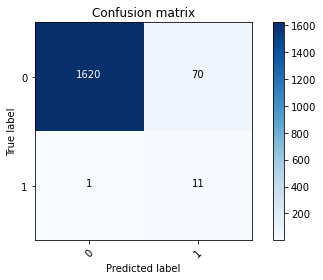

best fold 5
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.958284   0.135802  0.916667  0.236559  0.426357   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.343978  11.0  1620.0   0.937623  
Confusion matrix, without normalization
[[1620   70]
 [   1   11]]


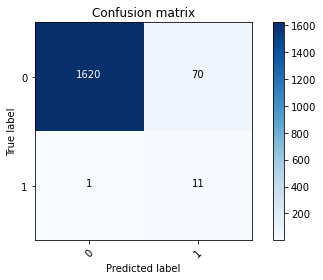

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      0.92      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.95      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.973561        0.2  0.916667  0.328358  0.533981   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.421409  11.0  1646.0   0.945316  
Confusion matrix, without normalization
[[1646   44]
 [   1   11]]


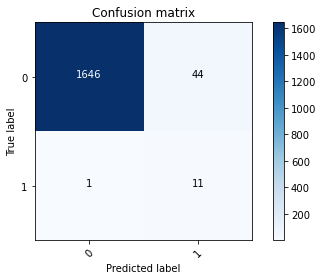

best fold 6
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      0.92      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.95      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.973561        0.2  0.916667  0.328358  0.533981   

                          MCC    TP      TN  ROC Curve  
Decision Tree Smote  0.421409  11.0  1646.0   0.945316  
Confusion matrix, without normalization
[[1646   44]
 [   1   11]]


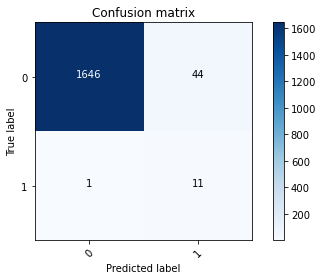

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.20      0.75      0.32        12

    accuracy                           0.98      1702
   macro avg       0.60      0.86      0.65      1702
weighted avg       0.99      0.98      0.98      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Decision Tree Smote  0.977086        0.2    0.75  0.315789  0.483871   

                          MCC   TP      TN  ROC Curve  
Decision Tree Smote  0.380027  9.0  1654.0   0.864349  
Confusion matrix, without normalization
[[1654   36]
 [   3    9]]


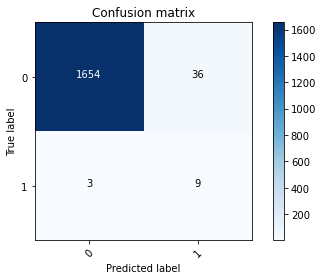

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.27      0.58      0.37        12

    accuracy                           0.99      1702
   macro avg       0.63      0.79      0.68      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.985899   0.269231  0.583333  0.368421  0.472973   

                          MCC   TP      TN  ROC Curve  
Decision Tree Smote  0.390279  7.0  1671.0   0.786045  
Confusion matrix, without normalization
[[1671   19]
 [   5    7]]


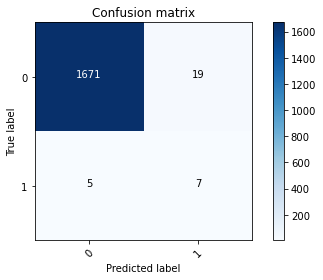

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.24      0.67      0.36        12

    accuracy                           0.98      1702
   macro avg       0.62      0.83      0.67      1702
weighted avg       0.99      0.98      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Decision Tree Smote  0.982961   0.242424  0.666667  0.355556  0.493827   

                         MCC   TP      TN  ROC Curve  
Decision Tree Smote  0.39556  8.0  1665.0   0.825937  
Confusion matrix, without normalization
[[1665   25]
 [   4    8]]


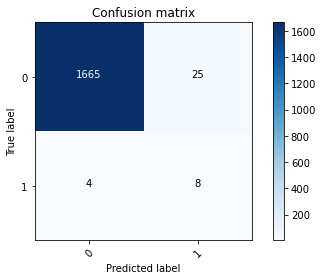

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.45        12

    accuracy                           0.98      1702
   macro avg       0.65      0.99      0.72      1702
weighted avg       1.00      0.98      0.99      1702

                      Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Decision Tree Smote  0.982961   0.292683     1.0   0.45283  0.674157  0.53634   

                       TP      TN  ROC Curve  
Decision Tree Smote  12.0  1661.0    0.99142  
Confusion matrix, without normalization
[[1661   29]
 [   0   12]]


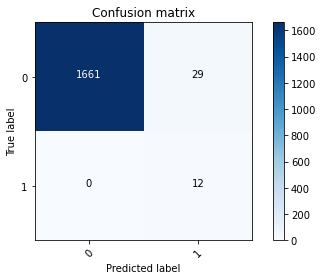

best fold 10
Decision Tree Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.45        12

    accuracy                           0.98      1702
   macro avg       0.65      0.99      0.72      1702
weighted avg       1.00      0.98      0.99      1702

                      Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Decision Tree Smote  0.982961   0.292683     1.0   0.45283  0.674157  0.53634   

                       TP      TN  ROC Curve  
Decision Tree Smote  12.0  1661.0    0.99142  
Confusion matrix, without normalization
[[1661   29]
 [   0   12]]


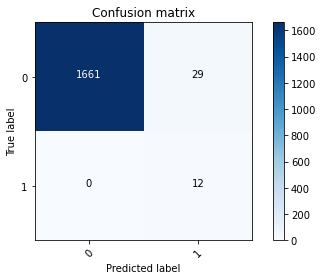

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16285   618]
 [   19    98]]


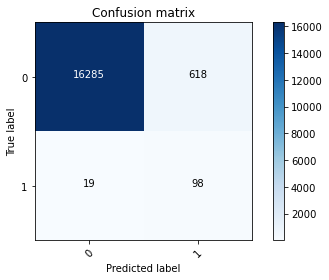

In [43]:
results_metrics, results_cv, bestModel = cv(X,y,dct,'Decision Tree Smote', balancer=smt)

all_results = all_results.append(results_metrics)

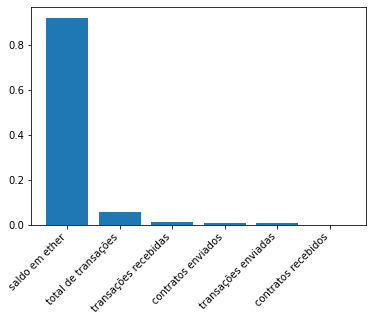

In [44]:
feature_importance(bestModel)

In [45]:
plot_dct(bestModel, 'smote')

### Random Forest Classifier

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=2)

estimators.append(('RandomForest',clf))

**Without Balance**

For fold 1:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.47      0.64      0.54        11

    accuracy                           0.99      1702
   macro avg       0.73      0.82      0.77      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest No Balance  0.992949   0.466667  0.636364  0.538462  0.59322   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.541539  7.0  1683.0   0.815816  
Confusion matrix, without normalization
[[1683    8]
 [   4    7]]


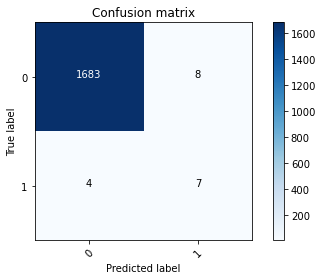

best fold 1
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.47      0.64      0.54        11

    accuracy                           0.99      1702
   macro avg       0.73      0.82      0.77      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest No Balance  0.992949   0.466667  0.636364  0.538462  0.59322   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.541539  7.0  1683.0   0.815816  
Confusion matrix, without normalization
[[1683    8]
 [   4    7]]


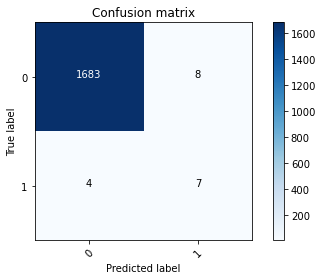

Tempo gasto fold 1 - 00:00:00
For fold 2:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.73      0.62        11

    accuracy                           0.99      1702
   macro avg       0.77      0.86      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance  0.994125   0.533333  0.727273  0.615385  0.677966   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.619988  8.0  1684.0   0.861567  
Confusion matrix, without normalization
[[1684    7]
 [   3    8]]


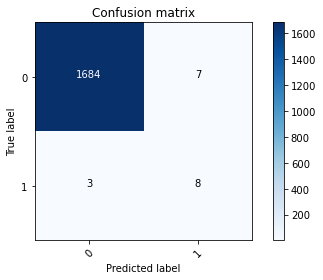

best fold 2
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.73      0.62        11

    accuracy                           0.99      1702
   macro avg       0.77      0.86      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance  0.994125   0.533333  0.727273  0.615385  0.677966   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.619988  8.0  1684.0   0.861567  
Confusion matrix, without normalization
[[1684    7]
 [   3    8]]


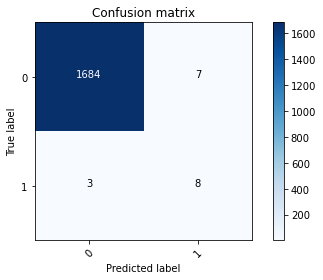

Tempo gasto fold 2 - 00:00:00
For fold 3:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.67      0.55      0.60        11

    accuracy                           1.00      1702
   macro avg       0.83      0.77      0.80      1702
weighted avg       0.99      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance   0.9953   0.666667  0.545455       0.6  0.566038   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.600706  6.0  1688.0    0.77184  
Confusion matrix, without normalization
[[1688    3]
 [   5    6]]


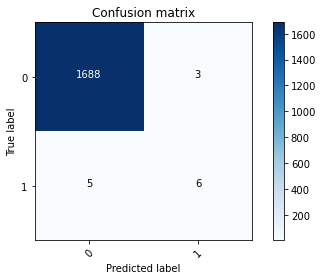

Tempo gasto fold 3 - 00:00:00
For fold 4:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.67      0.80        12

    accuracy                           1.00      1702
   macro avg       1.00      0.83      0.90      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance  0.99765        1.0  0.666667       0.8  0.714286   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.815532  8.0  1690.0   0.833333  
Confusion matrix, without normalization
[[1690    0]
 [   4    8]]


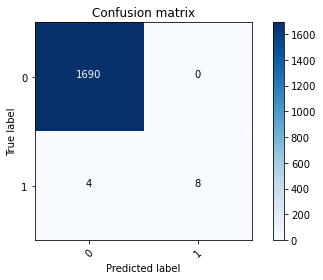

Tempo gasto fold 4 - 00:00:00
For fold 5:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.78      0.58      0.67        12

    accuracy                           1.00      1702
   macro avg       0.89      0.79      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance  0.995887   0.777778  0.583333  0.666667  0.614035   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.671613  7.0  1688.0   0.791075  
Confusion matrix, without normalization
[[1688    2]
 [   5    7]]


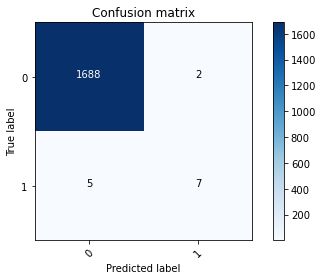

Tempo gasto fold 5 - 00:00:00
For fold 6:
Random Forest No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


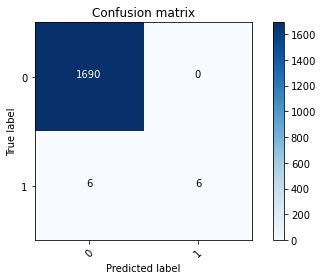

Tempo gasto fold 6 - 00:00:00
For fold 7:
Random Forest No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score  F-beta  \
Random Forest No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


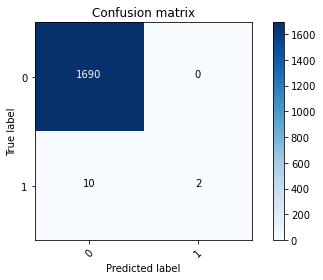

Tempo gasto fold 7 - 00:00:00
For fold 8:
Random Forest No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                              MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


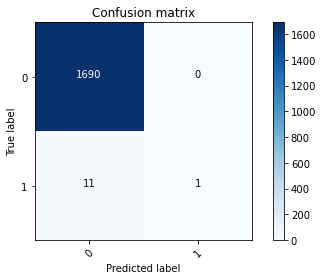

Tempo gasto fold 8 - 00:00:00
For fold 9:
Random Forest No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Random Forest No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                           TP      TN  ROC Curve  
Random Forest No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:870: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and be

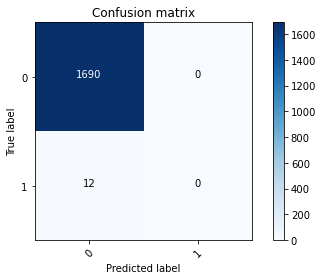

Tempo gasto fold 9 - 00:00:00
For fold 10:
Random Forest No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.25      0.40        12

    accuracy                           0.99      1702
   macro avg       1.00      0.62      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest No Balance  0.994712        1.0    0.25       0.4  0.294118   

                               MCC   TP      TN  ROC Curve  
Random Forest No Balance  0.498674  3.0  1690.0      0.625  
Confusion matrix, without normalization
[[1690    0]
 [   9    3]]


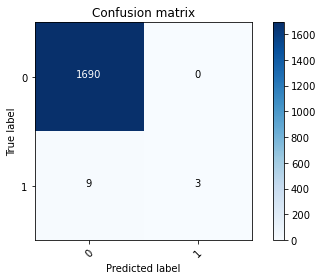

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16883    20]
 [   69    48]]


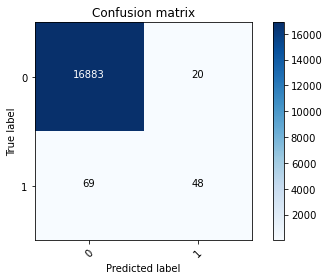

In [47]:
results_metrics, results_cv, bestModel = cv(X,y,clf,'Random Forest No Balance')

all_results = all_results.append(results_metrics)

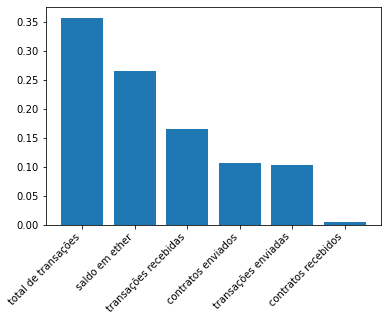

In [48]:
feature_importance(bestModel)

**Under Sample**

For fold 1:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.86      0.92      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.855464   0.042802     1.0   0.08209  0.182724   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.191246  11.0  1445.0   0.927262  
Confusion matrix, without normalization
[[1445  246]
 [   0   11]]


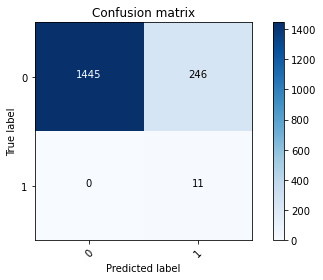

best fold 1
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.86      0.92      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.855464   0.042802     1.0   0.08209  0.182724   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.191246  11.0  1445.0   0.927262  
Confusion matrix, without normalization
[[1445  246]
 [   0   11]]


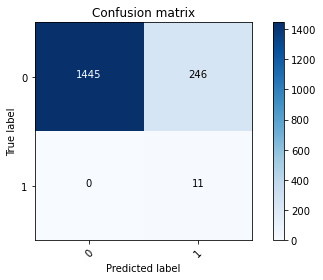

Tempo gasto fold 1 - 00:00:00
For fold 2:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.898355   0.059783     1.0  0.112821  0.241228   

                               MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.23166  11.0  1518.0   0.948847  
Confusion matrix, without normalization
[[1518  173]
 [   0   11]]


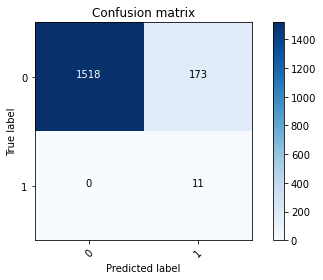

best fold 2
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.898355   0.059783     1.0  0.112821  0.241228   

                               MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.23166  11.0  1518.0   0.948847  
Confusion matrix, without normalization
[[1518  173]
 [   0   11]]


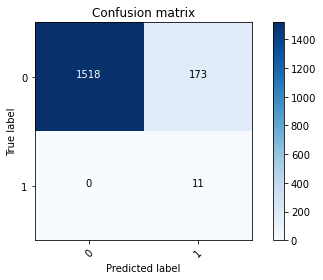

Tempo gasto fold 2 - 00:00:00
For fold 3:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest UnderSample  0.923619   0.071942  0.909091  0.133333  0.273224   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.243683  10.0  1562.0   0.916402  
Confusion matrix, without normalization
[[1562  129]
 [   1   10]]


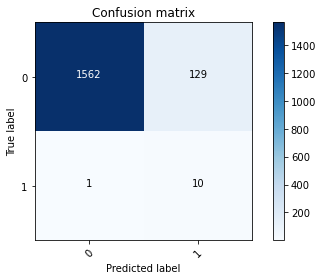

Tempo gasto fold 3 - 00:00:00
For fold 4:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.24        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.954759   0.134831     1.0  0.237624  0.437956   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.358731  12.0  1613.0   0.977219  
Confusion matrix, without normalization
[[1613   77]
 [   0   12]]


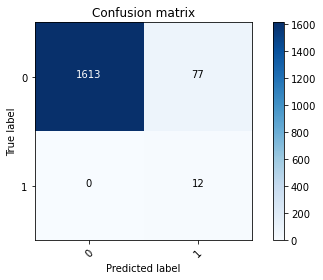

best fold 4
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.24        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.954759   0.134831     1.0  0.237624  0.437956   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.358731  12.0  1613.0   0.977219  
Confusion matrix, without normalization
[[1613   77]
 [   0   12]]


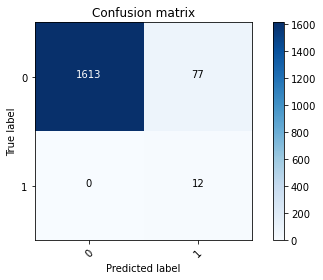

Tempo gasto fold 4 - 00:00:00
For fold 5:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.950646      0.125     1.0  0.222222  0.416667   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.344655  12.0  1606.0   0.975148  
Confusion matrix, without normalization
[[1606   84]
 [   0   12]]


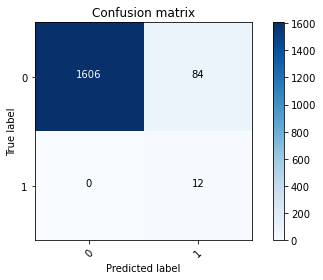

Tempo gasto fold 5 - 00:00:00
For fold 6:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      0.92      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.94      0.62      1702
weighted avg       0.99      0.96      0.98      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest UnderSample  0.96416    0.15493  0.916667   0.26506  0.462185   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.368752  11.0  1630.0   0.940582  
Confusion matrix, without normalization
[[1630   60]
 [   1   11]]


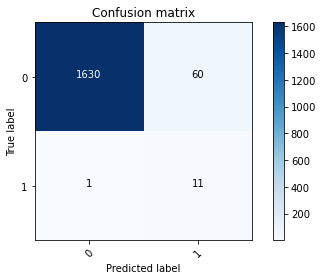

Tempo gasto fold 6 - 00:00:00
For fold 7:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      0.92      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.95      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest UnderSample  0.973561        0.2  0.916667  0.328358  0.533981   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.421409  11.0  1646.0   0.945316  
Confusion matrix, without normalization
[[1646   44]
 [   1   11]]


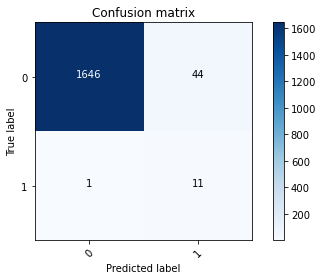

Tempo gasto fold 7 - 00:00:00
For fold 8:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.17      0.83      0.28        12

    accuracy                           0.97      1702
   macro avg       0.58      0.90      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                            Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest UnderSample  0.970035   0.169492  0.833333   0.28169  0.46729   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.367899  10.0  1641.0    0.90217  
Confusion matrix, without normalization
[[1641   49]
 [   2   10]]


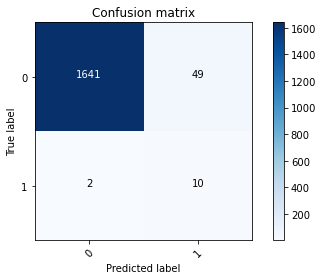

Tempo gasto fold 8 - 00:00:00
For fold 9:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.17      1.00      0.30        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.96651   0.173913     1.0  0.296296  0.512821   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.409936  12.0  1633.0   0.983136  
Confusion matrix, without normalization
[[1633   57]
 [   0   12]]


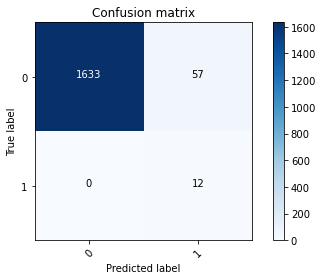

best fold 9
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.17      1.00      0.30        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest UnderSample  0.96651   0.173913     1.0  0.296296  0.512821   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.409936  12.0  1633.0   0.983136  
Confusion matrix, without normalization
[[1633   57]
 [   0   12]]


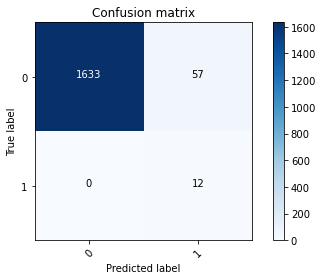

Tempo gasto fold 9 - 00:00:00
For fold 10:
Random Forest UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.92      0.40        12

    accuracy                           0.98      1702
   macro avg       0.63      0.95      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest UnderSample  0.980611   0.255814  0.916667       0.4  0.604396   

                                MCC    TP      TN  ROC Curve  
Random Forest UnderSample  0.478656  11.0  1658.0   0.948866  
Confusion matrix, without normalization
[[1658   32]
 [   1   11]]


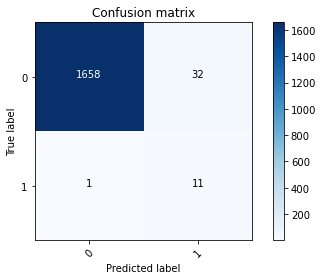

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15952   951]
 [    6   111]]


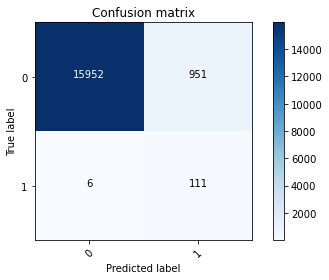

In [49]:
results_metrics, results_cv, bestModel = cv(X,y,clf,'Random Forest UnderSample', balancer=rus)

all_results = all_results.append(results_metrics)

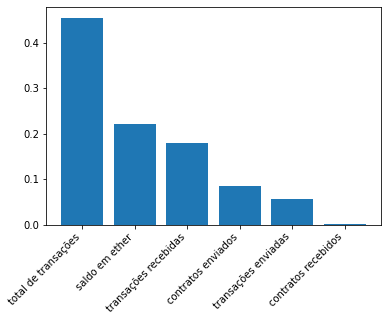

In [50]:
feature_importance(bestModel)

**OverSample**

For fold 1:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.85      1702
   macro avg       0.52      0.92      0.50      1702
weighted avg       0.99      0.85      0.91      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.849001   0.041045     1.0  0.078853  0.176282   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.186566  11.0  1434.0   0.924009  
Confusion matrix, without normalization
[[1434  257]
 [   0   11]]


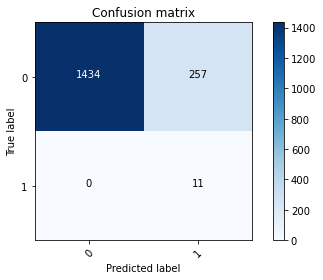

best fold 1
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.85      1702
   macro avg       0.52      0.92      0.50      1702
weighted avg       0.99      0.85      0.91      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.849001   0.041045     1.0  0.078853  0.176282   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.186566  11.0  1434.0   0.924009  
Confusion matrix, without normalization
[[1434  257]
 [   0   11]]


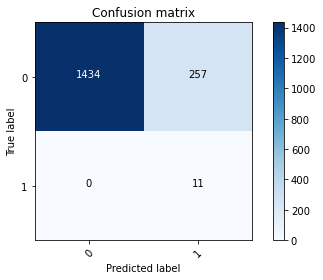

Tempo gasto fold 1 - 00:00:00
For fold 2:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                          Acuracy  Precision  Recall  F1-score   F-beta  \
Random Forest OverSample  0.89718    0.05914     1.0  0.111675  0.23913   

                              MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.23026  11.0  1516.0   0.948255  
Confusion matrix, without normalization
[[1516  175]
 [   0   11]]


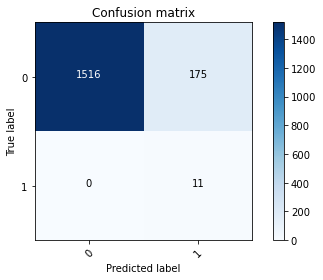

best fold 2
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                          Acuracy  Precision  Recall  F1-score   F-beta  \
Random Forest OverSample  0.89718    0.05914     1.0  0.111675  0.23913   

                              MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.23026  11.0  1516.0   0.948255  
Confusion matrix, without normalization
[[1516  175]
 [   0   11]]


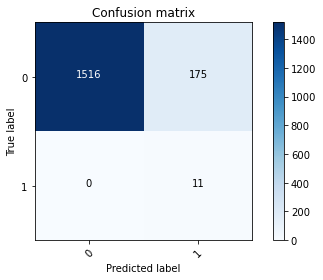

Tempo gasto fold 2 - 00:00:00
For fold 3:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      0.91      0.14        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.93      0.96      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest OverSample  0.93067    0.07874  0.909091  0.144928  0.292398   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.256126  10.0  1574.0   0.919951  
Confusion matrix, without normalization
[[1574  117]
 [   1   10]]


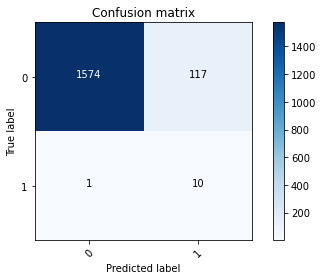

Tempo gasto fold 3 - 00:00:00
For fold 4:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.947709   0.118812     1.0  0.212389  0.402685   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.335492  12.0  1601.0   0.973669  
Confusion matrix, without normalization
[[1601   89]
 [   0   12]]


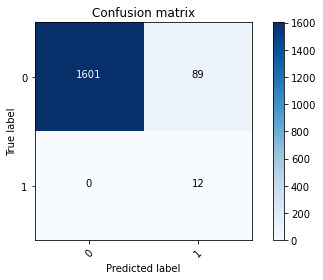

best fold 4
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.947709   0.118812     1.0  0.212389  0.402685   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.335492  12.0  1601.0   0.973669  
Confusion matrix, without normalization
[[1601   89]
 [   0   12]]


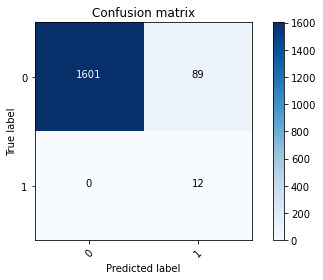

Tempo gasto fold 4 - 00:00:00
For fold 5:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.13      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score   F-beta  \
Random Forest OverSample  0.951234   0.126316     1.0  0.224299  0.41958   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.346572  12.0  1607.0   0.975444  
Confusion matrix, without normalization
[[1607   83]
 [   0   12]]


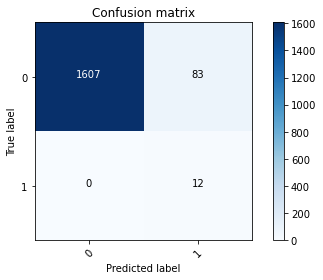

best fold 5
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.13      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision  Recall  F1-score   F-beta  \
Random Forest OverSample  0.951234   0.126316     1.0  0.224299  0.41958   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.346572  12.0  1607.0   0.975444  
Confusion matrix, without normalization
[[1607   83]
 [   0   12]]


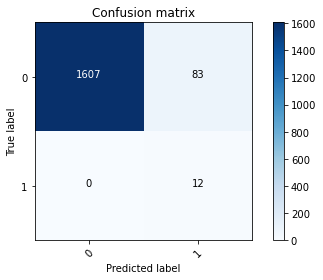

Tempo gasto fold 5 - 00:00:00
For fold 6:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.12      0.92      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest OverSample  0.951821   0.119565  0.916667  0.211538  0.392857   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.321452  11.0  1609.0   0.934369  
Confusion matrix, without normalization
[[1609   81]
 [   1   11]]


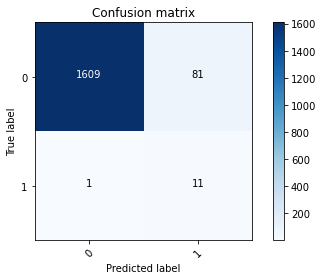

Tempo gasto fold 6 - 00:00:00
For fold 7:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      0.92      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.95      0.72      1702
weighted avg       0.99      0.98      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest OverSample  0.983549   0.289474  0.916667      0.44  0.639535   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.510083  11.0  1663.0   0.950345  
Confusion matrix, without normalization
[[1663   27]
 [   1   11]]


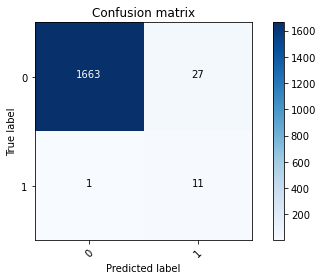

Tempo gasto fold 7 - 00:00:00
For fold 8:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  \
Random Forest OverSample  0.96181   0.155844     1.0  0.269663    0.48   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.387105  12.0  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


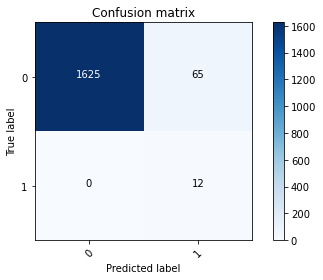

best fold 8
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  \
Random Forest OverSample  0.96181   0.155844     1.0  0.269663    0.48   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.387105  12.0  1625.0   0.980769  
Confusion matrix, without normalization
[[1625   65]
 [   0   12]]


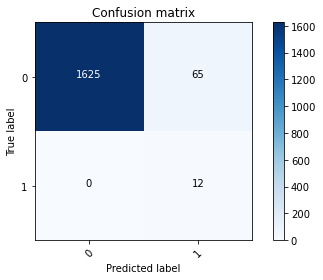

Tempo gasto fold 8 - 00:00:00
For fold 9:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.24      1.00      0.39        12

    accuracy                           0.98      1702
   macro avg       0.62      0.99      0.69      1702
weighted avg       0.99      0.98      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.978261   0.244898     1.0  0.393443  0.618557   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.489424  12.0  1653.0   0.989053  
Confusion matrix, without normalization
[[1653   37]
 [   0   12]]


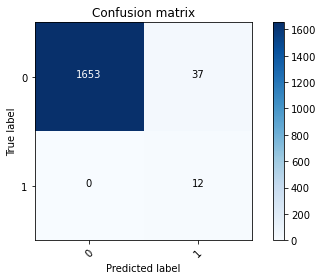

best fold 9
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.24      1.00      0.39        12

    accuracy                           0.98      1702
   macro avg       0.62      0.99      0.69      1702
weighted avg       0.99      0.98      0.98      1702

                           Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest OverSample  0.978261   0.244898     1.0  0.393443  0.618557   

                               MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.489424  12.0  1653.0   0.989053  
Confusion matrix, without normalization
[[1653   37]
 [   0   12]]


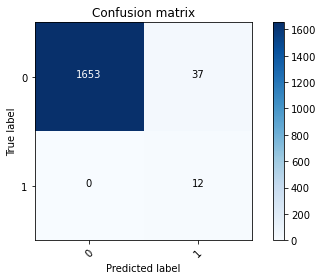

Tempo gasto fold 9 - 00:00:00
For fold 10:
Random Forest OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.22      0.92      0.36        12

    accuracy                           0.98      1702
   macro avg       0.61      0.95      0.67      1702
weighted avg       0.99      0.98      0.98      1702

                           Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest OverSample  0.977086    0.22449  0.916667  0.360656  0.56701   

                              MCC    TP      TN  ROC Curve  
Random Forest OverSample  0.44743  11.0  1652.0   0.947091  
Confusion matrix, without normalization
[[1652   38]
 [   1   11]]


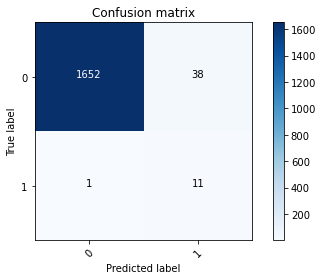

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15934   969]
 [    4   113]]


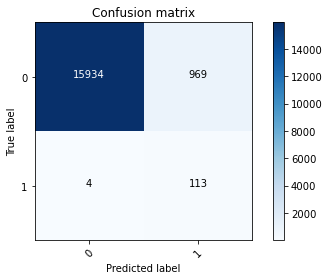

In [51]:
results_metrics, results_cv, bestModel = cv(X,y,clf,'Random Forest OverSample', balancer=ros)

all_results = all_results.append(results_metrics)

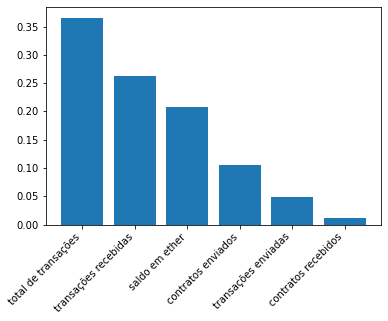

In [52]:
feature_importance(bestModel)

**SMOTE**

For fold 1:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1691
           1       0.16      0.91      0.28        11

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest Smote  0.969448   0.163934  0.909091  0.277778  0.47619   

                          MCC    TP      TN  ROC Curve  
Random Forest Smote  0.378882  10.0  1640.0   0.939466  
Confusion matrix, without normalization
[[1640   51]
 [   1   10]]


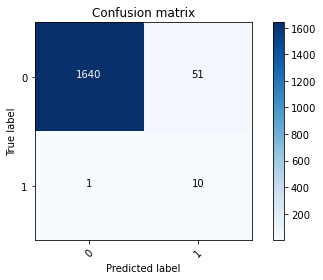

best fold 1
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1691
           1       0.16      0.91      0.28        11

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest Smote  0.969448   0.163934  0.909091  0.277778  0.47619   

                          MCC    TP      TN  ROC Curve  
Random Forest Smote  0.378882  10.0  1640.0   0.939466  
Confusion matrix, without normalization
[[1640   51]
 [   1   10]]


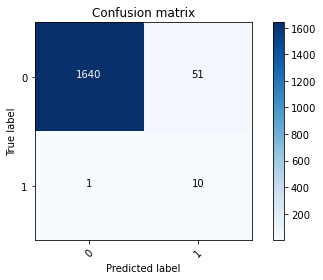

Tempo gasto fold 1 - 00:00:02
For fold 2:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.20      0.73      0.31        11

    accuracy                           0.98      1702
   macro avg       0.60      0.85      0.65      1702
weighted avg       0.99      0.98      0.99      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest Smote  0.979436        0.2  0.727273  0.313725  0.47619   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.374688  8.0  1659.0   0.854175  
Confusion matrix, without normalization
[[1659   32]
 [   3    8]]


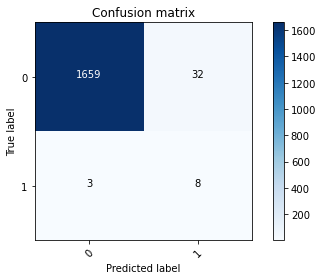

Tempo gasto fold 2 - 00:00:02
For fold 3:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.19      0.73      0.30        11

    accuracy                           0.98      1702
   macro avg       0.59      0.85      0.64      1702
weighted avg       0.99      0.98      0.98      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest Smote  0.977673   0.186047  0.727273  0.296296  0.45977   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.360802  8.0  1656.0   0.853287  
Confusion matrix, without normalization
[[1656   35]
 [   3    8]]


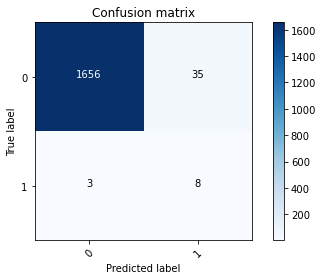

Tempo gasto fold 3 - 00:00:02
For fold 4:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.34      0.83      0.49        12

    accuracy                           0.99      1702
   macro avg       0.67      0.91      0.74      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.987662   0.344828  0.833333  0.487805  0.649351   

                          MCC    TP      TN  ROC Curve  
Random Forest Smote  0.531504  10.0  1671.0   0.911045  
Confusion matrix, without normalization
[[1671   19]
 [   2   10]]


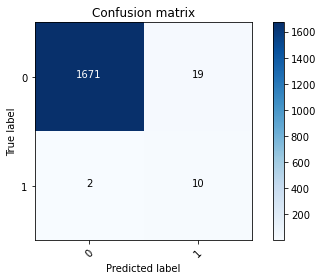

Tempo gasto fold 4 - 00:00:02
For fold 5:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.28      0.67      0.39        12

    accuracy                           0.99      1702
   macro avg       0.64      0.83      0.69      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.985311   0.275862  0.666667  0.390244  0.519481   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.422985  8.0  1669.0    0.82712  
Confusion matrix, without normalization
[[1669   21]
 [   4    8]]


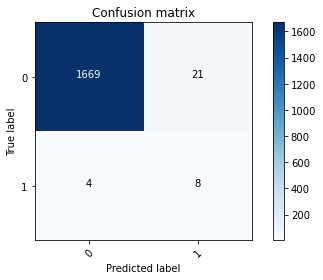

Tempo gasto fold 5 - 00:00:02
For fold 6:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.48      0.92      0.63        12

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.992362   0.478261  0.916667  0.628571  0.774648   

                          MCC    TP      TN  ROC Curve  
Random Forest Smote  0.659142  11.0  1678.0   0.954783  
Confusion matrix, without normalization
[[1678   12]
 [   1   11]]


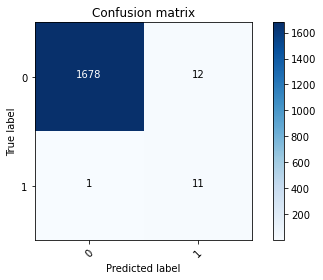

best fold 6
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.48      0.92      0.63        12

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.992362   0.478261  0.916667  0.628571  0.774648   

                          MCC    TP      TN  ROC Curve  
Random Forest Smote  0.659142  11.0  1678.0   0.954783  
Confusion matrix, without normalization
[[1678   12]
 [   1   11]]


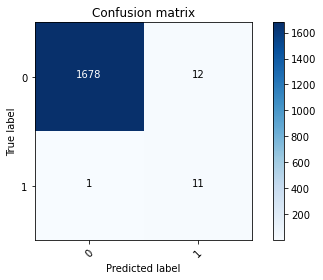

Tempo gasto fold 6 - 00:00:02
For fold 7:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.60      0.50      0.55        12

    accuracy                           0.99      1702
   macro avg       0.80      0.75      0.77      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Random Forest Smote  0.994125        0.6     0.5  0.545455  0.517241   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.544808  6.0  1686.0   0.748817  
Confusion matrix, without normalization
[[1686    4]
 [   6    6]]


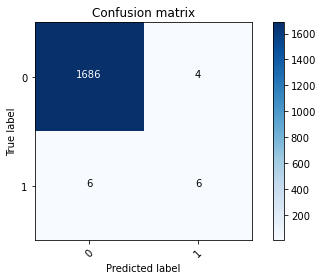

Tempo gasto fold 7 - 00:00:02
For fold 8:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.29      0.33      0.31        12

    accuracy                           0.99      1702
   macro avg       0.64      0.66      0.65      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.989424   0.285714  0.333333  0.307692  0.322581   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.303308  4.0  1680.0   0.663708  
Confusion matrix, without normalization
[[1680   10]
 [   8    4]]


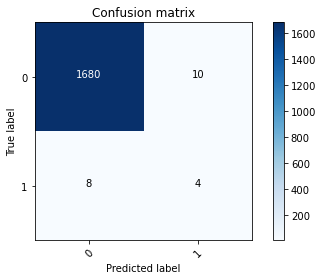

Tempo gasto fold 8 - 00:00:02
For fold 9:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.23      0.42      0.29        12

    accuracy                           0.99      1702
   macro avg       0.61      0.70      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Random Forest Smote  0.985899   0.227273  0.416667  0.294118  0.357143   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.301192  5.0  1673.0   0.703304  
Confusion matrix, without normalization
[[1673   17]
 [   7    5]]


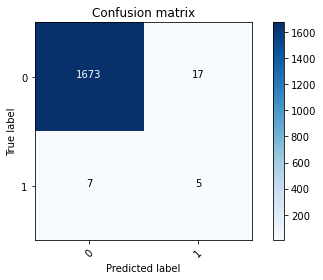

Tempo gasto fold 9 - 00:00:02
For fold 10:
Random Forest Smote

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.54      0.58      0.56        12

    accuracy                           0.99      1702
   macro avg       0.77      0.79      0.78      1702
weighted avg       0.99      0.99      0.99      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Random Forest Smote  0.993537   0.538462  0.583333      0.56  0.57377   

                          MCC   TP      TN  ROC Curve  
Random Forest Smote  0.557202  7.0  1684.0   0.789892  
Confusion matrix, without normalization
[[1684    6]
 [   5    7]]


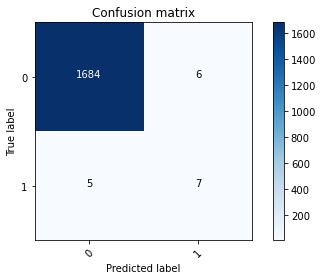

Tempo gasto fold 10 - 00:00:02

Confusion matrix, without normalization
[[16696   207]
 [   40    77]]


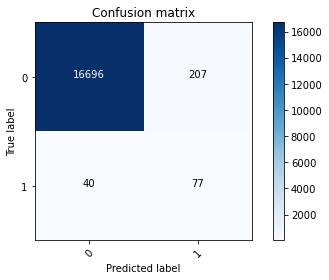

In [53]:
results_metrics, results_cv, bestModel = cv(X,y,clf,'Random Forest Smote', balancer=smt)

all_results = all_results.append(results_metrics)

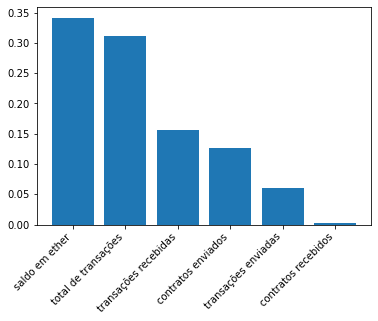

In [54]:
feature_importance(bestModel)

In [55]:
all_results

Acuracy  Precision    Recall  F1-score    F-beta  \
KNN No Balance             0.994066   0.629032  0.333333  0.435754  0.367925   
KNN UnderSample            0.929553   0.079316  0.871795  0.145403  0.290764   
KNN OverSample             0.927791   0.081955  0.931624  0.150657  0.303115   
KNN Smote                  0.949530   0.106992  0.863248  0.190386  0.357649   
Decision Tree No Balance   0.993948   0.594595  0.376068  0.460733  0.405904   
Decision Tree UnderSample  0.936369   0.092749  0.940171  0.168841  0.332527   
Decision Tree OverSample   0.937720   0.095973  0.957265  0.174455  0.342508   
Decision Tree Smote        0.962573   0.136872  0.837607  0.235294  0.413851   
Random Forest No Balance   0.994771   0.705882  0.410256  0.518919  0.447761   
Random Forest UnderSample  0.943772   0.104520  0.948718  0.188295  0.362745   
Random Forest OverSample   0.942832   0.104436  0.965812  0.188490  0.364516   
Random Forest Smote        0.985488   0.271127  0.658120  0.384040  0.511968   

                                MCC     TP       TN  ROC Curve  
KNN No Balance             0.455296   39.0  16880.0   0.665986  
KNN UnderSample            0.250653  102.0  15719.0   0.900874  
KNN OverSample             0.264562  109.0  15682.0   0.929694  
KNN Smote                  0.293623  101.0  16060.0   0.906688  
Decision Tree No Balance   0.470043   44.0  16873.0   0.687147  
Decision Tree UnderSample  0.284443  110.0  15827.0   0.938257  
Decision Tree OverSample   0.292573  112.0  15848.0   0.947425  
Decision Tree Smote        0.329707   98.0  16285.0   0.900523  
Random Forest No Balance   0.535810   48.0  16883.0   0.704537  
Random Forest UnderSample  0.304867  111.0  15952.0   0.946228  
Random Forest OverSample   0.307654  113.0  15934.0   0.954242  
Random Forest Smote        0.416617   77.0  16696.0   0.822937

### Logistic Regression

In [56]:
logReg = LogisticRegression()

estimators.append(('LRG',logReg))

**Without Balance**

For fold 1:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1691
           1       0.10      0.55      0.17        11

    accuracy                           0.97      1702
   macro avg       0.55      0.76      0.58      1702
weighted avg       0.99      0.97      0.98      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.965922   0.101695  0.545455  0.171429   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.291262  0.225207  6.0  1638.0   0.757056  
Confusion matrix, without normalization
[[1638   53]
 [   5    6]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


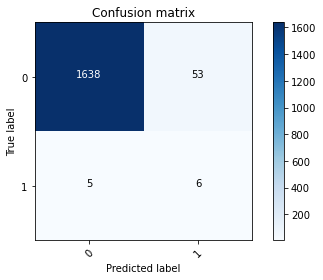

best fold 1
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1691
           1       0.10      0.55      0.17        11

    accuracy                           0.97      1702
   macro avg       0.55      0.76      0.58      1702
weighted avg       0.99      0.97      0.98      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.965922   0.101695  0.545455  0.171429   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.291262  0.225207  6.0  1638.0   0.757056  
Confusion matrix, without normalization
[[1638   53]
 [   5    6]]


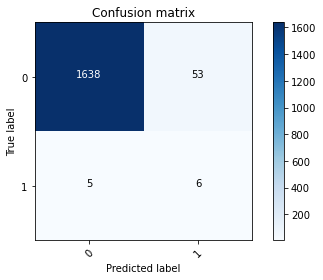

Tempo gasto fold 1 - 00:00:00
For fold 2:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.71      0.45      0.56        11

    accuracy                           1.00      1702
   macro avg       0.86      0.73      0.78      1702
weighted avg       0.99      1.00      0.99      1702

                                Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance   0.9953   0.714286  0.454545  0.555556   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.490196  0.567649  5.0  1689.0   0.726681  
Confusion matrix, without normalization
[[1689    2]
 [   6    5]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


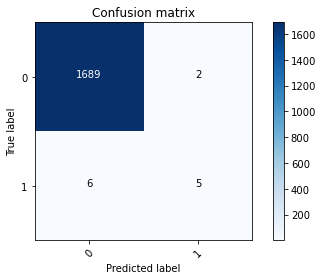

Tempo gasto fold 2 - 00:00:00
For fold 3:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1691
           1       0.25      0.09      0.13        11

    accuracy                           0.99      1702
   macro avg       0.62      0.54      0.56      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.992362       0.25  0.090909  0.133333   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.104167  0.147509  1.0  1688.0   0.544567  
Confusion matrix, without normalization
[[1688    3]
 [  10    1]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


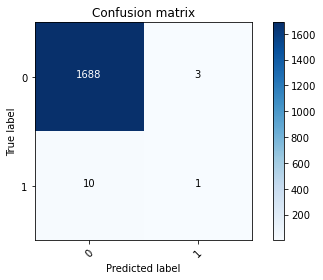

Tempo gasto fold 3 - 00:00:00
For fold 4:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.26      0.67      0.37        12

    accuracy                           0.98      1702
   macro avg       0.63      0.83      0.68      1702
weighted avg       0.99      0.98      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.984136   0.258065  0.666667  0.372093   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.506329  0.408617  8.0  1667.0   0.826529  
Confusion matrix, without normalization
[[1667   23]
 [   4    8]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


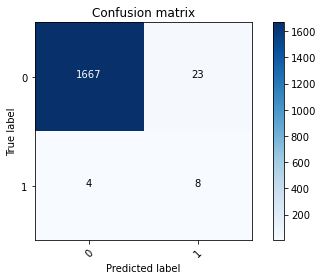

best fold 4
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.26      0.67      0.37        12

    accuracy                           0.98      1702
   macro avg       0.63      0.83      0.68      1702
weighted avg       0.99      0.98      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.984136   0.258065  0.666667  0.372093   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.506329  0.408617  8.0  1667.0   0.826529  
Confusion matrix, without normalization
[[1667   23]
 [   4    8]]


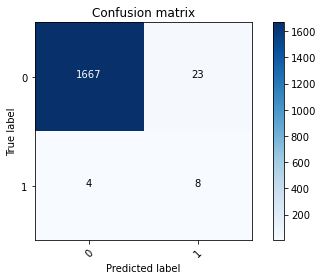

Tempo gasto fold 4 - 00:00:00
For fold 5:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.53      0.67      0.59        12

    accuracy                           0.99      1702
   macro avg       0.77      0.83      0.79      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.993537   0.533333  0.666667  0.592593   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.634921  0.593107  8.0  1683.0   0.831262  
Confusion matrix, without normalization
[[1683    7]
 [   4    8]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


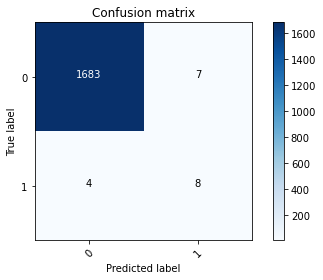

best fold 5
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.53      0.67      0.59        12

    accuracy                           0.99      1702
   macro avg       0.77      0.83      0.79      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.993537   0.533333  0.666667  0.592593   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.634921  0.593107  8.0  1683.0   0.831262  
Confusion matrix, without normalization
[[1683    7]
 [   4    8]]


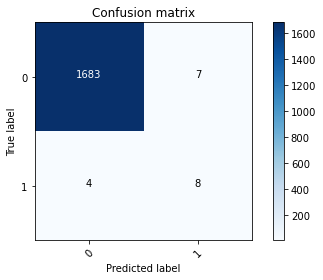

Tempo gasto fold 5 - 00:00:00
For fold 6:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.33      0.50      0.40        12

    accuracy                           0.99      1702
   macro avg       0.66      0.75      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision  Recall  F1-score  \
Regressao Logistica No Balance  0.989424   0.333333     0.5       0.4   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.454545  0.403167  6.0  1678.0    0.74645  
Confusion matrix, without normalization
[[1678   12]
 [   6    6]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


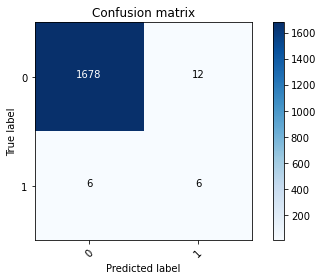

Tempo gasto fold 6 - 00:00:00
For fold 7:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.994125        1.0  0.166667  0.285714   

                                F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance     0.2  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


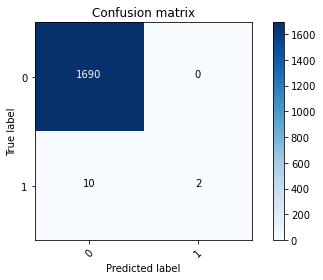

Tempo gasto fold 7 - 00:00:00
For fold 8:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.25      0.42      0.31        12

    accuracy                           0.99      1702
   macro avg       0.62      0.70      0.65      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision    Recall  F1-score  \
Regressao Logistica No Balance  0.987074       0.25  0.416667    0.3125   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.367647  0.316624  5.0  1675.0   0.703895  
Confusion matrix, without normalization
[[1675   15]
 [   7    5]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


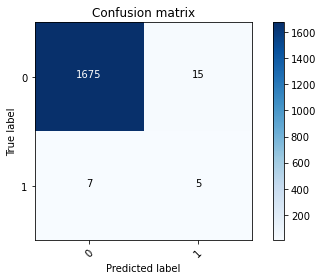

Tempo gasto fold 8 - 00:00:00
For fold 9:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision  Recall  F1-score  F-beta  \
Regressao Logistica No Balance  0.990599        0.0     0.0       0.0     0.0   

                                    MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance -0.00409  0.0  1686.0   0.498817  
Confusion matrix, without normalization
[[1686    4]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


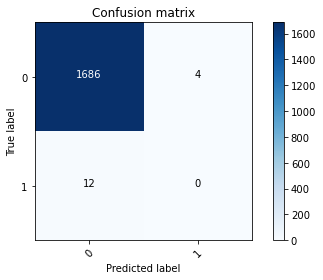

Tempo gasto fold 9 - 00:00:00
For fold 10:
Regressao Logistica No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.25      0.50      0.33        12

    accuracy                           0.99      1702
   macro avg       0.62      0.74      0.66      1702
weighted avg       0.99      0.99      0.99      1702

                                 Acuracy  Precision  Recall  F1-score  \
Regressao Logistica No Balance  0.985899       0.25     0.5  0.333333   

                                  F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica No Balance  0.416667  0.347257  6.0  1672.0   0.744675  
Confusion matrix, without normalization
[[1672   18]
 [   6    6]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


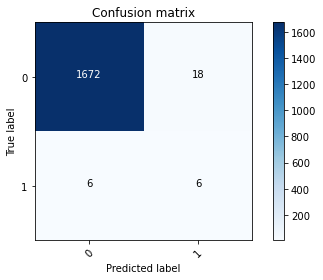

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16766   137]
 [   70    47]]


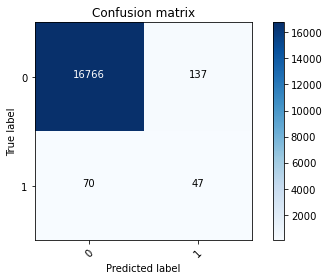

In [57]:
results_metrics, results_cv, bestModel = cv(X,y,logReg,'Regressao Logistica No Balance')

all_results = all_results.append(results_metrics)

**Under Sample**

For fold 1:


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.881316   0.051643     1.0  0.098214   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.214008  0.213247  11.0  1489.0   0.940272  
Confusion matrix, without normalization
[[1489  202]
 [   0   11]]


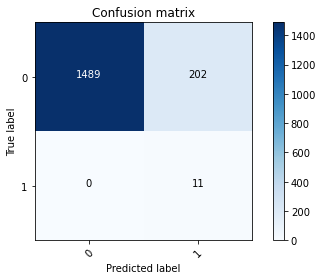

best fold 1
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1691
           1       0.05      1.00      0.10        11

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.881316   0.051643     1.0  0.098214   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.214008  0.213247  11.0  1489.0   0.940272  
Confusion matrix, without normalization
[[1489  202]
 [   0   11]]


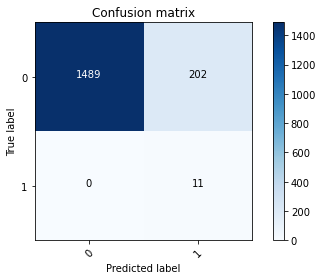

Tempo gasto fold 1 - 00:00:00
For fold 2:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.13      1.00      0.22        11

    accuracy                           0.96      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.955347   0.126437     1.0   0.22449   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.419847  0.347497  11.0  1615.0   0.977528  
Confusion matrix, without normalization
[[1615   76]
 [   0   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


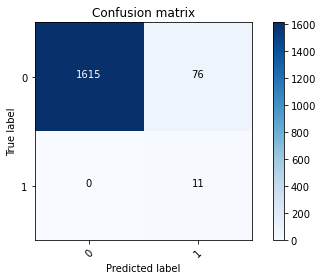

best fold 2
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.13      1.00      0.22        11

    accuracy                           0.96      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.955347   0.126437     1.0   0.22449   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.419847  0.347497  11.0  1615.0   0.977528  
Confusion matrix, without normalization
[[1615   76]
 [   0   11]]


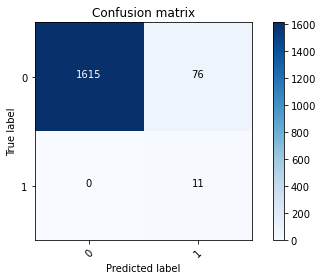

Tempo gasto fold 2 - 00:00:00
For fold 3:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      0.91      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                                  Acuracy  Precision    Recall  F1-score  \
Regressao Logistica UnderSample  0.922444   0.070922  0.909091  0.131579   

                                  F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.27027  0.241759  10.0  1560.0   0.915811  
Confusion matrix, without normalization
[[1560  131]
 [   1   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


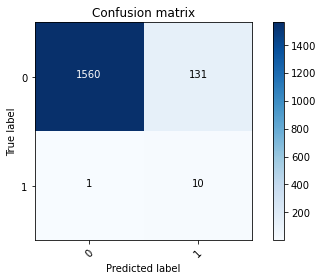

Tempo gasto fold 3 - 00:00:00
For fold 4:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.76      0.87      1690
           1       0.03      1.00      0.06        12

    accuracy                           0.77      1702
   macro avg       0.51      0.88      0.46      1702
weighted avg       0.99      0.77      0.86      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.766157   0.029268     1.0  0.056872   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.131004  0.149585  12.0  1292.0   0.882249  
Confusion matrix, without normalization
[[1292  398]
 [   0   12]]


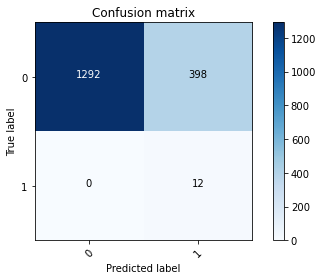

Tempo gasto fold 4 - 00:00:00
For fold 5:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1690
           1       0.05      0.83      0.09        12

    accuracy                           0.88      1702
   macro avg       0.52      0.86      0.51      1702
weighted avg       0.99      0.88      0.93      1702

                                  Acuracy  Precision    Recall  F1-score  \
Regressao Logistica UnderSample  0.881904   0.047847  0.833333  0.090498   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.194553  0.182427  10.0  1491.0   0.857791  
Confusion matrix, without normalization
[[1491  199]
 [   2   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


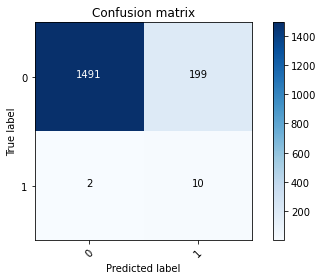

Tempo gasto fold 5 - 00:00:00
For fold 6:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1690
           1       0.03      1.00      0.06        12

    accuracy                           0.79      1702
   macro avg       0.52      0.89      0.47      1702
weighted avg       0.99      0.79      0.88      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.791422   0.032698     1.0  0.063325   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.144578  0.160714  12.0  1335.0    0.89497  
Confusion matrix, without normalization
[[1335  355]
 [   0   12]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


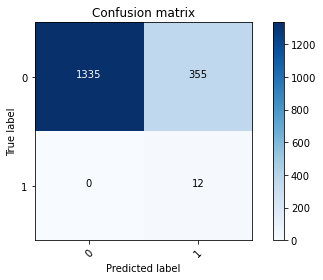

Tempo gasto fold 6 - 00:00:00
For fold 7:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.11      0.92      0.19        12

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                                  Acuracy  Precision    Recall  F1-score  \
Regressao Logistica UnderSample  0.946533   0.108911  0.916667   0.19469   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.369128  0.305771  11.0  1600.0   0.931706  
Confusion matrix, without normalization
[[1600   90]
 [   1   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


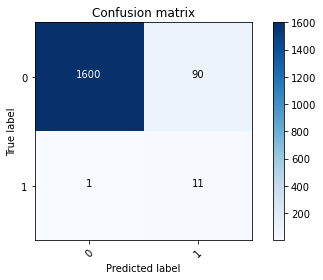

Tempo gasto fold 7 - 00:00:00
For fold 8:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1690
           1       0.05      0.75      0.10        12

    accuracy                           0.90      1702
   macro avg       0.53      0.83      0.52      1702
weighted avg       0.99      0.90      0.94      1702

                                  Acuracy  Precision  Recall  F1-score  \
Regressao Logistica UnderSample  0.903055   0.052632    0.75  0.098361   

                                   F-beta       MCC   TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.205479  0.182062  9.0  1528.0   0.827071  
Confusion matrix, without normalization
[[1528  162]
 [   3    9]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


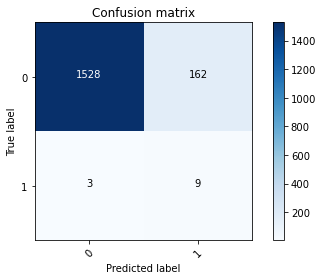

Tempo gasto fold 8 - 00:00:00
For fold 9:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.44      0.92      0.59        12

    accuracy                           0.99      1702
   macro avg       0.72      0.95      0.80      1702
weighted avg       1.00      0.99      0.99      1702

                                  Acuracy  Precision    Recall  F1-score  \
Regressao Logistica UnderSample  0.991187       0.44  0.916667  0.594595   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.753425  0.631781  11.0  1676.0   0.954191  
Confusion matrix, without normalization
[[1676   14]
 [   1   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


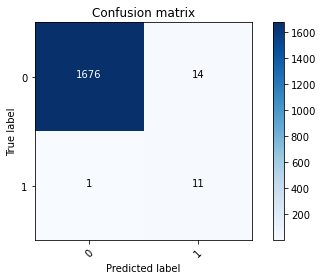

Tempo gasto fold 9 - 00:00:00
For fold 10:
Regressao Logistica UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.56      0.83      0.67        12

    accuracy                           0.99      1702
   macro avg       0.78      0.91      0.83      1702
weighted avg       1.00      0.99      0.99      1702

                                  Acuracy  Precision    Recall  F1-score  \
Regressao Logistica UnderSample  0.994125   0.555556  0.833333  0.666667   

                                   F-beta       MCC    TP      TN  ROC Curve  
Regressao Logistica UnderSample  0.757576  0.677753  10.0  1682.0     0.9143  
Confusion matrix, without normalization
[[1682    8]
 [   2   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


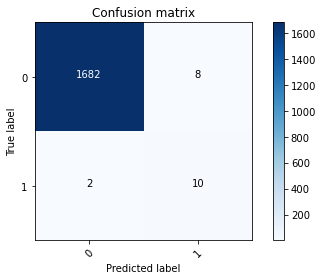

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[15268  1635]
 [   10   107]]


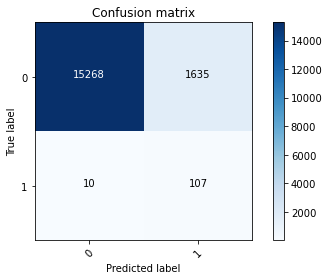

In [58]:
results_metrics, results_cv, bestModel = cv(X,y,logReg,'Regressao Logistica UnderSample', balancer=rus)

all_results = all_results.append(results_metrics)

**Over Sample**

For fold 1:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.30      0.46      1691
           1       0.01      0.91      0.02        11

    accuracy                           0.30      1702
   macro avg       0.50      0.60      0.24      1702
weighted avg       0.99      0.30      0.46      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Regressao Logistica  0.301998   0.008354  0.909091  0.016556  0.04029   

                          MCC    TP     TN  ROC Curve  
Regressao Logistica  0.036336  10.0  504.0    0.60357  
Confusion matrix, without normalization
[[ 504 1187]
 [   1   10]]


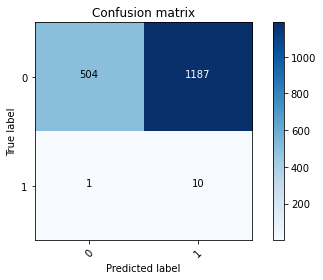

best fold 1
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.30      0.46      1691
           1       0.01      0.91      0.02        11

    accuracy                           0.30      1702
   macro avg       0.50      0.60      0.24      1702
weighted avg       0.99      0.30      0.46      1702

                      Acuracy  Precision    Recall  F1-score   F-beta  \
Regressao Logistica  0.301998   0.008354  0.909091  0.016556  0.04029   

                          MCC    TP     TN  ROC Curve  
Regressao Logistica  0.036336  10.0  504.0    0.60357  
Confusion matrix, without normalization
[[ 504 1187]
 [   1   10]]


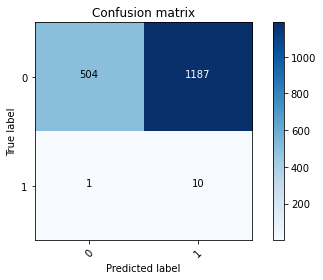

Tempo gasto fold 1 - 00:00:00
For fold 2:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1691
           1       0.03      1.00      0.05        11

    accuracy                           0.76      1702
   macro avg       0.51      0.88      0.46      1702
weighted avg       0.99      0.76      0.86      1702

                      Acuracy  Precision  Recall  F1-score   F-beta       MCC  \
Regressao Logistica  0.759107   0.026128     1.0  0.050926  0.11828  0.140688   

                       TP      TN  ROC Curve  
Regressao Logistica  11.0  1281.0    0.87877  
Confusion matrix, without normalization
[[1281  410]
 [   0   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


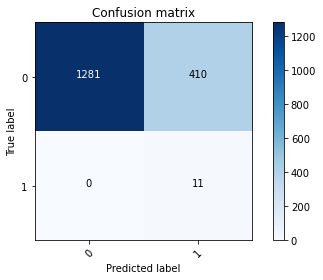

best fold 2
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1691
           1       0.03      1.00      0.05        11

    accuracy                           0.76      1702
   macro avg       0.51      0.88      0.46      1702
weighted avg       0.99      0.76      0.86      1702

                      Acuracy  Precision  Recall  F1-score   F-beta       MCC  \
Regressao Logistica  0.759107   0.026128     1.0  0.050926  0.11828  0.140688   

                       TP      TN  ROC Curve  
Regressao Logistica  11.0  1281.0    0.87877  
Confusion matrix, without normalization
[[1281  410]
 [   0   11]]


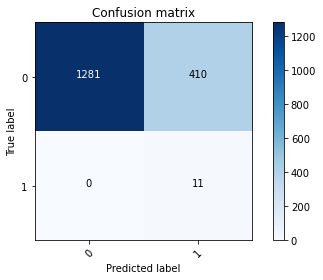

Tempo gasto fold 2 - 00:00:00
For fold 3:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica  0.941246   0.091743  0.909091  0.166667  0.326797   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.278384  10.0  1592.0   0.925273  
Confusion matrix, without normalization
[[1592   99]
 [   1   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


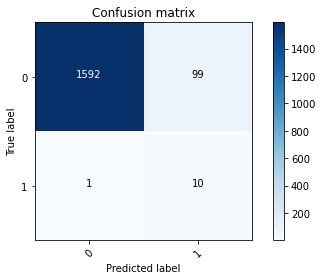

best fold 3
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica  0.941246   0.091743  0.909091  0.166667  0.326797   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.278384  10.0  1592.0   0.925273  
Confusion matrix, without normalization
[[1592   99]
 [   1   10]]


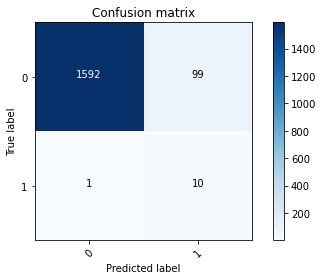

Tempo gasto fold 3 - 00:00:00
For fold 4:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1690
           1       0.04      1.00      0.07        12

    accuracy                           0.81      1702
   macro avg       0.52      0.90      0.48      1702
weighted avg       0.99      0.81      0.89      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica  0.810811   0.035928     1.0  0.069364  0.157068   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.170536  12.0  1368.0   0.904734  
Confusion matrix, without normalization
[[1368  322]
 [   0   12]]


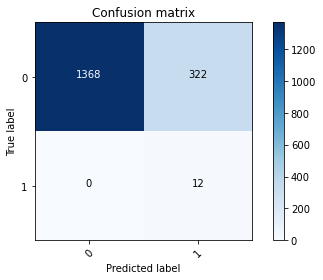

Tempo gasto fold 4 - 00:00:00
For fold 5:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1690
           1       0.06      1.00      0.11        12

    accuracy                           0.89      1702
   macro avg       0.53      0.94      0.53      1702
weighted avg       0.99      0.89      0.93      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica  0.888954   0.059701     1.0  0.112676  0.240964   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.230271  12.0  1501.0   0.944083  
Confusion matrix, without normalization
[[1501  189]
 [   0   12]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


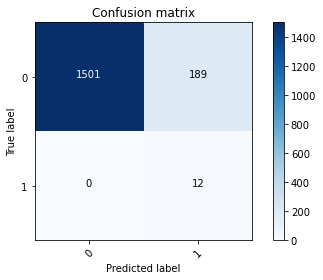

best fold 5
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1690
           1       0.06      1.00      0.11        12

    accuracy                           0.89      1702
   macro avg       0.53      0.94      0.53      1702
weighted avg       0.99      0.89      0.93      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica  0.888954   0.059701     1.0  0.112676  0.240964   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.230271  12.0  1501.0   0.944083  
Confusion matrix, without normalization
[[1501  189]
 [   0   12]]


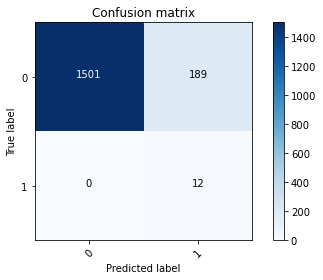

Tempo gasto fold 5 - 00:00:00
For fold 6:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.15      0.26      1690
           1       0.01      1.00      0.02        12

    accuracy                           0.15      1702
   macro avg       0.50      0.57      0.14      1702
weighted avg       0.99      0.15      0.25      1702

                      Acuracy  Precision  Recall  F1-score   F-beta       MCC  \
Regressao Logistica  0.152174   0.008247     1.0   0.01636  0.03992  0.034719   

                       TP     TN  ROC Curve  
Regressao Logistica  12.0  247.0   0.573077  
Confusion matrix, without normalization
[[ 247 1443]
 [   0   12]]


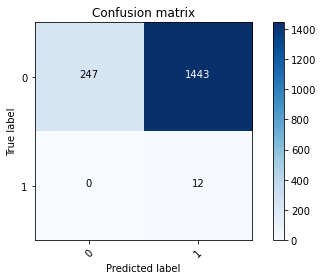

Tempo gasto fold 6 - 00:00:00
For fold 7:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1690
           1       0.02      0.83      0.04        12

    accuracy                           0.74      1702
   macro avg       0.51      0.79      0.45      1702
weighted avg       0.99      0.74      0.84      1702

                     Acuracy  Precision    Recall  F1-score  F-beta      MCC  \
Regressao Logistica  0.73913   0.022124  0.833333  0.043103     0.1  0.10833   

                       TP      TN  ROC Curve  
Regressao Logistica  10.0  1248.0   0.785897  
Confusion matrix, without normalization
[[1248  442]
 [   2   10]]


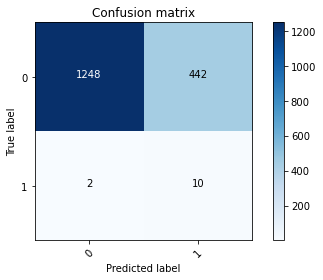

Tempo gasto fold 7 - 00:00:00
For fold 8:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1690
           1       0.05      1.00      0.10        12

    accuracy                           0.88      1702
   macro avg       0.53      0.94      0.52      1702
weighted avg       0.99      0.88      0.93      1702

                      Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Regressao Logistica  0.876028   0.053812     1.0  0.102128  0.221402  0.21701   

                       TP      TN  ROC Curve  
Regressao Logistica  12.0  1479.0   0.937574  
Confusion matrix, without normalization
[[1479  211]
 [   0   12]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


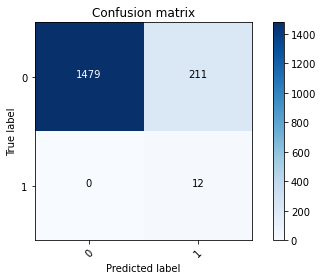

Tempo gasto fold 8 - 00:00:00
For fold 9:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      0.83      0.42        12

    accuracy                           0.98      1702
   macro avg       0.64      0.91      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica  0.983549   0.277778  0.833333  0.416667  0.595238   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.475632  10.0  1664.0   0.908974  
Confusion matrix, without normalization
[[1664   26]
 [   2   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


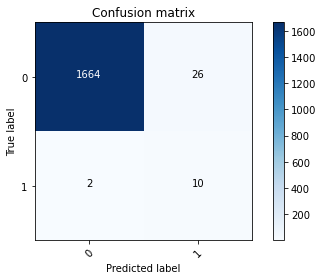

Tempo gasto fold 9 - 00:00:00
For fold 10:
Regressao Logistica

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.20      0.83      0.32        12

    accuracy                           0.98      1702
   macro avg       0.60      0.90      0.66      1702
weighted avg       0.99      0.98      0.98      1702

                      Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica  0.975323        0.2  0.833333  0.322581  0.510204   

                          MCC    TP      TN  ROC Curve  
Regressao Logistica  0.401189  10.0  1650.0   0.904832  
Confusion matrix, without normalization
[[1650   40]
 [   2   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


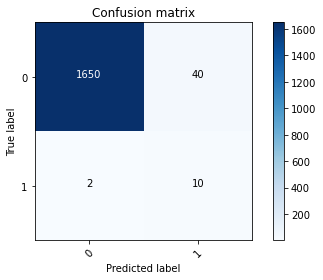

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[12534  4369]
 [    8   109]]


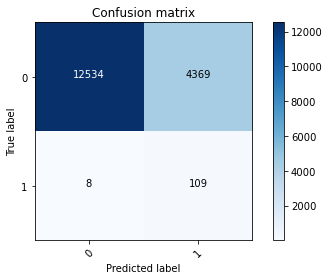

In [59]:
results_metrics, results_cv, bestModel = cv(X,y,logReg,'Regressao Logistica', balancer=ros)

all_results = all_results.append(results_metrics)

**SMOTE**

For fold 1:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      1.00      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.927732    0.08209     1.0  0.151724  0.308989   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.275896  11.0  1568.0   0.963631  
Confusion matrix, without normalization
[[1568  123]
 [   0   11]]


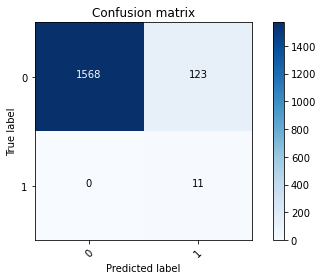

best fold 1
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      1.00      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.927732    0.08209     1.0  0.151724  0.308989   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.275896  11.0  1568.0   0.963631  
Confusion matrix, without normalization
[[1568  123]
 [   0   11]]


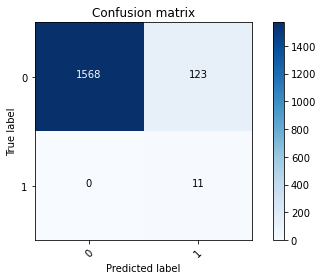

Tempo gasto fold 1 - 00:00:00
For fold 2:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1691
           1       0.12      1.00      0.22        11

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.954759      0.125     1.0  0.222222  0.416667   

                               MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.34541  11.0  1614.0   0.977232  
Confusion matrix, without normalization
[[1614   77]
 [   0   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


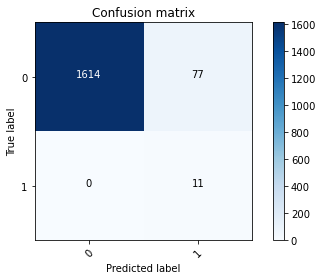

best fold 2
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1691
           1       0.12      1.00      0.22        11

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.954759      0.125     1.0  0.222222  0.416667   

                               MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.34541  11.0  1614.0   0.977232  
Confusion matrix, without normalization
[[1614   77]
 [   0   11]]


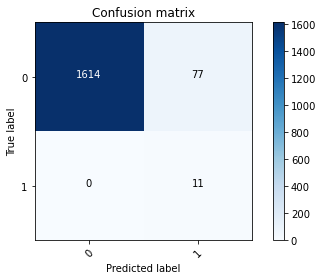

Tempo gasto fold 2 - 00:00:00
For fold 3:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.14      0.91      0.24        11

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.98      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.96181   0.135135  0.909091  0.235294  0.423729   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.342346  10.0  1627.0   0.935622  
Confusion matrix, without normalization
[[1627   64]
 [   1   10]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


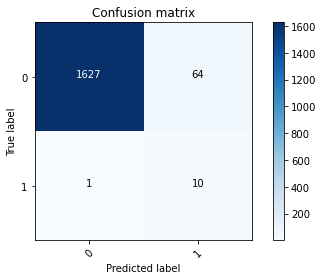

Tempo gasto fold 3 - 00:00:00
For fold 4:


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1690
           1       0.04      1.00      0.08        12

    accuracy                           0.84      1702
   macro avg       0.52      0.92      0.50      1702
weighted avg       0.99      0.84      0.91      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.840776   0.042403     1.0  0.081356  0.181269   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.188688  12.0  1419.0   0.919822  
Confusion matrix, without normalization
[[1419  271]
 [   0   12]]


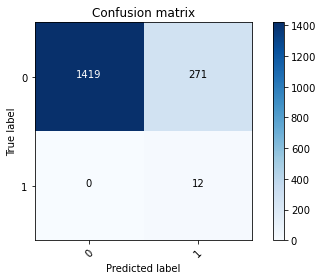

Tempo gasto fold 4 - 00:00:00
For fold 5:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.72      1702
weighted avg       0.99      0.98      0.99      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.982374   0.285714     1.0  0.444444  0.666667   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.529757  12.0  1660.0   0.991124  
Confusion matrix, without normalization
[[1660   30]
 [   0   12]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


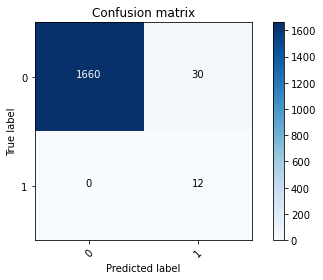

best fold 5
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.29      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.72      1702
weighted avg       0.99      0.98      0.99      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.982374   0.285714     1.0  0.444444  0.666667   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.529757  12.0  1660.0   0.991124  
Confusion matrix, without normalization
[[1660   30]
 [   0   12]]


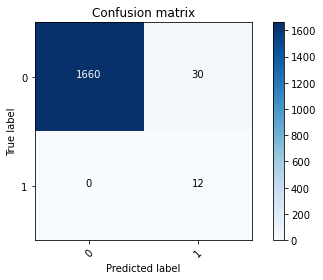

Tempo gasto fold 5 - 00:00:00
For fold 6:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.31      0.92      0.46        12

    accuracy                           0.98      1702
   macro avg       0.65      0.95      0.73      1702
weighted avg       0.99      0.98      0.99      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.984724   0.305556  0.916667  0.458333  0.654762   

                                MCC    TP      TN  ROC Curve  
Regressao Logistica Smote  0.524434  11.0  1665.0   0.950937  
Confusion matrix, without normalization
[[1665   25]
 [   1   11]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


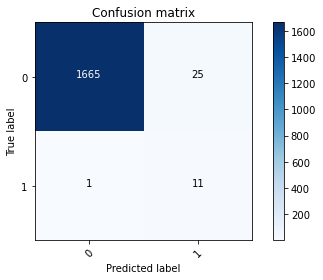

Tempo gasto fold 6 - 00:00:00
For fold 7:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.44      0.58      0.50        12

    accuracy                           0.99      1702
   macro avg       0.72      0.79      0.75      1702
weighted avg       0.99      0.99      0.99      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.991774     0.4375  0.583333       0.5  0.546875   

                                MCC   TP      TN  ROC Curve  
Regressao Logistica Smote  0.501163  7.0  1681.0   0.789004  
Confusion matrix, without normalization
[[1681    9]
 [   5    7]]


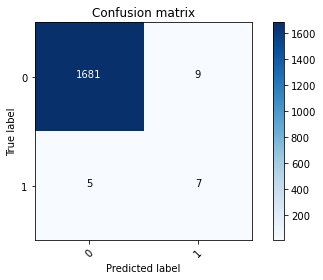

Tempo gasto fold 7 - 00:00:00
For fold 8:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.35      0.50      0.41        12

    accuracy                           0.99      1702
   macro avg       0.67      0.75      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.990012   0.352941     0.5  0.413793  0.461538   

                               MCC   TP      TN  ROC Curve  
Regressao Logistica Smote  0.41523  6.0  1679.0   0.746746  
Confusion matrix, without normalization
[[1679   11]
 [   6    6]]


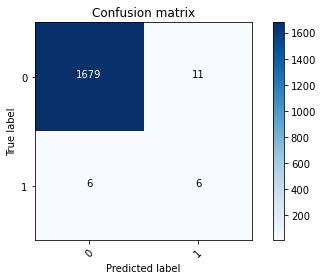

Tempo gasto fold 8 - 00:00:00
For fold 9:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.39      0.75      0.51        12

    accuracy                           0.99      1702
   macro avg       0.69      0.87      0.75      1702
weighted avg       0.99      0.99      0.99      1702

                            Acuracy  Precision  Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.990012   0.391304    0.75  0.514286  0.633803   

                                MCC   TP      TN  ROC Curve  
Regressao Logistica Smote  0.537505  9.0  1676.0   0.870858  
Confusion matrix, without normalization
[[1676   14]
 [   3    9]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


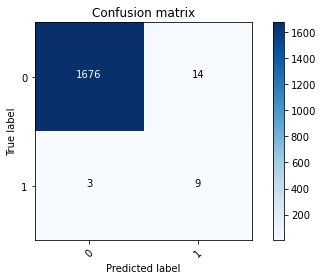

Tempo gasto fold 9 - 00:00:00
For fold 10:
Regressao Logistica Smote

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.58      0.58      0.58        12

    accuracy                           0.99      1702
   macro avg       0.79      0.79      0.79      1702
weighted avg       0.99      0.99      0.99      1702

                            Acuracy  Precision    Recall  F1-score    F-beta  \
Regressao Logistica Smote  0.994125   0.583333  0.583333  0.583333  0.583333   

                                MCC   TP      TN  ROC Curve  
Regressao Logistica Smote  0.580375  7.0  1685.0   0.790187  
Confusion matrix, without normalization
[[1685    5]
 [   5    7]]


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


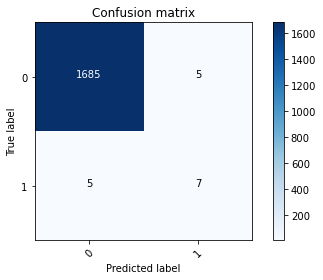

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16274   629]
 [   21    96]]


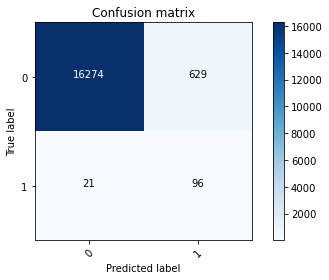

In [60]:
results_metrics, results_cv, bestModel = cv(X,y,logReg,'Regressao Logistica Smote', balancer=smt)

all_results = all_results.append(results_metrics)

### Linear SVM

In [61]:
l_svm = svm.SVC(kernel='linear', C=0.00001, probability=True) # Linear Kernel

estimators.append(('Linear SVM',l_svm))

**Without Balance**

In [ ]:
results_metrics, results_cv, bestModel = cv(X, y, l_svm, 'Linear SVM No Balance')

all_results = all_results.append(results_metrics)

**Under sample**

For fold 1:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.08      0.91      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision    Recall  F1-score   F-beta  \
Linear SVM UnderSample  0.934195   0.082645  0.909091  0.151515  0.30303   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.263008  10.0  1580.0   0.921725  
Confusion matrix, without normalization
[[1580  111]
 [   1   10]]


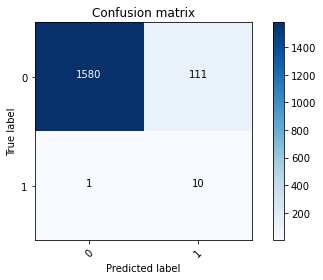

best fold 1
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.08      0.91      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision    Recall  F1-score   F-beta  \
Linear SVM UnderSample  0.934195   0.082645  0.909091  0.151515  0.30303   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.263008  10.0  1580.0   0.921725  
Confusion matrix, without normalization
[[1580  111]
 [   1   10]]


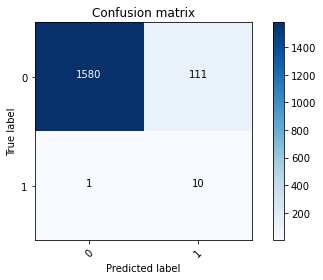

Tempo gasto fold 1 - 00:00:00
For fold 2:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.14        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.917744   0.072848     1.0  0.135802  0.282051   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.258489  11.0  1551.0   0.958604  
Confusion matrix, without normalization
[[1551  140]
 [   0   11]]


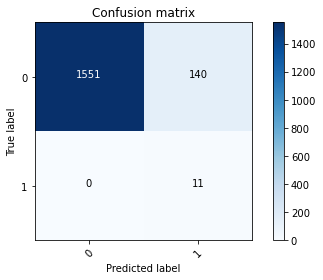

best fold 2
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.14        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.92      0.95      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.917744   0.072848     1.0  0.135802  0.282051   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.258489  11.0  1551.0   0.958604  
Confusion matrix, without normalization
[[1551  140]
 [   0   11]]


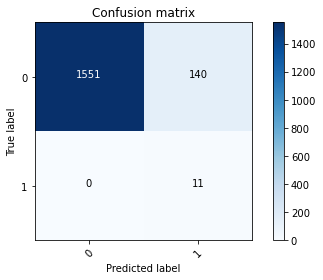

Tempo gasto fold 2 - 00:00:00
For fold 3:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.14      0.91      0.24        11

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.98      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.96181   0.135135  0.909091  0.235294  0.423729   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.342346  10.0  1627.0   0.935622  
Confusion matrix, without normalization
[[1627   64]
 [   1   10]]


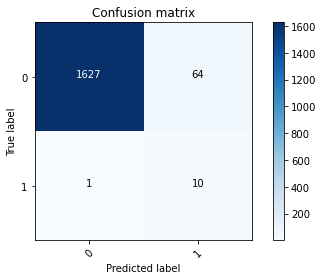

Tempo gasto fold 3 - 00:00:00
For fold 4:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.71      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.981786    0.27907     1.0  0.436364  0.659341   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.523403  12.0  1659.0   0.990828  
Confusion matrix, without normalization
[[1659   31]
 [   0   12]]


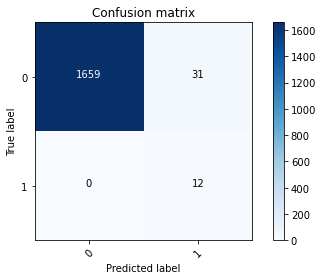

best fold 4
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      1.00      0.44        12

    accuracy                           0.98      1702
   macro avg       0.64      0.99      0.71      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.981786    0.27907     1.0  0.436364  0.659341   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.523403  12.0  1659.0   0.990828  
Confusion matrix, without normalization
[[1659   31]
 [   0   12]]


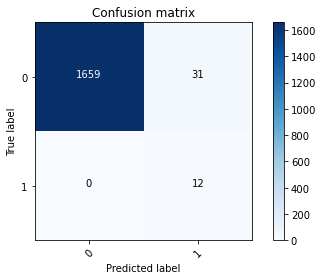

Tempo gasto fold 4 - 00:00:00
For fold 5:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.19      1.00      0.32        12

    accuracy                           0.97      1702
   macro avg       0.60      0.99      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.970623   0.193548     1.0  0.324324  0.545455   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.433384  12.0  1640.0   0.985207  
Confusion matrix, without normalization
[[1640   50]
 [   0   12]]


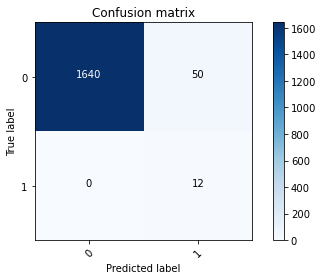

Tempo gasto fold 5 - 00:00:00
For fold 6:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      0.92      0.43        12

    accuracy                           0.98      1702
   macro avg       0.64      0.95      0.71      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.982961   0.282051  0.916667  0.431373  0.632184   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.503322  11.0  1662.0   0.950049  
Confusion matrix, without normalization
[[1662   28]
 [   1   11]]


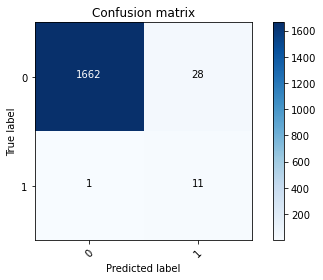

Tempo gasto fold 6 - 00:00:00
For fold 7:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.50      0.75      0.60        12

    accuracy                           0.99      1702
   macro avg       0.75      0.87      0.80      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.992949        0.5    0.75       0.6  0.681818   

                             MCC   TP      TN  ROC Curve  
Linear SVM UnderSample  0.609106  9.0  1681.0   0.872337  
Confusion matrix, without normalization
[[1681    9]
 [   3    9]]


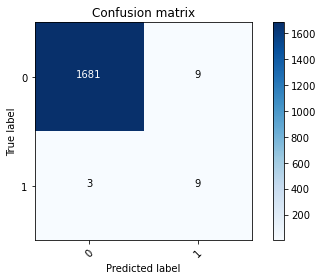

Tempo gasto fold 7 - 00:00:00
For fold 8:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.22      0.75      0.34        12

    accuracy                           0.98      1702
   macro avg       0.61      0.87      0.66      1702
weighted avg       0.99      0.98      0.98      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.979436   0.219512    0.75  0.339623  0.505618   

                             MCC   TP      TN  ROC Curve  
Linear SVM UnderSample  0.398945  9.0  1658.0   0.865533  
Confusion matrix, without normalization
[[1658   32]
 [   3    9]]


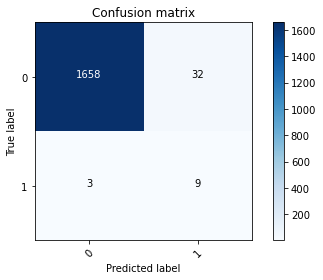

Tempo gasto fold 8 - 00:00:00
For fold 9:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.32      0.92      0.48        12

    accuracy                           0.99      1702
   macro avg       0.66      0.95      0.74      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.985899   0.323529  0.916667  0.478261  0.670732   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.540022  11.0  1667.0   0.951529  
Confusion matrix, without normalization
[[1667   23]
 [   1   11]]


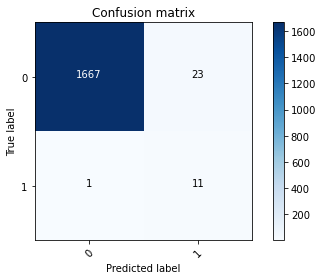

Tempo gasto fold 9 - 00:00:00
For fold 10:
Linear SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.59      0.83      0.69        12

    accuracy                           0.99      1702
   macro avg       0.79      0.91      0.84      1702
weighted avg       1.00      0.99      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM UnderSample  0.994712   0.588235  0.833333  0.689655  0.769231   

                             MCC    TP      TN  ROC Curve  
Linear SVM UnderSample  0.697693  10.0  1683.0   0.914596  
Confusion matrix, without normalization
[[1683    7]
 [   2   10]]


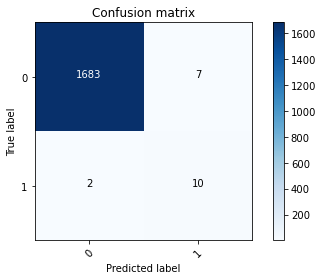

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16408   495]
 [   12   105]]


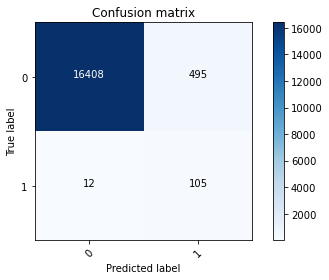

In [63]:
results_metrics, results_cv, bestModel = cv(X, y, l_svm, 'Linear SVM UnderSample', rus)

all_results = all_results.append(results_metrics)

**Over sample**

For fold 1:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.86      0.92      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.858989   0.043825     1.0  0.083969  0.186441   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.193919  11.0  1451.0   0.929036  
Confusion matrix, without normalization
[[1451  240]
 [   0   11]]


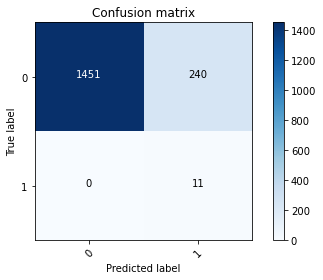

best fold 1
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.50      1702
weighted avg       0.99      0.86      0.92      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.858989   0.043825     1.0  0.083969  0.186441   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.193919  11.0  1451.0   0.929036  
Confusion matrix, without normalization
[[1451  240]
 [   0   11]]


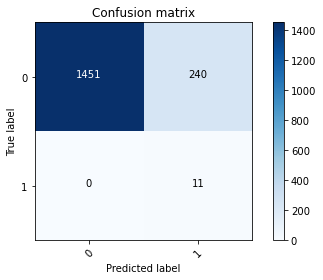

Tempo gasto fold 1 - 00:00:00
For fold 2:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.54      1702
weighted avg       0.99      0.92      0.95      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.915981   0.071429     1.0  0.133333  0.277778   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.255711  11.0  1548.0   0.957717  
Confusion matrix, without normalization
[[1548  143]
 [   0   11]]


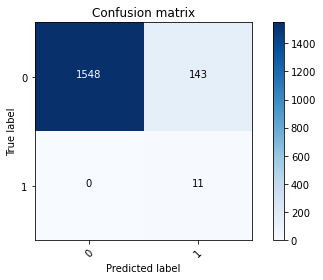

best fold 2
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1691
           1       0.07      1.00      0.13        11

    accuracy                           0.92      1702
   macro avg       0.54      0.96      0.54      1702
weighted avg       0.99      0.92      0.95      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.915981   0.071429     1.0  0.133333  0.277778   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.255711  11.0  1548.0   0.957717  
Confusion matrix, without normalization
[[1548  143]
 [   0   11]]


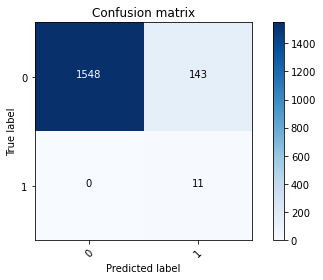

Tempo gasto fold 2 - 00:00:00
For fold 3:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1691
           1       0.16      0.91      0.27        11

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM OverSample  0.967685    0.15625  0.909091  0.266667  0.462963   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.369487  10.0  1637.0   0.938579  
Confusion matrix, without normalization
[[1637   54]
 [   1   10]]


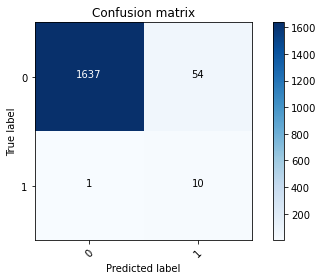

Tempo gasto fold 3 - 00:00:00
For fold 4:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.55      1.00      0.71        12

    accuracy                           0.99      1702
   macro avg       0.77      1.00      0.85      1702
weighted avg       1.00      0.99      0.99      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.994125   0.545455     1.0  0.705882  0.857143   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.736361  12.0  1680.0   0.997041  
Confusion matrix, without normalization
[[1680   10]
 [   0   12]]


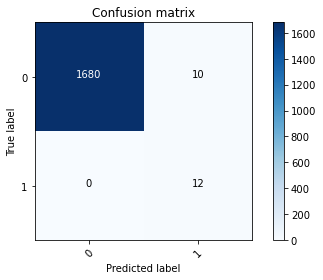

best fold 4
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.55      1.00      0.71        12

    accuracy                           0.99      1702
   macro avg       0.77      1.00      0.85      1702
weighted avg       1.00      0.99      0.99      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.994125   0.545455     1.0  0.705882  0.857143   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.736361  12.0  1680.0   0.997041  
Confusion matrix, without normalization
[[1680   10]
 [   0   12]]


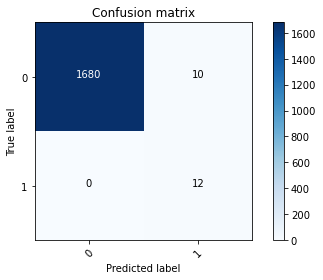

Tempo gasto fold 4 - 00:00:00
For fold 5:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.40      1.00      0.57        12

    accuracy                           0.99      1702
   macro avg       0.70      0.99      0.78      1702
weighted avg       1.00      0.99      0.99      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.989424        0.4     1.0  0.571429  0.769231   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.629078  12.0  1672.0   0.994675  
Confusion matrix, without normalization
[[1672   18]
 [   0   12]]


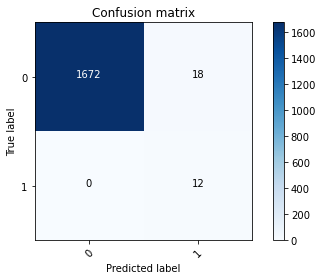

Tempo gasto fold 5 - 00:00:00
For fold 6:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.34      0.92      0.50        12

    accuracy                           0.99      1702
   macro avg       0.67      0.95      0.75      1702
weighted avg       0.99      0.99      0.99      1702

                        Acuracy  Precision    Recall  F1-score  F-beta  \
Linear SVM OverSample  0.987074    0.34375  0.916667       0.5  0.6875   

                            MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.557038  11.0  1669.0    0.95212  
Confusion matrix, without normalization
[[1669   21]
 [   1   11]]


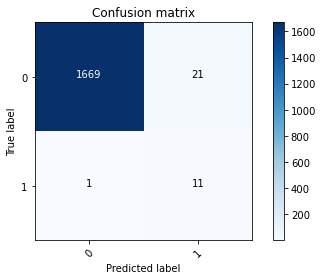

Tempo gasto fold 6 - 00:00:02
For fold 7:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.32      0.75      0.45        12

    accuracy                           0.99      1702
   macro avg       0.66      0.87      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Linear SVM OverSample  0.987074   0.321429    0.75      0.45  0.592105   

                            MCC   TP      TN  ROC Curve  
Linear SVM OverSample  0.485936  9.0  1671.0   0.869379  
Confusion matrix, without normalization
[[1671   19]
 [   3    9]]


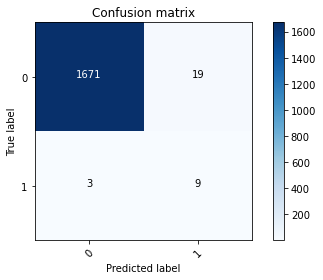

Tempo gasto fold 7 - 00:00:00
For fold 8:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.26      0.67      0.37        12

    accuracy                           0.98      1702
   macro avg       0.63      0.83      0.68      1702
weighted avg       0.99      0.98      0.99      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM OverSample  0.984136   0.258065  0.666667  0.372093  0.506329   

                            MCC   TP      TN  ROC Curve  
Linear SVM OverSample  0.408617  8.0  1667.0   0.826529  
Confusion matrix, without normalization
[[1667   23]
 [   4    8]]


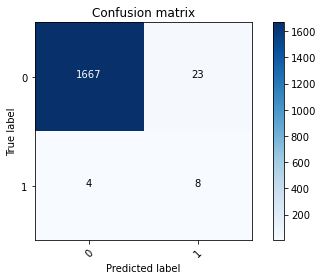

Tempo gasto fold 8 - 00:00:00
For fold 9:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.36      0.83      0.50        12

    accuracy                           0.99      1702
   macro avg       0.68      0.91      0.75      1702
weighted avg       0.99      0.99      0.99      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM OverSample  0.988249   0.357143  0.833333       0.5  0.657895   

                           MCC    TP      TN  ROC Curve  
Linear SVM OverSample  0.54114  10.0  1672.0   0.911341  
Confusion matrix, without normalization
[[1672   18]
 [   2   10]]


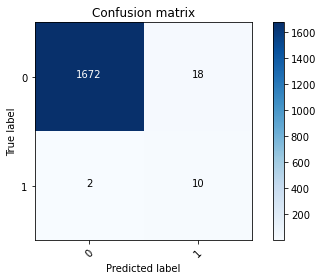

Tempo gasto fold 9 - 00:00:00
For fold 10:
Linear SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.67      0.67      0.67        12

    accuracy                           1.00      1702
   macro avg       0.83      0.83      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Linear SVM OverSample   0.9953   0.666667  0.666667  0.666667  0.666667   

                          MCC   TP      TN  ROC Curve  
Linear SVM OverSample  0.6643  8.0  1686.0    0.83215  
Confusion matrix, without normalization
[[1686    4]
 [   4    8]]


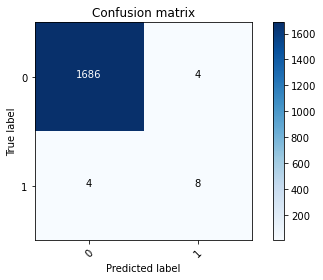

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16353   550]
 [   15   102]]


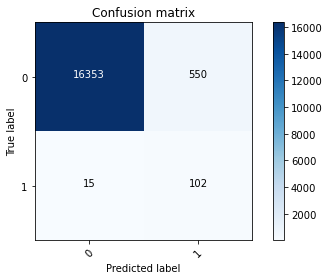

In [64]:
results_metrics, results_cv, bestModel = cv(X, y, l_svm, 'Linear SVM OverSample', ros)

all_results = all_results.append(results_metrics)

**SMOTE**

In [ ]:
results_metrics, results_cv, bestModel = cv(X, y, l_svm, 'Linear SVM Smote', smt)

all_results = all_results.append(results_metrics)

### Gaussian SVM

In [63]:
g_svm = svm.SVC(kernel='rbf', probability=True)

estimators.append(('Gaussian SVM',g_svm))

**WIthout balance**

For fold 1:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.36      0.36      0.36        11

    accuracy                           0.99      1702
   macro avg       0.68      0.68      0.68      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.991774   0.363636  0.363636  0.363636  0.363636   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.359497  4.0  1684.0   0.679748  
Confusion matrix, without normalization
[[1684    7]
 [   7    4]]


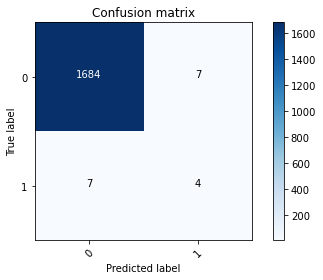

best fold 1
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.36      0.36      0.36        11

    accuracy                           0.99      1702
   macro avg       0.68      0.68      0.68      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.991774   0.363636  0.363636  0.363636  0.363636   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.359497  4.0  1684.0   0.679748  
Confusion matrix, without normalization
[[1684    7]
 [   7    4]]


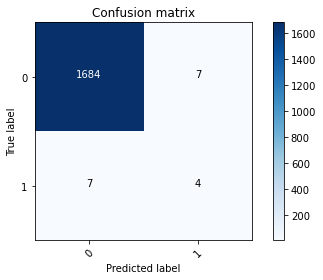

Tempo gasto fold 1 - 00:00:01
For fold 2:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.69      0.82      0.75        11

    accuracy                           1.00      1702
   macro avg       0.85      0.91      0.87      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.996475   0.692308  0.818182      0.75  0.789474   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.750886  9.0  1687.0   0.907908  
Confusion matrix, without normalization
[[1687    4]
 [   2    9]]


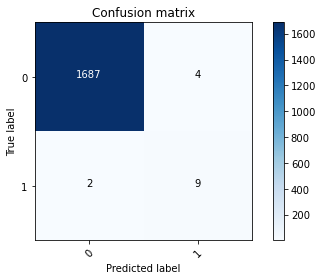

best fold 2
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.69      0.82      0.75        11

    accuracy                           1.00      1702
   macro avg       0.85      0.91      0.87      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.996475   0.692308  0.818182      0.75  0.789474   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.750886  9.0  1687.0   0.907908  
Confusion matrix, without normalization
[[1687    4]
 [   2    9]]


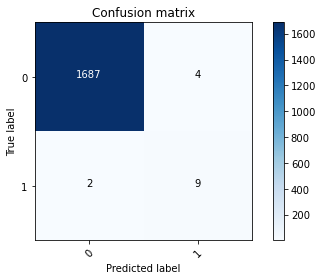

Tempo gasto fold 2 - 00:00:01
For fold 3:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.75      0.27      0.40        11

    accuracy                           0.99      1702
   macro avg       0.87      0.64      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM No Balance  0.994712       0.75  0.272727       0.4  0.3125   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.450355  3.0  1690.0   0.636068  
Confusion matrix, without normalization
[[1690    1]
 [   8    3]]


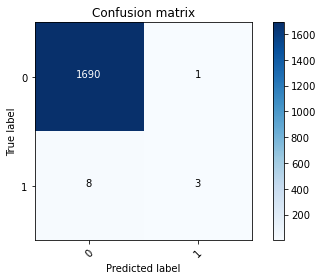

Tempo gasto fold 3 - 00:00:01
For fold 4:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


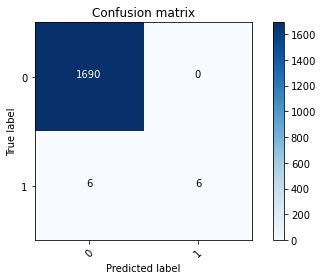

Tempo gasto fold 4 - 00:00:01
For fold 5:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


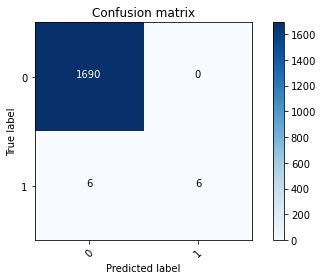

Tempo gasto fold 5 - 00:00:01
For fold 6:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.33      0.50        12

    accuracy                           1.00      1702
   macro avg       1.00      0.67      0.75      1702
weighted avg       1.00      1.00      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance   0.9953        1.0  0.333333       0.5  0.384615   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.575989  4.0  1690.0   0.666667  
Confusion matrix, without normalization
[[1690    0]
 [   8    4]]


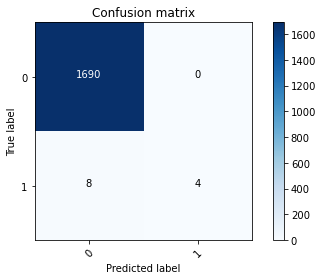

Tempo gasto fold 6 - 00:00:01
For fold 7:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Gaussian SVM No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                          TP      TN  ROC Curve  
Gaussian SVM No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

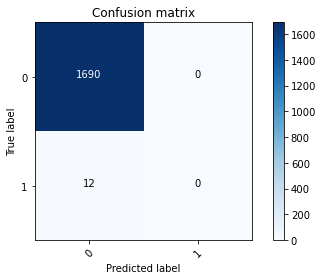

Tempo gasto fold 7 - 00:00:01
For fold 8:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                             MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


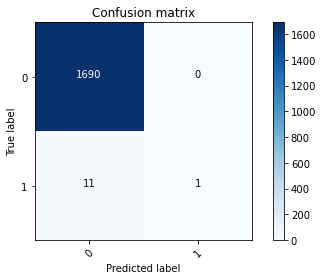

Tempo gasto fold 8 - 00:00:01
For fold 9:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Gaussian SVM No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                          TP      TN  ROC Curve  
Gaussian SVM No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

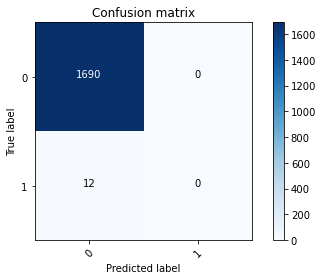

Tempo gasto fold 9 - 00:00:01
For fold 10:
Gaussian SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


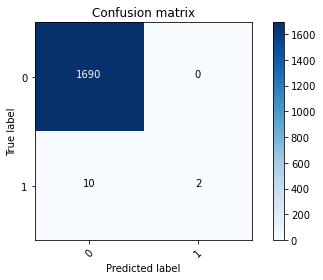

Tempo gasto fold 10 - 00:00:01

Confusion matrix, without normalization
[[16891    12]
 [   82    35]]


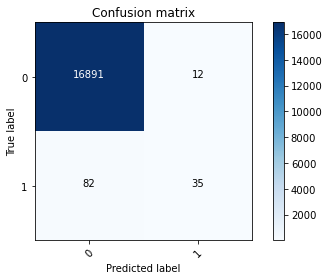

In [75]:
results_metrics, results_cv, bestModel = cv(X, y, g_svm, 'Gaussian SVM No Balance')

all_results = all_results.append(results_metrics)

**Under sample**

For fold 1:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.13      0.55      0.21        11

    accuracy                           0.97      1702
   macro avg       0.57      0.76      0.60      1702
weighted avg       0.99      0.97      0.98      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.974148   0.133333  0.545455  0.214286  0.337079   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.260913  6.0  1652.0   0.761196  
Confusion matrix, without normalization
[[1652   39]
 [   5    6]]


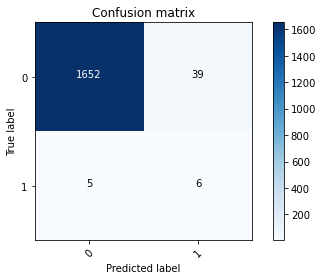

best fold 1
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.13      0.55      0.21        11

    accuracy                           0.97      1702
   macro avg       0.57      0.76      0.60      1702
weighted avg       0.99      0.97      0.98      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.974148   0.133333  0.545455  0.214286  0.337079   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.260913  6.0  1652.0   0.761196  
Confusion matrix, without normalization
[[1652   39]
 [   5    6]]


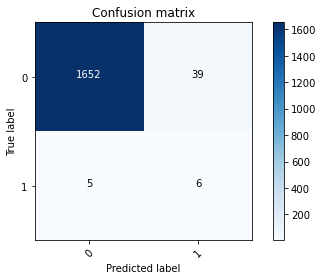

Tempo gasto fold 1 - 00:00:00
For fold 2:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.48      0.91      0.62        11

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.992949    0.47619  0.909091     0.625  0.769231   

                               MCC    TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.655184  10.0  1680.0   0.951293  
Confusion matrix, without normalization
[[1680   11]
 [   1   10]]


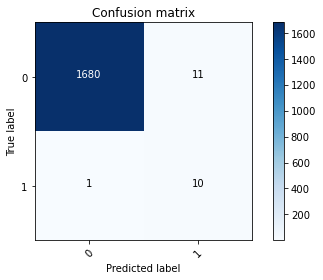

best fold 2
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.48      0.91      0.62        11

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.992949    0.47619  0.909091     0.625  0.769231   

                               MCC    TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.655184  10.0  1680.0   0.951293  
Confusion matrix, without normalization
[[1680   11]
 [   1   10]]


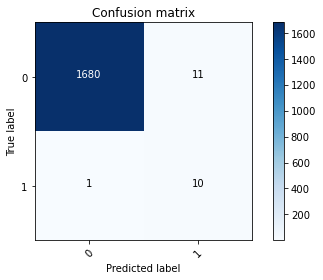

Tempo gasto fold 2 - 00:00:00
For fold 3:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.58      0.64      0.61        11

    accuracy                           0.99      1702
   macro avg       0.79      0.82      0.80      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM UnderSample  0.994712   0.583333  0.636364  0.608696   0.625   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.60662  7.0  1686.0   0.816703  
Confusion matrix, without normalization
[[1686    5]
 [   4    7]]


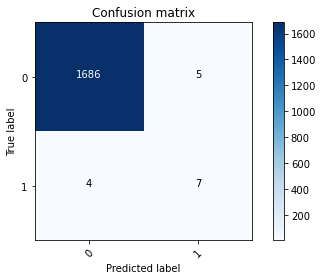

Tempo gasto fold 3 - 00:00:00
For fold 4:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.70      0.58      0.64        12

    accuracy                           1.00      1702
   macro avg       0.85      0.79      0.82      1702
weighted avg       0.99      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample   0.9953        0.7  0.583333  0.636364  0.603448   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.636688  7.0  1687.0   0.790779  
Confusion matrix, without normalization
[[1687    3]
 [   5    7]]


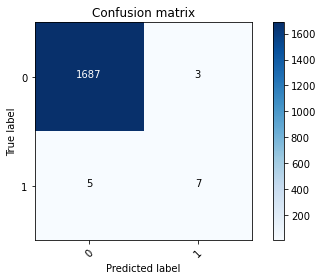

Tempo gasto fold 4 - 00:00:00
For fold 5:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.62      0.67      0.64        12

    accuracy                           0.99      1702
   macro avg       0.81      0.83      0.82      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.994712   0.615385  0.666667      0.64  0.655738   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.637859  8.0  1685.0   0.831854  
Confusion matrix, without normalization
[[1685    5]
 [   4    8]]


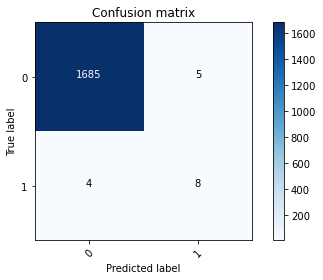

Tempo gasto fold 5 - 00:00:00
For fold 6:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.58      0.74        12

    accuracy                           1.00      1702
   macro avg       1.00      0.79      0.87      1702
weighted avg       1.00      1.00      1.00      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.997062        1.0  0.583333  0.736842  0.636364   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.762635  7.0  1690.0   0.791667  
Confusion matrix, without normalization
[[1690    0]
 [   5    7]]


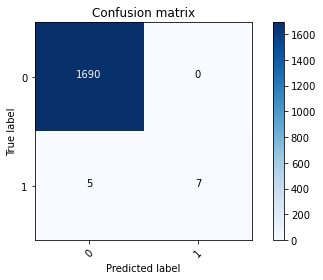

Tempo gasto fold 6 - 00:00:00
For fold 7:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM UnderSample  0.994125        1.0  0.166667  0.285714     0.2   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


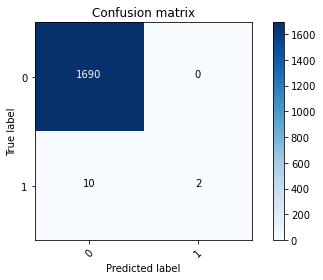

Tempo gasto fold 7 - 00:00:00
For fold 8:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM UnderSample  0.992949        0.5  0.083333  0.142857     0.1   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.202078  1.0  1689.0   0.541371  
Confusion matrix, without normalization
[[1689    1]
 [  11    1]]


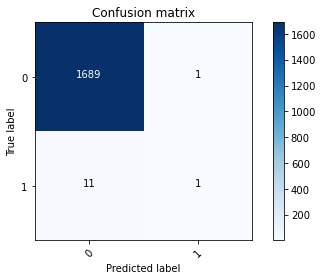

Tempo gasto fold 8 - 00:00:00
For fold 9:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM UnderSample  0.994125        1.0  0.166667  0.285714     0.2   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


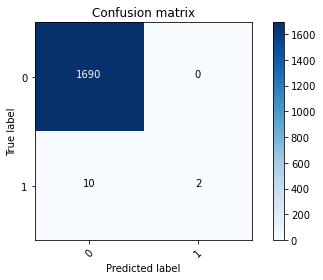

Tempo gasto fold 9 - 00:00:00
For fold 10:
Gaussian SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                           Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM UnderSample  0.993537   0.666667  0.166667  0.266667  0.196078   

                               MCC   TP      TN  ROC Curve  
Gaussian SVM UnderSample  0.331269  2.0  1689.0   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


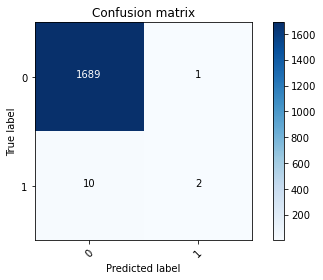

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16838    65]
 [   65    52]]


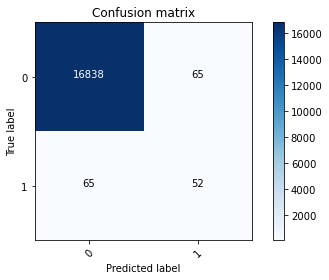

In [76]:
results_metrics, results_cv, bestModel = cv(X, y, g_svm, 'Gaussian SVM UnderSample', rus)

all_results = all_results.append(results_metrics)

**Over sample**

For fold 1:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.15      0.64      0.24        11

    accuracy                           0.97      1702
   macro avg       0.57      0.81      0.61      1702
weighted avg       0.99      0.97      0.98      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.974148   0.148936  0.636364  0.241379  0.384615   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.299623  7.0  1651.0   0.806354  
Confusion matrix, without normalization
[[1651   40]
 [   4    7]]


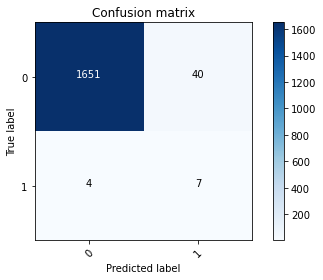

best fold 1
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1691
           1       0.15      0.64      0.24        11

    accuracy                           0.97      1702
   macro avg       0.57      0.81      0.61      1702
weighted avg       0.99      0.97      0.98      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.974148   0.148936  0.636364  0.241379  0.384615   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.299623  7.0  1651.0   0.806354  
Confusion matrix, without normalization
[[1651   40]
 [   4    7]]


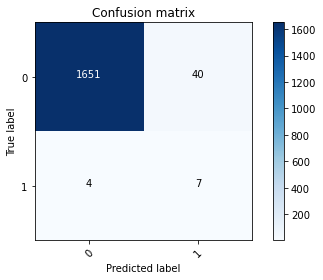

Tempo gasto fold 1 - 00:00:00
For fold 2:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.48      0.91      0.62        11

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.992949    0.47619  0.909091     0.625  0.769231   

                              MCC    TP      TN  ROC Curve  
Gaussian SVM OverSample  0.655184  10.0  1680.0   0.951293  
Confusion matrix, without normalization
[[1680   11]
 [   1   10]]


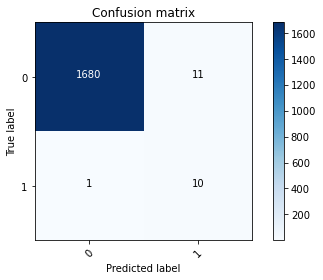

best fold 2
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.48      0.91      0.62        11

    accuracy                           0.99      1702
   macro avg       0.74      0.95      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.992949    0.47619  0.909091     0.625  0.769231   

                              MCC    TP      TN  ROC Curve  
Gaussian SVM OverSample  0.655184  10.0  1680.0   0.951293  
Confusion matrix, without normalization
[[1680   11]
 [   1   10]]


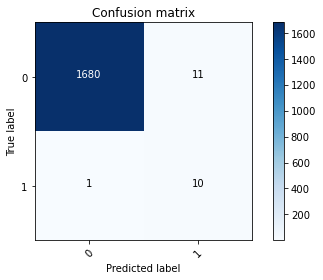

Tempo gasto fold 2 - 00:00:00
For fold 3:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.58      0.64      0.61        11

    accuracy                           0.99      1702
   macro avg       0.79      0.82      0.80      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM OverSample  0.994712   0.583333  0.636364  0.608696   0.625   

                             MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.60662  7.0  1686.0   0.816703  
Confusion matrix, without normalization
[[1686    5]
 [   4    7]]


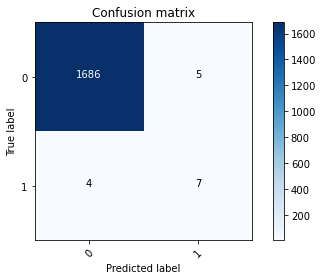

Tempo gasto fold 3 - 00:00:00
For fold 4:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.70      0.58      0.64        12

    accuracy                           1.00      1702
   macro avg       0.85      0.79      0.82      1702
weighted avg       0.99      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample   0.9953        0.7  0.583333  0.636364  0.603448   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.636688  7.0  1687.0   0.790779  
Confusion matrix, without normalization
[[1687    3]
 [   5    7]]


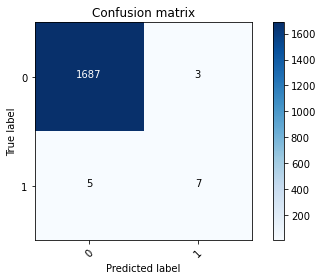

Tempo gasto fold 4 - 00:00:00
For fold 5:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.62      0.67      0.64        12

    accuracy                           0.99      1702
   macro avg       0.81      0.83      0.82      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.994712   0.615385  0.666667      0.64  0.655738   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.637859  8.0  1685.0   0.831854  
Confusion matrix, without normalization
[[1685    5]
 [   4    8]]


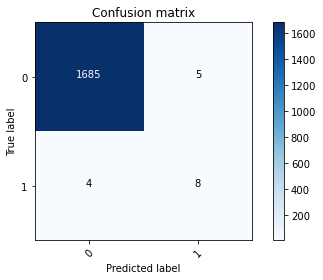

Tempo gasto fold 5 - 00:00:00
For fold 6:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.58      0.74        12

    accuracy                           1.00      1702
   macro avg       1.00      0.79      0.87      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.997062        1.0  0.583333  0.736842  0.636364   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.762635  7.0  1690.0   0.791667  
Confusion matrix, without normalization
[[1690    0]
 [   5    7]]


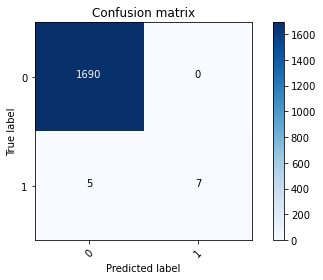

Tempo gasto fold 6 - 00:00:00
For fold 7:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM OverSample  0.994125        1.0  0.166667  0.285714     0.2   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


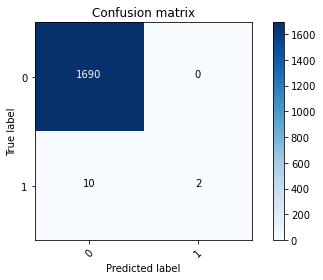

Tempo gasto fold 7 - 00:00:00
For fold 8:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM OverSample  0.992949        0.5  0.083333  0.142857     0.1   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.202078  1.0  1689.0   0.541371  
Confusion matrix, without normalization
[[1689    1]
 [  11    1]]


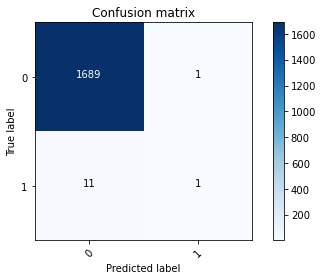

Tempo gasto fold 8 - 00:00:00
For fold 9:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Gaussian SVM OverSample  0.994125        1.0  0.166667  0.285714     0.2   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


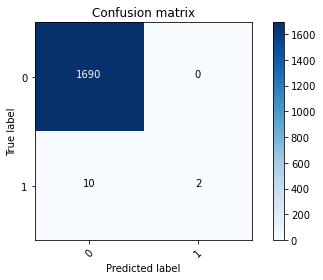

Tempo gasto fold 9 - 00:00:00
For fold 10:
Gaussian SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM OverSample  0.993537   0.666667  0.166667  0.266667  0.196078   

                              MCC   TP      TN  ROC Curve  
Gaussian SVM OverSample  0.331269  2.0  1689.0   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


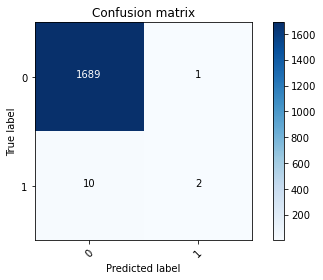

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16837    66]
 [   64    53]]


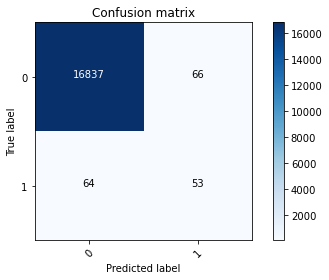

In [77]:
results_metrics, results_cv, bestModel = cv(X, y, g_svm, 'Gaussian SVM OverSample', ros)

all_results = all_results.append(results_metrics)

**SMOTE**

For fold 1:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1691
           1       0.06      0.91      0.11        11

    accuracy                           0.91      1702
   macro avg       0.53      0.91      0.53      1702
weighted avg       0.99      0.91      0.94      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.905993   0.059172  0.909091  0.111111  0.234742   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.218396  10.0  1532.0   0.907532  
Confusion matrix, without normalization
[[1532  159]
 [   1   10]]


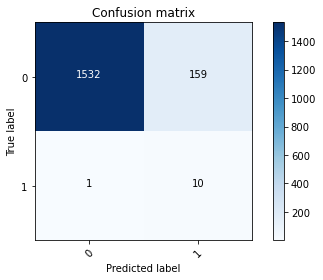

best fold 1
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1691
           1       0.06      0.91      0.11        11

    accuracy                           0.91      1702
   macro avg       0.53      0.91      0.53      1702
weighted avg       0.99      0.91      0.94      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.905993   0.059172  0.909091  0.111111  0.234742   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.218396  10.0  1532.0   0.907532  
Confusion matrix, without normalization
[[1532  159]
 [   1   10]]


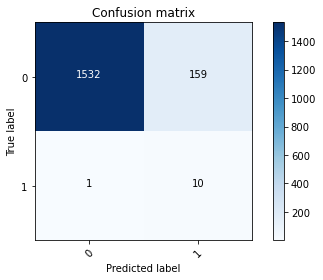

Tempo gasto fold 1 - 00:00:36
For fold 2:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.11      0.91      0.19        11

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.951234   0.108696  0.909091  0.194175  0.367647   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.304973  10.0  1609.0   0.930299  
Confusion matrix, without normalization
[[1609   82]
 [   1   10]]


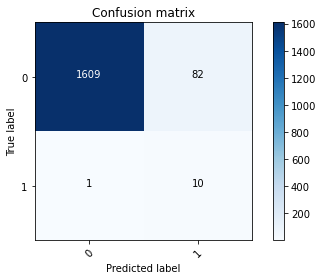

best fold 2
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.11      0.91      0.19        11

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.951234   0.108696  0.909091  0.194175  0.367647   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.304973  10.0  1609.0   0.930299  
Confusion matrix, without normalization
[[1609   82]
 [   1   10]]


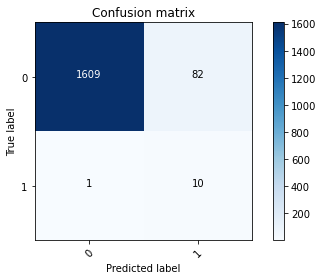

Tempo gasto fold 2 - 00:00:37
For fold 3:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1691
           1       0.17      0.91      0.29        11

    accuracy                           0.97      1702
   macro avg       0.59      0.94      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.97121   0.172414  0.909091  0.289855  0.490196   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.388986  10.0  1643.0   0.940353  
Confusion matrix, without normalization
[[1643   48]
 [   1   10]]


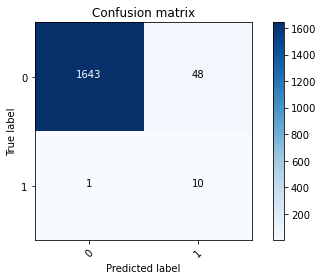

best fold 3
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1691
           1       0.17      0.91      0.29        11

    accuracy                           0.97      1702
   macro avg       0.59      0.94      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.97121   0.172414  0.909091  0.289855  0.490196   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.388986  10.0  1643.0   0.940353  
Confusion matrix, without normalization
[[1643   48]
 [   1   10]]


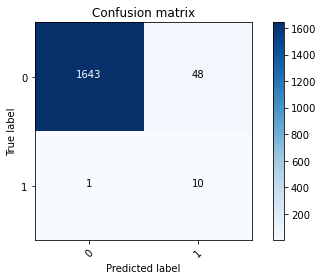

Tempo gasto fold 3 - 00:00:40
For fold 4:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.34      1.00      0.51        12

    accuracy                           0.99      1702
   macro avg       0.67      0.99      0.75      1702
weighted avg       1.00      0.99      0.99      1702

                     Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Gaussian SVM Smote  0.986486   0.342857     1.0  0.510638  0.722892  0.581542   

                      TP      TN  ROC Curve  
Gaussian SVM Smote  12.0  1667.0   0.993195  
Confusion matrix, without normalization
[[1667   23]
 [   0   12]]


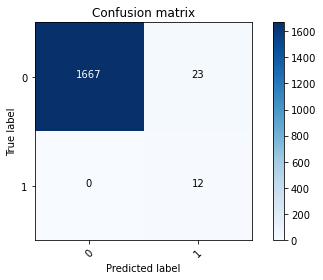

best fold 4
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.34      1.00      0.51        12

    accuracy                           0.99      1702
   macro avg       0.67      0.99      0.75      1702
weighted avg       1.00      0.99      0.99      1702

                     Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Gaussian SVM Smote  0.986486   0.342857     1.0  0.510638  0.722892  0.581542   

                      TP      TN  ROC Curve  
Gaussian SVM Smote  12.0  1667.0   0.993195  
Confusion matrix, without normalization
[[1667   23]
 [   0   12]]


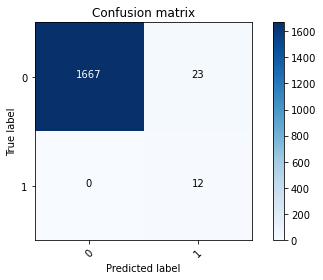

Tempo gasto fold 4 - 00:00:43
For fold 5:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.33      1.00      0.50        12

    accuracy                           0.99      1702
   macro avg       0.67      0.99      0.75      1702
weighted avg       1.00      0.99      0.99      1702

                     Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Gaussian SVM Smote  0.985899   0.333333     1.0       0.5  0.714286  0.573236   

                      TP      TN  ROC Curve  
Gaussian SVM Smote  12.0  1666.0   0.992899  
Confusion matrix, without normalization
[[1666   24]
 [   0   12]]


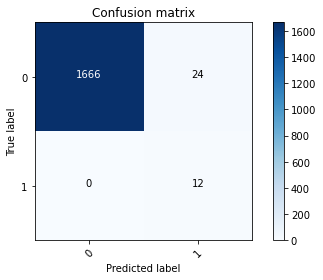

Tempo gasto fold 5 - 00:00:40
For fold 6:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.37      0.92      0.52        12

    accuracy                           0.99      1702
   macro avg       0.68      0.95      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.988249   0.366667  0.916667   0.52381  0.705128   

                         MCC    TP      TN  ROC Curve  
Gaussian SVM Smote  0.575715  11.0  1671.0   0.952712  
Confusion matrix, without normalization
[[1671   19]
 [   1   11]]


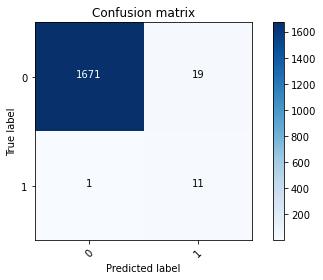

Tempo gasto fold 6 - 00:00:40
For fold 7:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.47      0.67      0.55        12

    accuracy                           0.99      1702
   macro avg       0.73      0.83      0.77      1702
weighted avg       0.99      0.99      0.99      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.992362   0.470588  0.666667  0.551724  0.615385   

                         MCC   TP      TN  ROC Curve  
Gaussian SVM Smote  0.556462  8.0  1681.0   0.830671  
Confusion matrix, without normalization
[[1681    9]
 [   4    8]]


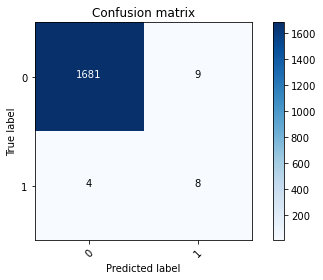

Tempo gasto fold 7 - 00:00:34
For fold 8:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.32      0.50      0.39        12

    accuracy                           0.99      1702
   macro avg       0.66      0.75      0.69      1702
weighted avg       0.99      0.99      0.99      1702

                     Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Gaussian SVM Smote  0.988837   0.315789     0.5  0.387097  0.447761  0.392059   

                     TP      TN  ROC Curve  
Gaussian SVM Smote  6.0  1677.0   0.746154  
Confusion matrix, without normalization
[[1677   13]
 [   6    6]]


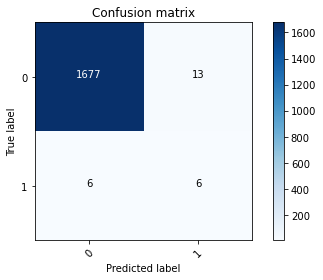

Tempo gasto fold 8 - 00:00:33
For fold 9:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.60      0.50      0.55        12

    accuracy                           0.99      1702
   macro avg       0.80      0.75      0.77      1702
weighted avg       0.99      0.99      0.99      1702

                     Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Gaussian SVM Smote  0.994125        0.6     0.5  0.545455  0.517241  0.544808   

                     TP      TN  ROC Curve  
Gaussian SVM Smote  6.0  1686.0   0.748817  
Confusion matrix, without normalization
[[1686    4]
 [   6    6]]


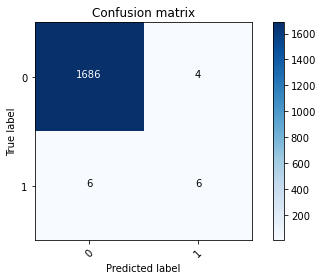

Tempo gasto fold 9 - 00:00:32
For fold 10:
Gaussian SVM Smote

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.62      0.67      0.64        12

    accuracy                           0.99      1702
   macro avg       0.81      0.83      0.82      1702
weighted avg       0.99      0.99      0.99      1702

                     Acuracy  Precision    Recall  F1-score    F-beta  \
Gaussian SVM Smote  0.994712   0.615385  0.666667      0.64  0.655738   

                         MCC   TP      TN  ROC Curve  
Gaussian SVM Smote  0.637859  8.0  1685.0   0.831854  
Confusion matrix, without normalization
[[1685    5]
 [   4    8]]


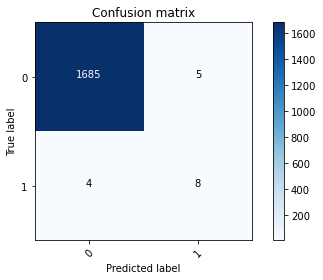

Tempo gasto fold 10 - 00:00:34

Confusion matrix, without normalization
[[16517   386]
 [   24    93]]


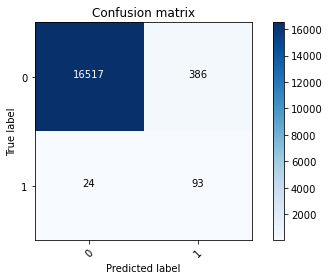

In [78]:
results_metrics, results_cv, bestModel = cv(X, y, g_svm, 'Gaussian SVM Smote', smt)

all_results = all_results.append(results_metrics)

### Sigmoid SVM

In [67]:
s_svm = svm.SVC(kernel='sigmoid', probability=True)

estimators.append(('Sigmoid SVM',s_svm))

**No balance**

For fold 1:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.19      0.55      0.29        11

    accuracy                           0.98      1702
   macro avg       0.60      0.77      0.64      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM No Balance  0.982374   0.193548  0.545455  0.285714     0.4   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.317998  6.0  1666.0   0.765335  
Confusion matrix, without normalization
[[1666   25]
 [   5    6]]


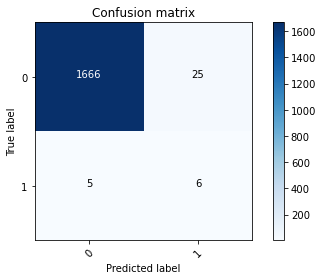

best fold 1
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.19      0.55      0.29        11

    accuracy                           0.98      1702
   macro avg       0.60      0.77      0.64      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM No Balance  0.982374   0.193548  0.545455  0.285714     0.4   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.317998  6.0  1666.0   0.765335  
Confusion matrix, without normalization
[[1666   25]
 [   5    6]]


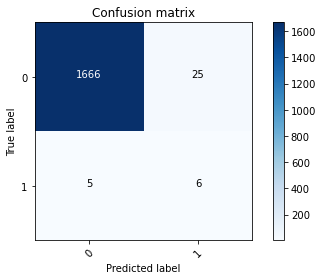

Tempo gasto fold 1 - 00:00:00
For fold 2:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.53      0.91      0.67        11

    accuracy                           0.99      1702
   macro avg       0.76      0.95      0.83      1702
weighted avg       1.00      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.994125   0.526316  0.909091  0.666667  0.793651   

                             MCC    TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.689297  10.0  1682.0   0.951884  
Confusion matrix, without normalization
[[1682    9]
 [   1   10]]


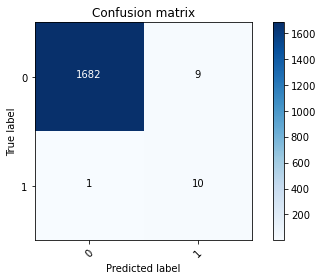

best fold 2
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.53      0.91      0.67        11

    accuracy                           0.99      1702
   macro avg       0.76      0.95      0.83      1702
weighted avg       1.00      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.994125   0.526316  0.909091  0.666667  0.793651   

                             MCC    TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.689297  10.0  1682.0   0.951884  
Confusion matrix, without normalization
[[1682    9]
 [   1   10]]


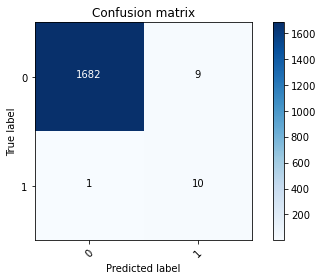

Tempo gasto fold 2 - 00:00:01
For fold 3:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.67      0.55      0.60        11

    accuracy                           1.00      1702
   macro avg       0.83      0.77      0.80      1702
weighted avg       0.99      1.00      1.00      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance   0.9953   0.666667  0.545455       0.6  0.566038   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.600706  6.0  1688.0    0.77184  
Confusion matrix, without normalization
[[1688    3]
 [   5    6]]


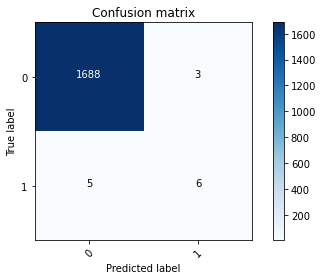

Tempo gasto fold 3 - 00:00:01
For fold 4:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.78      0.58      0.67        12

    accuracy                           1.00      1702
   macro avg       0.89      0.79      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.995887   0.777778  0.583333  0.666667  0.614035   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.671613  7.0  1688.0   0.791075  
Confusion matrix, without normalization
[[1688    2]
 [   5    7]]


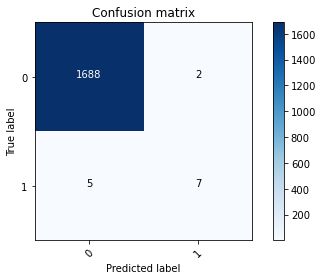

Tempo gasto fold 4 - 00:00:00
For fold 5:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM No Balance  0.996475      0.875  0.583333       0.7   0.625   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.712867  7.0  1689.0   0.791371  
Confusion matrix, without normalization
[[1689    1]
 [   5    7]]


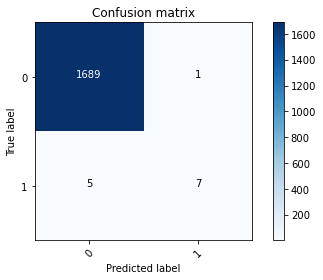

Tempo gasto fold 5 - 00:00:01
For fold 6:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.42      0.59        12

    accuracy                           1.00      1702
   macro avg       1.00      0.71      0.79      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.995887        1.0  0.416667  0.588235  0.471698   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.644165  5.0  1690.0   0.708333  
Confusion matrix, without normalization
[[1690    0]
 [   7    5]]


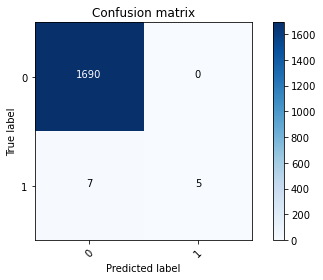

Tempo gasto fold 6 - 00:00:00
For fold 7:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


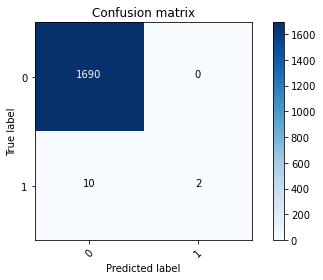

Tempo gasto fold 7 - 00:00:01
For fold 8:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                            MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


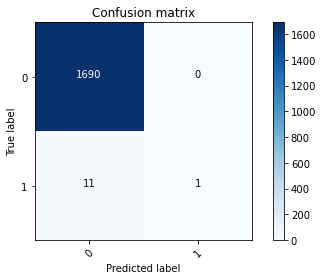

Tempo gasto fold 8 - 00:00:00
For fold 9:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Sigmoid SVM No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                         TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

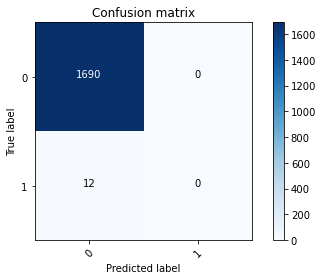

Tempo gasto fold 9 - 00:00:01
For fold 10:
Sigmoid SVM No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM No Balance  0.993537   0.666667  0.166667  0.266667  0.196078   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM No Balance  0.331269  2.0  1689.0   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


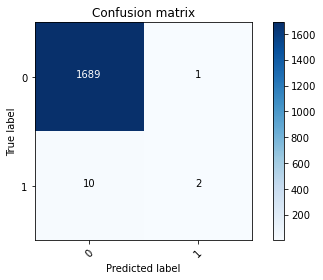

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16862    41]
 [   71    46]]


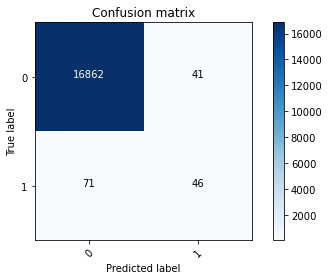

In [81]:
results_metrics, results_cv, bestModel = cv(X, y, s_svm, 'Sigmoid SVM No Balance')

all_results = all_results.append(results_metrics)

**Under sample**

For fold 1:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.21      0.55      0.31        11

    accuracy                           0.98      1702
   macro avg       0.61      0.77      0.65      1702
weighted avg       0.99      0.98      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.984136   0.214286  0.545455  0.307692  0.416667   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.335418  6.0  1669.0   0.766222  
Confusion matrix, without normalization
[[1669   22]
 [   5    6]]


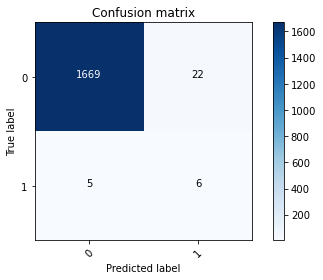

best fold 1
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.21      0.55      0.31        11

    accuracy                           0.98      1702
   macro avg       0.61      0.77      0.65      1702
weighted avg       0.99      0.98      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.984136   0.214286  0.545455  0.307692  0.416667   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.335418  6.0  1669.0   0.766222  
Confusion matrix, without normalization
[[1669   22]
 [   5    6]]


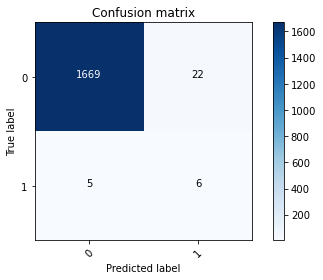

Tempo gasto fold 1 - 00:00:00
For fold 2:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.53      0.91      0.67        11

    accuracy                           0.99      1702
   macro avg       0.76      0.95      0.83      1702
weighted avg       1.00      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.994125   0.526316  0.909091  0.666667  0.793651   

                              MCC    TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.689297  10.0  1682.0   0.951884  
Confusion matrix, without normalization
[[1682    9]
 [   1   10]]


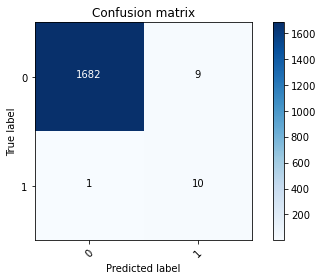

best fold 2
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.53      0.91      0.67        11

    accuracy                           0.99      1702
   macro avg       0.76      0.95      0.83      1702
weighted avg       1.00      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.994125   0.526316  0.909091  0.666667  0.793651   

                              MCC    TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.689297  10.0  1682.0   0.951884  
Confusion matrix, without normalization
[[1682    9]
 [   1   10]]


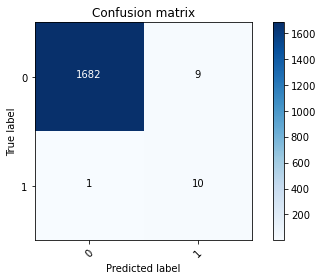

Tempo gasto fold 2 - 00:00:00
For fold 3:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.57      0.36      0.44        11

    accuracy                           0.99      1702
   macro avg       0.78      0.68      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.994125   0.571429  0.363636  0.444444  0.392157   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.453083  4.0  1688.0   0.680931  
Confusion matrix, without normalization
[[1688    3]
 [   7    4]]


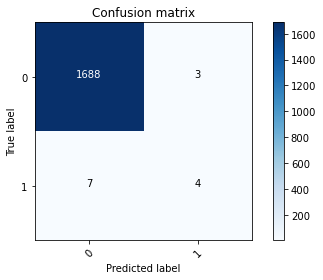

Tempo gasto fold 3 - 00:00:00
For fold 4:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.78      0.58      0.67        12

    accuracy                           1.00      1702
   macro avg       0.89      0.79      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.995887   0.777778  0.583333  0.666667  0.614035   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.671613  7.0  1688.0   0.791075  
Confusion matrix, without normalization
[[1688    2]
 [   5    7]]


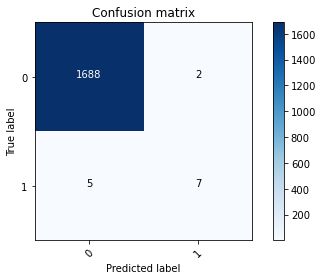

Tempo gasto fold 4 - 00:00:00
For fold 5:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM UnderSample  0.996475      0.875  0.583333       0.7   0.625   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.712867  7.0  1689.0   0.791371  
Confusion matrix, without normalization
[[1689    1]
 [   5    7]]


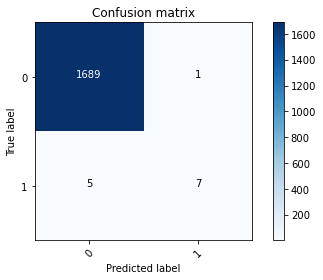

Tempo gasto fold 5 - 00:00:00
For fold 6:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.42      0.59        12

    accuracy                           1.00      1702
   macro avg       1.00      0.71      0.79      1702
weighted avg       1.00      1.00      1.00      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.995887        1.0  0.416667  0.588235  0.471698   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.644165  5.0  1690.0   0.708333  
Confusion matrix, without normalization
[[1690    0]
 [   7    5]]


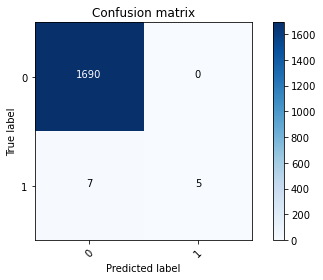

Tempo gasto fold 6 - 00:00:00
For fold 7:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM UnderSample  0.994125        1.0  0.166667  0.285714     0.2   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


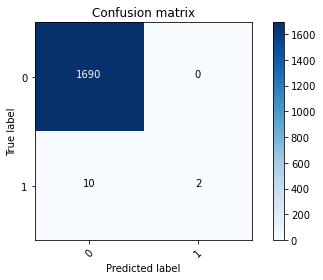

Tempo gasto fold 7 - 00:00:00
For fold 8:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.993537        1.0  0.083333  0.153846  0.102041   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


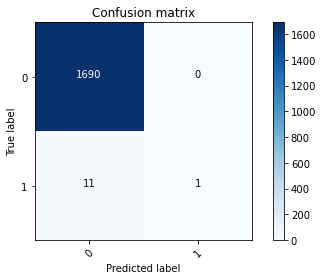

Tempo gasto fold 8 - 00:00:00
For fold 9:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Sigmoid SVM UnderSample  0.992949        0.0     0.0       0.0     0.0  0.0   

                          TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

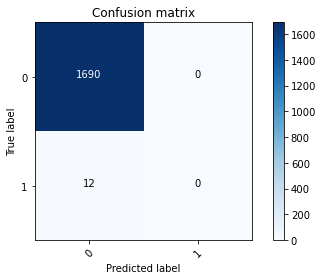

Tempo gasto fold 9 - 00:00:00
For fold 10:
Sigmoid SVM UnderSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM UnderSample  0.993537   0.666667  0.166667  0.266667  0.196078   

                              MCC   TP      TN  ROC Curve  
Sigmoid SVM UnderSample  0.331269  2.0  1689.0   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


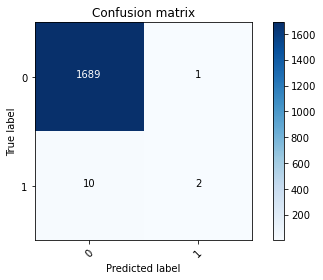

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16865    38]
 [   73    44]]


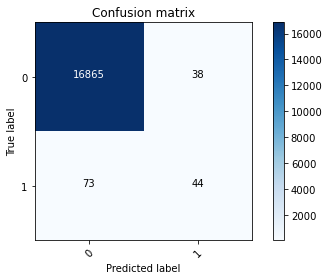

In [82]:
results_metrics, results_cv, bestModel = cv(X, y, s_svm, 'Sigmoid SVM UnderSample', rus)

all_results = all_results.append(results_metrics)

**Over sample**

For fold 1:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.19      0.55      0.29        11

    accuracy                           0.98      1702
   macro avg       0.60      0.77      0.64      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM OverSample  0.982374   0.193548  0.545455  0.285714     0.4   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.317998  6.0  1666.0   0.765335  
Confusion matrix, without normalization
[[1666   25]
 [   5    6]]


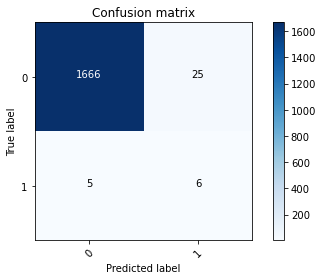

best fold 1
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.19      0.55      0.29        11

    accuracy                           0.98      1702
   macro avg       0.60      0.77      0.64      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM OverSample  0.982374   0.193548  0.545455  0.285714     0.4   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.317998  6.0  1666.0   0.765335  
Confusion matrix, without normalization
[[1666   25]
 [   5    6]]


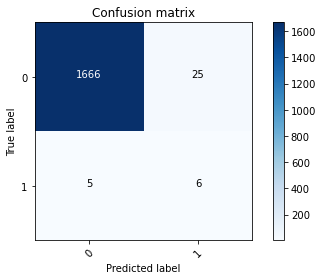

Tempo gasto fold 1 - 00:00:00
For fold 2:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.50      0.91      0.65        11

    accuracy                           0.99      1702
   macro avg       0.75      0.95      0.82      1702
weighted avg       1.00      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score   F-beta  \
Sigmoid SVM OverSample  0.993537        0.5  0.909091  0.645161  0.78125   

                             MCC    TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.671604  10.0  1681.0   0.951589  
Confusion matrix, without normalization
[[1681   10]
 [   1   10]]


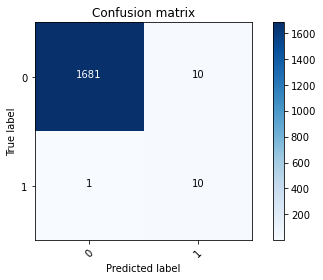

best fold 2
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.50      0.91      0.65        11

    accuracy                           0.99      1702
   macro avg       0.75      0.95      0.82      1702
weighted avg       1.00      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score   F-beta  \
Sigmoid SVM OverSample  0.993537        0.5  0.909091  0.645161  0.78125   

                             MCC    TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.671604  10.0  1681.0   0.951589  
Confusion matrix, without normalization
[[1681   10]
 [   1   10]]


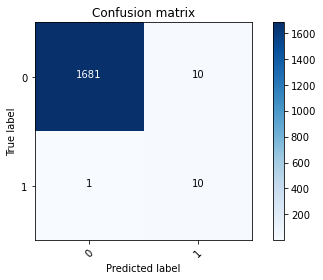

Tempo gasto fold 2 - 00:00:00
For fold 3:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.57      0.36      0.44        11

    accuracy                           0.99      1702
   macro avg       0.78      0.68      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM OverSample  0.994125   0.571429  0.363636  0.444444  0.392157   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.453083  4.0  1688.0   0.680931  
Confusion matrix, without normalization
[[1688    3]
 [   7    4]]


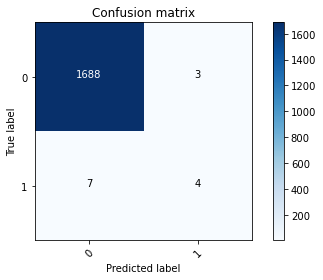

Tempo gasto fold 3 - 00:00:00
For fold 4:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.78      0.58      0.67        12

    accuracy                           1.00      1702
   macro avg       0.89      0.79      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM OverSample  0.995887   0.777778  0.583333  0.666667  0.614035   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.671613  7.0  1688.0   0.791075  
Confusion matrix, without normalization
[[1688    2]
 [   5    7]]


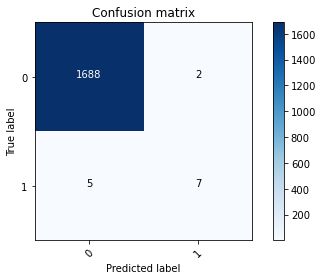

Tempo gasto fold 4 - 00:00:00
For fold 5:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM OverSample  0.996475      0.875  0.583333       0.7   0.625   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.712867  7.0  1689.0   0.791371  
Confusion matrix, without normalization
[[1689    1]
 [   5    7]]


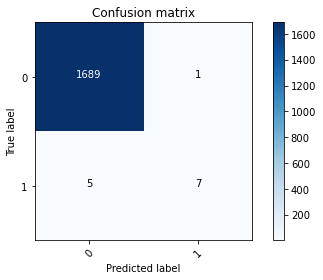

Tempo gasto fold 5 - 00:00:00
For fold 6:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.42      0.59        12

    accuracy                           1.00      1702
   macro avg       1.00      0.71      0.79      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM OverSample  0.995887        1.0  0.416667  0.588235  0.471698   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.644165  5.0  1690.0   0.708333  
Confusion matrix, without normalization
[[1690    0]
 [   7    5]]


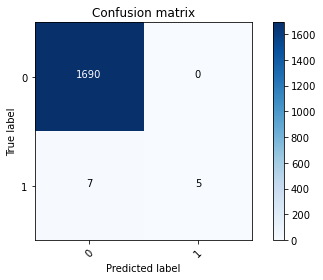

Tempo gasto fold 6 - 00:00:00
For fold 7:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Sigmoid SVM OverSample  0.994125        1.0  0.166667  0.285714     0.2   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


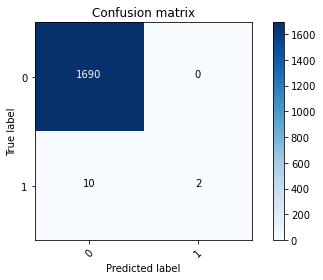

Tempo gasto fold 7 - 00:00:00
For fold 8:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM OverSample  0.993537        1.0  0.083333  0.153846  0.102041   

                            MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


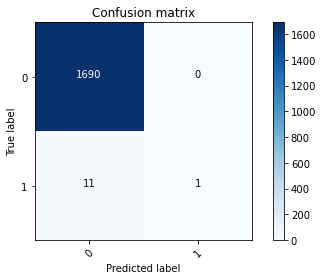

Tempo gasto fold 8 - 00:00:00
For fold 9:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Sigmoid SVM OverSample  0.992949        0.0     0.0       0.0     0.0  0.0   

                         TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

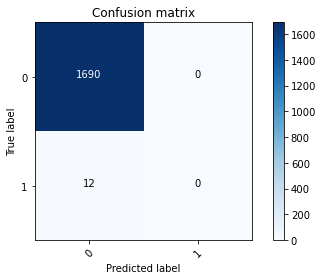

Tempo gasto fold 9 - 00:00:00
For fold 10:
Sigmoid SVM OverSample

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM OverSample  0.993537   0.666667  0.166667  0.266667  0.196078   

                             MCC   TP      TN  ROC Curve  
Sigmoid SVM OverSample  0.331269  2.0  1689.0   0.583037  
Confusion matrix, without normalization
[[1689    1]
 [  10    2]]


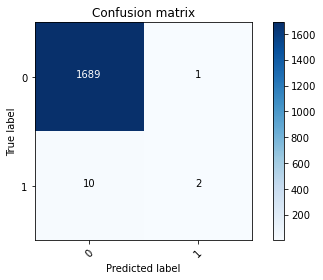

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16861    42]
 [   73    44]]


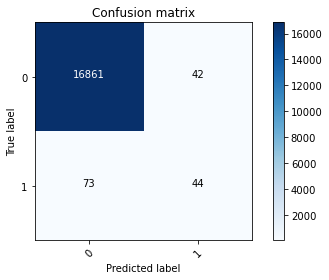

In [83]:
results_metrics, results_cv, bestModel = cv(X, y, s_svm, 'Sigmoid SVM OverSample', ros)

all_results = all_results.append(results_metrics)

**SMOTE**

For fold 1:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      1691
           1       0.02      0.91      0.04        11

    accuracy                           0.71      1702
   macro avg       0.51      0.81      0.43      1702
weighted avg       0.99      0.71      0.82      1702

                    Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Sigmoid SVM Smote  0.706816   0.019685  0.909091  0.038536  0.09058  0.107627   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  10.0  1193.0   0.807295  
Confusion matrix, without normalization
[[1193  498]
 [   1   10]]


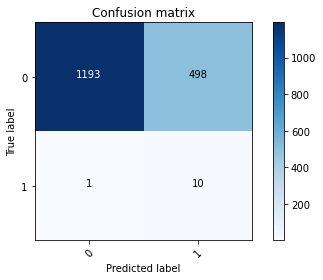

best fold 1
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      1691
           1       0.02      0.91      0.04        11

    accuracy                           0.71      1702
   macro avg       0.51      0.81      0.43      1702
weighted avg       0.99      0.71      0.82      1702

                    Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Sigmoid SVM Smote  0.706816   0.019685  0.909091  0.038536  0.09058  0.107627   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  10.0  1193.0   0.807295  
Confusion matrix, without normalization
[[1193  498]
 [   1   10]]


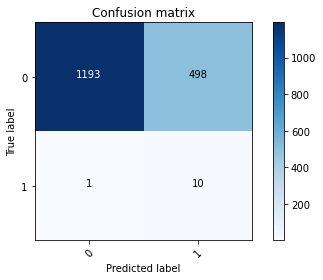

Tempo gasto fold 1 - 00:00:15
For fold 2:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1691
           1       0.03      0.73      0.05        11

    accuracy                           0.81      1702
   macro avg       0.51      0.77      0.47      1702
weighted avg       0.99      0.81      0.89      1702

                    Acuracy  Precision    Recall  F1-score   F-beta       MCC  \
Sigmoid SVM Smote  0.814924      0.025  0.727273  0.048338  0.10989  0.111315   

                    TP      TN  ROC Curve  
Sigmoid SVM Smote  8.0  1379.0   0.771383  
Confusion matrix, without normalization
[[1379  312]
 [   3    8]]


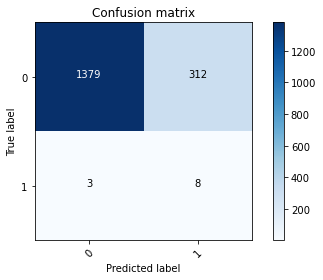

Tempo gasto fold 2 - 00:00:14
For fold 3:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.96      1691
           1       0.06      0.91      0.12        11

    accuracy                           0.91      1702
   macro avg       0.53      0.91      0.54      1702
weighted avg       0.99      0.91      0.95      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM Smote  0.914806   0.064935  0.909091  0.121212  0.252525   

                        MCC    TP      TN  ROC Curve  
Sigmoid SVM Smote  0.230152  10.0  1547.0   0.911967  
Confusion matrix, without normalization
[[1547  144]
 [   1   10]]


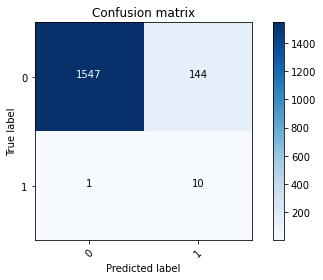

best fold 3
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.96      1691
           1       0.06      0.91      0.12        11

    accuracy                           0.91      1702
   macro avg       0.53      0.91      0.54      1702
weighted avg       0.99      0.91      0.95      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM Smote  0.914806   0.064935  0.909091  0.121212  0.252525   

                        MCC    TP      TN  ROC Curve  
Sigmoid SVM Smote  0.230152  10.0  1547.0   0.911967  
Confusion matrix, without normalization
[[1547  144]
 [   1   10]]


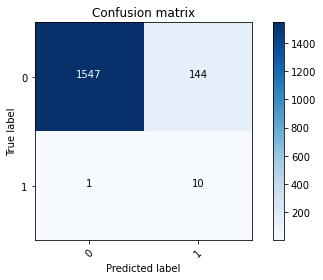

Tempo gasto fold 3 - 00:00:13
For fold 4:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1690
           1       0.08      1.00      0.14        12

    accuracy                           0.91      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.91      0.95      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.914219   0.075949     1.0  0.141176  0.291262  0.263416   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  12.0  1544.0   0.956805  
Confusion matrix, without normalization
[[1544  146]
 [   0   12]]


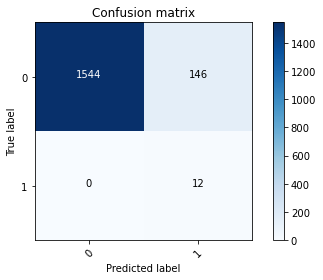

best fold 4
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1690
           1       0.08      1.00      0.14        12

    accuracy                           0.91      1702
   macro avg       0.54      0.96      0.55      1702
weighted avg       0.99      0.91      0.95      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.914219   0.075949     1.0  0.141176  0.291262  0.263416   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  12.0  1544.0   0.956805  
Confusion matrix, without normalization
[[1544  146]
 [   0   12]]


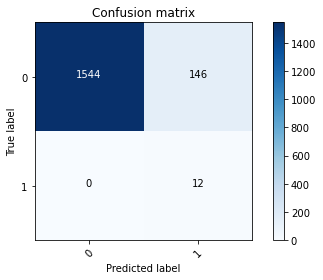

Tempo gasto fold 4 - 00:00:17
For fold 5:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.932432   0.094488     1.0  0.172662  0.342857  0.296747   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  12.0  1575.0   0.965976  
Confusion matrix, without normalization
[[1575  115]
 [   0   12]]


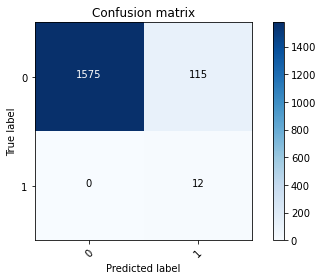

best fold 5
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1690
           1       0.09      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.932432   0.094488     1.0  0.172662  0.342857  0.296747   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  12.0  1575.0   0.965976  
Confusion matrix, without normalization
[[1575  115]
 [   0   12]]


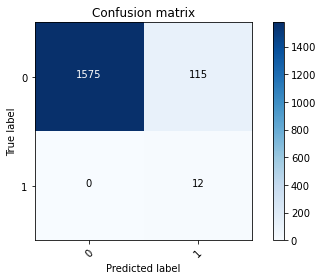

Tempo gasto fold 5 - 00:00:19
For fold 6:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM Smote  0.958284   0.135802  0.916667  0.236559  0.426357   

                        MCC    TP      TN  ROC Curve  
Sigmoid SVM Smote  0.343978  11.0  1620.0   0.937623  
Confusion matrix, without normalization
[[1620   70]
 [   1   11]]


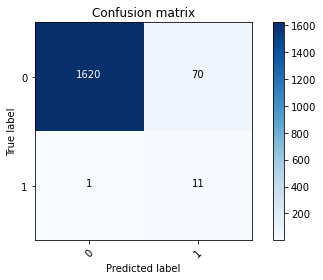

Tempo gasto fold 6 - 00:00:16
For fold 7:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      0.92      0.37        12

    accuracy                           0.98      1702
   macro avg       0.61      0.95      0.68      1702
weighted avg       0.99      0.98      0.98      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM Smote  0.977673   0.229167  0.916667  0.366667  0.572917   

                        MCC    TP      TN  ROC Curve  
Sigmoid SVM Smote  0.452229  11.0  1653.0   0.947387  
Confusion matrix, without normalization
[[1653   37]
 [   1   11]]


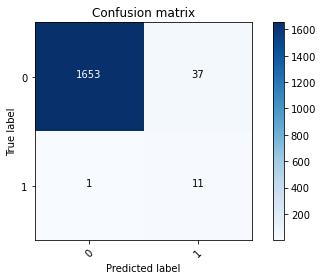

Tempo gasto fold 7 - 00:00:13
For fold 8:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.16      0.83      0.27        12

    accuracy                           0.97      1702
   macro avg       0.58      0.90      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                   Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.96886   0.163934  0.833333  0.273973  0.458716  0.361505   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  10.0  1639.0   0.901578  
Confusion matrix, without normalization
[[1639   51]
 [   2   10]]


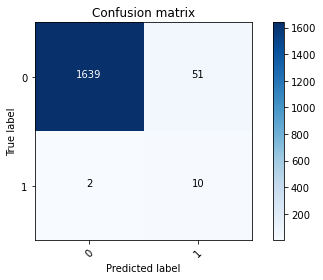

Tempo gasto fold 8 - 00:00:13
For fold 9:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.19      0.92      0.31        12

    accuracy                           0.97      1702
   macro avg       0.59      0.94      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                   Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Sigmoid SVM Smote  0.97121   0.186441  0.916667  0.309859  0.514019  0.406286   

                     TP      TN  ROC Curve  
Sigmoid SVM Smote  11.0  1642.0   0.944132  
Confusion matrix, without normalization
[[1642   48]
 [   1   11]]


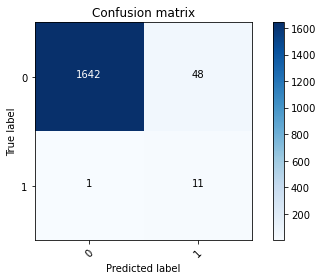

Tempo gasto fold 9 - 00:00:15
For fold 10:
Sigmoid SVM Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.83      0.40        12

    accuracy                           0.98      1702
   macro avg       0.63      0.91      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Sigmoid SVM Smote  0.982374   0.263158  0.833333       0.4  0.581395   

                        MCC    TP      TN  ROC Curve  
Sigmoid SVM Smote  0.462554  10.0  1662.0   0.908383  
Confusion matrix, without normalization
[[1662   28]
 [   2   10]]


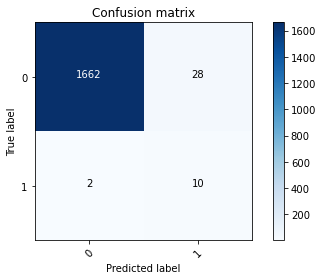

Tempo gasto fold 10 - 00:00:13

Confusion matrix, without normalization
[[15454  1449]
 [   12   105]]


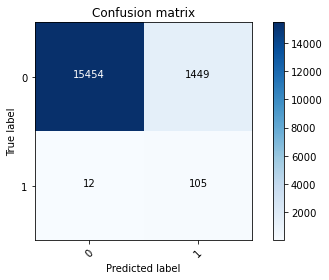

In [84]:
results_metrics, results_cv, bestModel = cv(X, y, s_svm, 'Sigmoid SVM Smote', smt)

all_results = all_results.append(results_metrics)

### Voting Classifier

**HARD**

In [68]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimators, voting ='hard', n_jobs=-1)

**No Balance**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.50      0.55      0.52        11

    accuracy                           0.99      1702
   macro avg       0.75      0.77      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.993537        0.5  0.545455  0.521739  0.535714   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.518989  6.0  1685.0   0.770953  
Confusion matrix, without normalization
[[1685    6]
 [   5    6]]


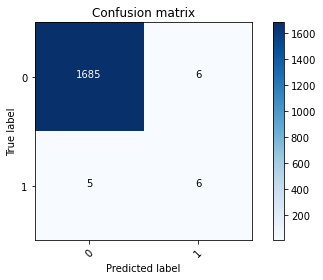

best fold 1
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.50      0.55      0.52        11

    accuracy                           0.99      1702
   macro avg       0.75      0.77      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.993537        0.5  0.545455  0.521739  0.535714   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.518989  6.0  1685.0   0.770953  
Confusion matrix, without normalization
[[1685    6]
 [   5    6]]


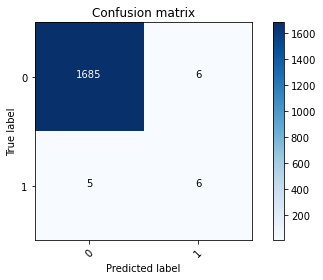

Tempo gasto fold 1 - 00:00:14


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.67      0.91      0.77        11

    accuracy                           1.00      1702
   macro avg       0.83      0.95      0.88      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.996475   0.666667  0.909091  0.769231  0.847458   

                             MCC    TP      TN  ROC Curve  
Voting Hard No Balance  0.776886  10.0  1686.0   0.953067  
Confusion matrix, without normalization
[[1686    5]
 [   1   10]]


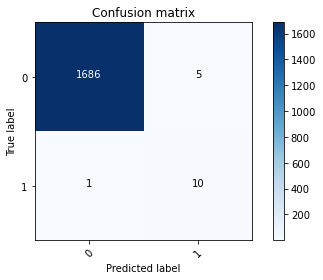

best fold 2
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.67      0.91      0.77        11

    accuracy                           1.00      1702
   macro avg       0.83      0.95      0.88      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.996475   0.666667  0.909091  0.769231  0.847458   

                             MCC    TP      TN  ROC Curve  
Voting Hard No Balance  0.776886  10.0  1686.0   0.953067  
Confusion matrix, without normalization
[[1686    5]
 [   1   10]]


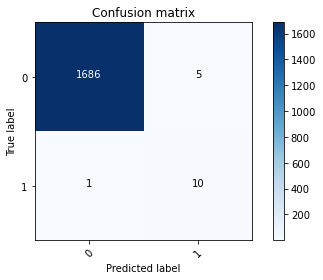

Tempo gasto fold 2 - 00:00:14


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.67      0.36      0.47        11

    accuracy                           0.99      1702
   macro avg       0.83      0.68      0.73      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Hard No Balance  0.994712   0.666667  0.363636  0.470588     0.4   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.490041  4.0  1689.0   0.681227  
Confusion matrix, without normalization
[[1689    2]
 [   7    4]]


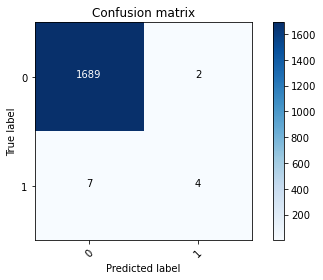

Tempo gasto fold 3 - 00:00:19


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


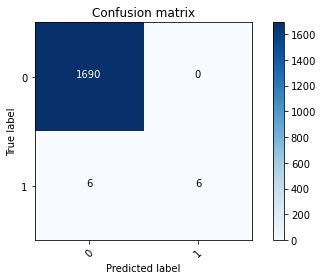

Tempo gasto fold 4 - 00:00:49


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.86      0.50      0.63        12

    accuracy                           1.00      1702
   macro avg       0.93      0.75      0.81      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard No Balance  0.995887   0.857143     0.5  0.631579  0.545455   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.652914  6.0  1689.0   0.749704  
Confusion matrix, without normalization
[[1689    1]
 [   6    6]]


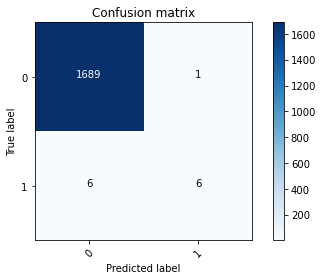

Tempo gasto fold 5 - 00:00:22


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.42      0.59        12

    accuracy                           1.00      1702
   macro avg       1.00      0.71      0.79      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.995887        1.0  0.416667  0.588235  0.471698   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.644165  5.0  1690.0   0.708333  
Confusion matrix, without normalization
[[1690    0]
 [   7    5]]


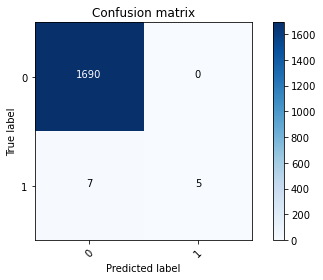

Tempo gasto fold 6 - 00:00:26


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                            MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


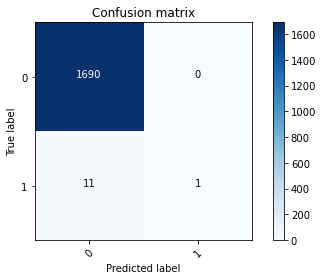

Tempo gasto fold 7 - 00:00:18


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                            MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


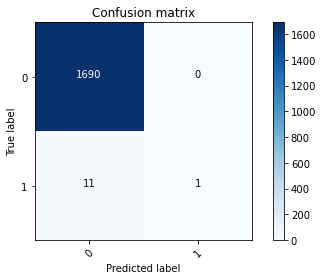

Tempo gasto fold 8 - 00:00:22


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Voting Hard No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                         TP      TN  ROC Curve  
Voting Hard No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

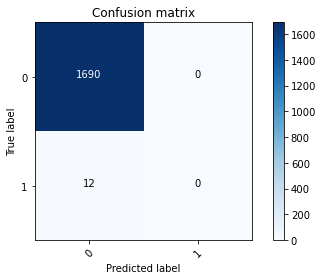

Tempo gasto fold 9 - 00:00:17


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Hard No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Hard No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                             MCC   TP      TN  ROC Curve  
Voting Hard No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


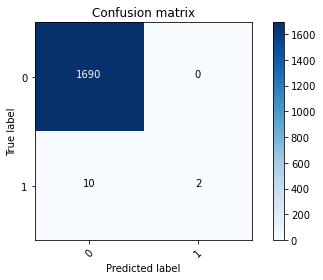

Tempo gasto fold 10 - 00:00:39

Confusion matrix, without normalization
[[16889    14]
 [   76    41]]


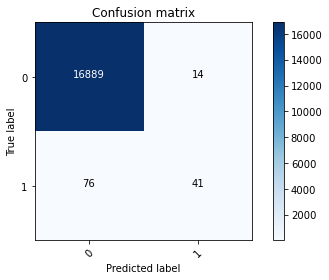

In [96]:
results_metrics, results_cv, bestModel = cv(X, y, vot_hard, 'Voting Hard No Balance')

all_results = all_results.append(results_metrics)

**UnderSample**

For fold 1:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.89      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.89      0.94      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.893067   0.056995     1.0  0.107843  0.232068   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.225523  11.0  1509.0   0.946186  
Confusion matrix, without normalization
[[1509  182]
 [   0   11]]


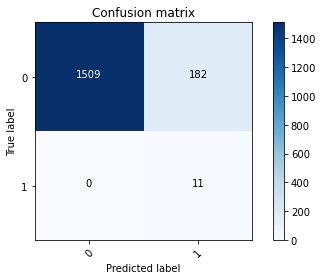

best fold 1
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.89      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.89      0.94      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.893067   0.056995     1.0  0.107843  0.232068   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.225523  11.0  1509.0   0.946186  
Confusion matrix, without normalization
[[1509  182]
 [   0   11]]


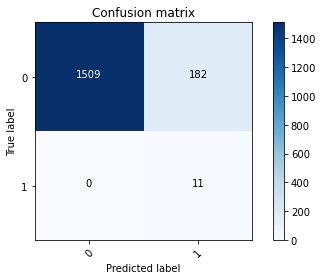

Tempo gasto fold 1 - 00:00:01


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.933608    0.08871     1.0  0.162963  0.327381   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.287718  11.0  1578.0   0.966588  
Confusion matrix, without normalization
[[1578  113]
 [   0   11]]


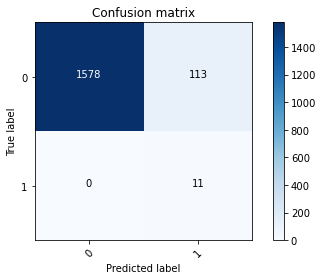

best fold 2
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.933608    0.08871     1.0  0.162963  0.327381   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.287718  11.0  1578.0   0.966588  
Confusion matrix, without normalization
[[1578  113]
 [   0   11]]


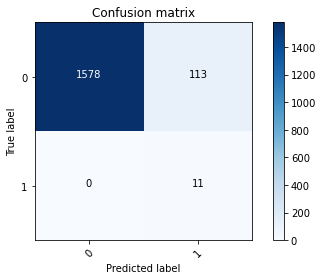

Tempo gasto fold 2 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.16        11

    accuracy                           0.94      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.94      0.96      1702

                          Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Hard UnderSample  0.937133   0.086207  0.909091   0.15748  0.3125   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.269133  10.0  1585.0   0.923203  
Confusion matrix, without normalization
[[1585  106]
 [   1   10]]


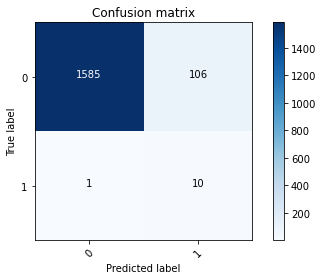

Tempo gasto fold 3 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.28        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.963572   0.162162     1.0   0.27907  0.491803   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.395238  12.0  1628.0   0.981657  
Confusion matrix, without normalization
[[1628   62]
 [   0   12]]


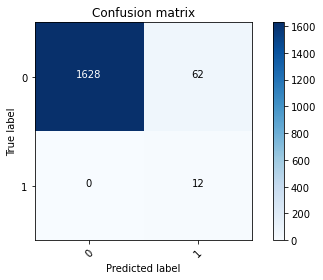

best fold 4
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.28        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.963572   0.162162     1.0   0.27907  0.491803   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.395238  12.0  1628.0   0.981657  
Confusion matrix, without normalization
[[1628   62]
 [   0   12]]


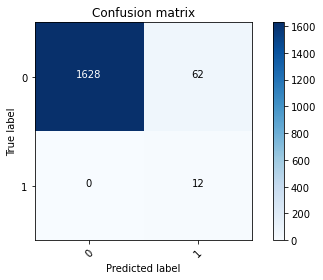

Tempo gasto fold 4 - 00:00:00
For fold 5:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.23        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.951821    0.12766     1.0  0.226415  0.422535   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.348519  12.0  1608.0    0.97574  
Confusion matrix, without normalization
[[1608   82]
 [   0   12]]


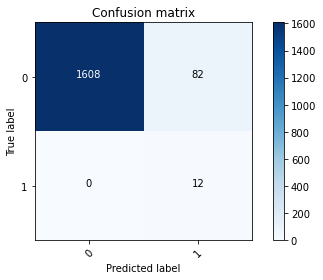

Tempo gasto fold 5 - 00:00:06


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      0.92      0.37        12

    accuracy                           0.98      1702
   macro avg       0.61      0.95      0.68      1702
weighted avg       0.99      0.98      0.98      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.977673   0.229167  0.916667  0.366667  0.572917   

                              MCC    TP      TN  ROC Curve  
Voting Hard UnderSample  0.452229  11.0  1653.0   0.947387  
Confusion matrix, without normalization
[[1653   37]
 [   1   11]]


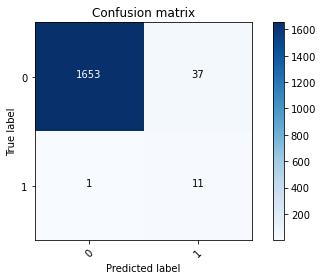

Tempo gasto fold 6 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.30      0.67      0.41        12

    accuracy                           0.99      1702
   macro avg       0.65      0.83      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.986486   0.296296  0.666667  0.410256  0.533333   

                              MCC   TP      TN  ROC Curve  
Voting Hard UnderSample  0.438902  8.0  1671.0   0.827712  
Confusion matrix, without normalization
[[1671   19]
 [   4    8]]


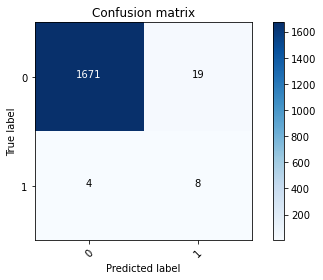

Tempo gasto fold 7 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.29      0.67      0.40        12

    accuracy                           0.99      1702
   macro avg       0.64      0.83      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.985899   0.285714  0.666667       0.4  0.526316   

                              MCC   TP      TN  ROC Curve  
Voting Hard UnderSample  0.430732  8.0  1670.0   0.827416  
Confusion matrix, without normalization
[[1670   20]
 [   4    8]]


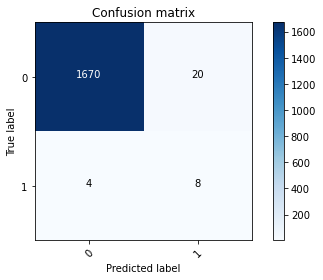

Tempo gasto fold 8 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.43      0.50      0.46        12

    accuracy                           0.99      1702
   macro avg       0.71      0.75      0.73      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.991774   0.428571     0.5  0.461538  0.483871   

                              MCC   TP      TN  ROC Curve  
Voting Hard UnderSample  0.458799  6.0  1682.0   0.747633  
Confusion matrix, without normalization
[[1682    8]
 [   6    6]]


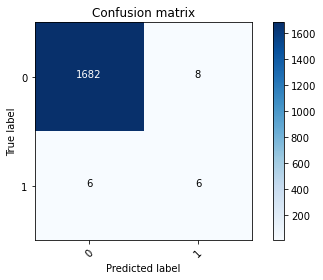

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Hard UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.41      0.75      0.53        12

    accuracy                           0.99      1702
   macro avg       0.70      0.87      0.76      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard UnderSample  0.990599   0.409091    0.75  0.529412  0.642857   

                             MCC   TP      TN  ROC Curve  
Voting Hard UnderSample  0.54986  9.0  1677.0   0.871154  
Confusion matrix, without normalization
[[1677   13]
 [   3    9]]


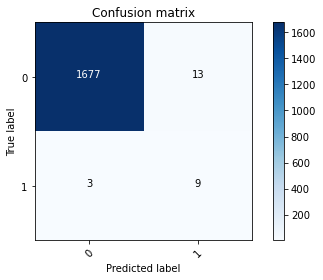

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16261   642]
 [   19    98]]


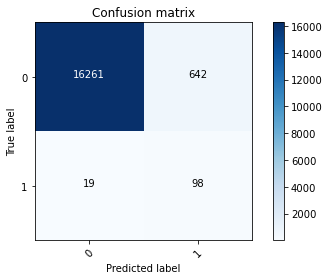

In [97]:
results_metrics, results_cv, bestModel = cv(X, y, vot_hard, 'Voting Hard UnderSample', rus)

all_results = all_results.append(results_metrics)

**OverSample**

For fold 1:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                        Acuracy  Precision  Recall  F1-score   F-beta  \
Voting Hard OverSample  0.89718    0.05914     1.0  0.111675  0.23913   

                            MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.23026  11.0  1516.0   0.948255  
Confusion matrix, without normalization
[[1516  175]
 [   0   11]]


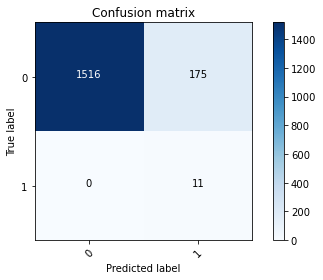

best fold 1
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                        Acuracy  Precision  Recall  F1-score   F-beta  \
Voting Hard OverSample  0.89718    0.05914     1.0  0.111675  0.23913   

                            MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.23026  11.0  1516.0   0.948255  
Confusion matrix, without normalization
[[1516  175]
 [   0   11]]


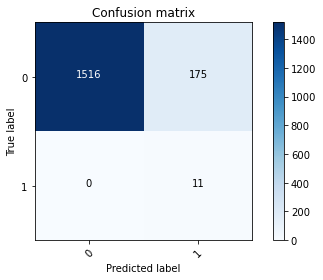

Tempo gasto fold 1 - 00:00:05


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      1.00      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  \
Voting Hard OverSample  0.928907   0.083333     1.0  0.153846  0.3125   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.278155  11.0  1570.0   0.964222  
Confusion matrix, without normalization
[[1570  121]
 [   0   11]]


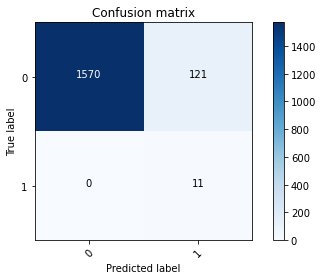

best fold 2
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      1.00      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.96      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  \
Voting Hard OverSample  0.928907   0.083333     1.0  0.153846  0.3125   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.278155  11.0  1570.0   0.964222  
Confusion matrix, without normalization
[[1570  121]
 [   0   11]]


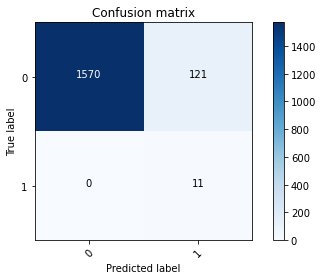

Tempo gasto fold 2 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1691
           1       0.11      0.91      0.20        11

    accuracy                           0.95      1702
   macro avg       0.56      0.93      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard OverSample  0.952409   0.111111  0.909091   0.19802  0.373134   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.308576  10.0  1611.0   0.930891  
Confusion matrix, without normalization
[[1611   80]
 [   1   10]]


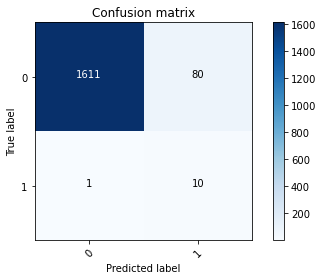

Tempo gasto fold 3 - 00:00:00
For fold 4:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.23        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard OverSample  0.952996   0.130435     1.0  0.230769  0.428571   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.352506  12.0  1610.0   0.976331  
Confusion matrix, without normalization
[[1610   80]
 [   0   12]]


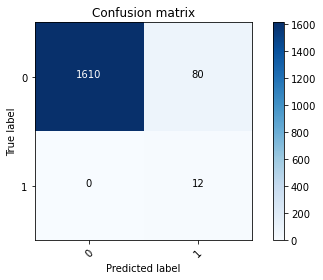

best fold 4
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1690
           1       0.13      1.00      0.23        12

    accuracy                           0.95      1702
   macro avg       0.57      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard OverSample  0.952996   0.130435     1.0  0.230769  0.428571   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.352506  12.0  1610.0   0.976331  
Confusion matrix, without normalization
[[1610   80]
 [   0   12]]


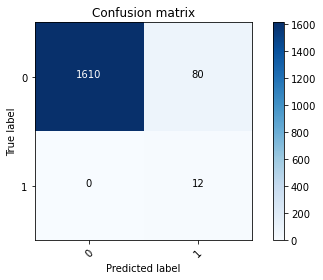

Tempo gasto fold 4 - 00:00:10


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      1.00      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.99      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard OverSample  0.97121   0.196721     1.0  0.328767  0.550459   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.437056  12.0  1641.0   0.985503  
Confusion matrix, without normalization
[[1641   49]
 [   0   12]]


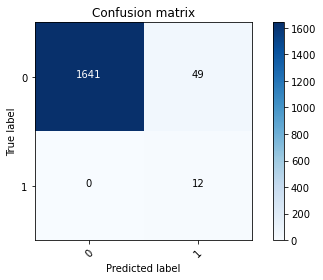

best fold 5
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      1.00      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.99      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard OverSample  0.97121   0.196721     1.0  0.328767  0.550459   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.437056  12.0  1641.0   0.985503  
Confusion matrix, without normalization
[[1641   49]
 [   0   12]]


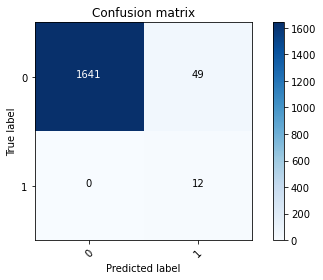

Tempo gasto fold 5 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      0.92      0.26        12

    accuracy                           0.96      1702
   macro avg       0.58      0.94      0.62      1702
weighted avg       0.99      0.96      0.98      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard OverSample  0.962985   0.150685  0.916667  0.258824  0.454545   

                           MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.3634  11.0  1628.0    0.93999  
Confusion matrix, without normalization
[[1628   62]
 [   1   11]]


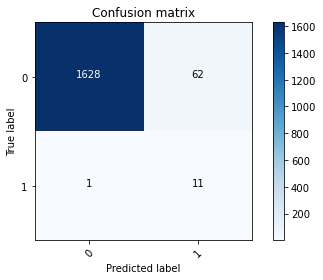

Tempo gasto fold 6 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      0.75      0.35        12

    accuracy                           0.98      1702
   macro avg       0.61      0.87      0.67      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Hard OverSample  0.980024      0.225    0.75  0.346154  0.511364   

                             MCC   TP      TN  ROC Curve  
Voting Hard OverSample  0.404107  9.0  1659.0   0.865828  
Confusion matrix, without normalization
[[1659   31]
 [   3    9]]


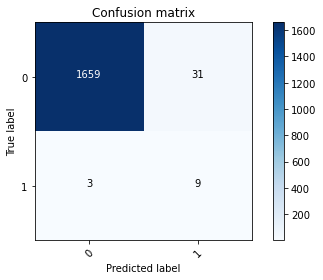

Tempo gasto fold 7 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.83      0.40        12

    accuracy                           0.98      1702
   macro avg       0.63      0.91      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard OverSample  0.982374   0.263158  0.833333       0.4  0.581395   

                             MCC    TP      TN  ROC Curve  
Voting Hard OverSample  0.462554  10.0  1662.0   0.908383  
Confusion matrix, without normalization
[[1662   28]
 [   2   10]]


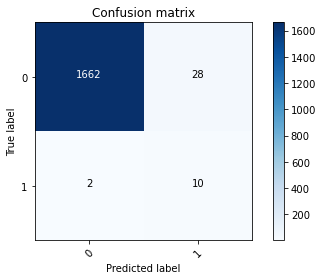

Tempo gasto fold 8 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.33      0.58      0.42        12

    accuracy                           0.99      1702
   macro avg       0.67      0.79      0.71      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard OverSample  0.988837   0.333333  0.583333  0.424242  0.507246   

                             MCC   TP      TN  ROC Curve  
Voting Hard OverSample  0.435859  7.0  1676.0   0.787525  
Confusion matrix, without normalization
[[1676   14]
 [   5    7]]


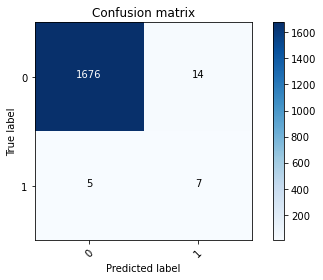

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Hard OverSample

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.62      0.67      0.64        12

    accuracy                           0.99      1702
   macro avg       0.81      0.83      0.82      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard OverSample  0.994712   0.615385  0.666667      0.64  0.655738   

                             MCC   TP      TN  ROC Curve  
Voting Hard OverSample  0.637859  8.0  1685.0   0.831854  
Confusion matrix, without normalization
[[1685    5]
 [   4    8]]


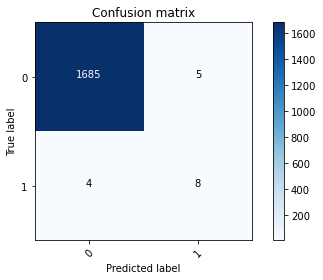

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16258   645]
 [   16   101]]


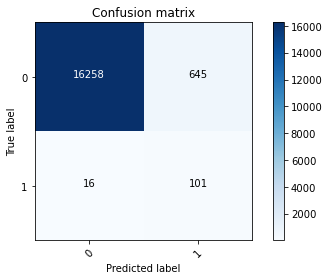

In [98]:
results_metrics, results_cv, bestModel = cv(X, y, vot_hard, 'Voting Hard OverSample', ros)

all_results = all_results.append(results_metrics)

**Smote**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.12        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                    Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Voting Hard Smote  0.901293   0.061453     1.0  0.115789  0.246637  0.23526   

                     TP      TN  ROC Curve  
Voting Hard Smote  11.0  1523.0   0.950325  
Confusion matrix, without normalization
[[1523  168]
 [   0   11]]


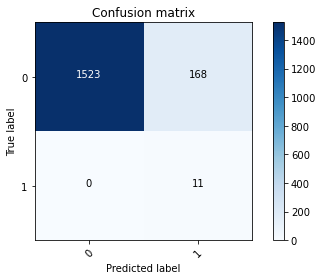

best fold 1
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.12        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                    Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Voting Hard Smote  0.901293   0.061453     1.0  0.115789  0.246637  0.23526   

                     TP      TN  ROC Curve  
Voting Hard Smote  11.0  1523.0   0.950325  
Confusion matrix, without normalization
[[1523  168]
 [   0   11]]


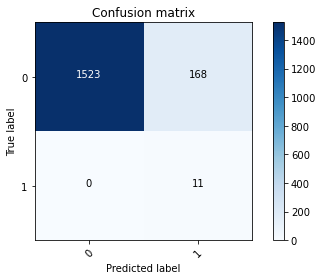

Tempo gasto fold 1 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.13      1.00      0.22        11

    accuracy                           0.96      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Hard Smote  0.955347   0.126437     1.0   0.22449  0.419847  0.347497   

                     TP      TN  ROC Curve  
Voting Hard Smote  11.0  1615.0   0.977528  
Confusion matrix, without normalization
[[1615   76]
 [   0   11]]


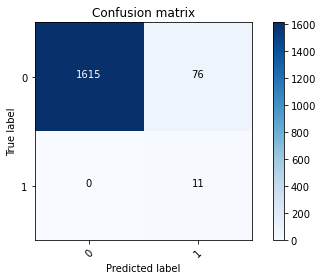

best fold 2
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.13      1.00      0.22        11

    accuracy                           0.96      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Hard Smote  0.955347   0.126437     1.0   0.22449  0.419847  0.347497   

                     TP      TN  ROC Curve  
Voting Hard Smote  11.0  1615.0   0.977528  
Confusion matrix, without normalization
[[1615   76]
 [   0   11]]


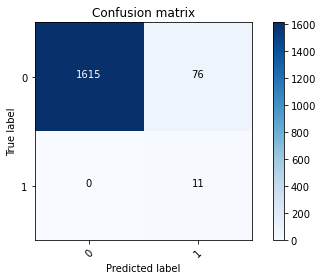

Tempo gasto fold 2 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1691
           1       0.10      0.91      0.19        11

    accuracy                           0.95      1702
   macro avg       0.55      0.93      0.58      1702
weighted avg       0.99      0.95      0.97      1702

                    Acuracy  Precision    Recall  F1-score   F-beta      MCC  \
Voting Hard Smote  0.948296   0.103093  0.909091  0.185185  0.35461  0.29645   

                     TP      TN  ROC Curve  
Voting Hard Smote  10.0  1604.0   0.928821  
Confusion matrix, without normalization
[[1604   87]
 [   1   10]]


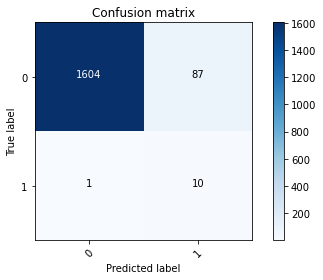

Tempo gasto fold 3 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      1.00      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.99      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                   Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Hard Smote  0.97121   0.196721     1.0  0.328767  0.550459  0.437056   

                     TP      TN  ROC Curve  
Voting Hard Smote  12.0  1641.0   0.985503  
Confusion matrix, without normalization
[[1641   49]
 [   0   12]]


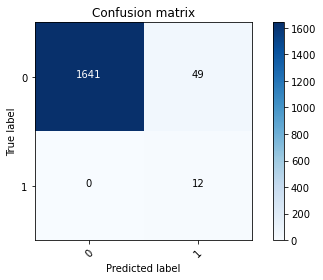

best fold 4
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.20      1.00      0.33        12

    accuracy                           0.97      1702
   macro avg       0.60      0.99      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                   Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Hard Smote  0.97121   0.196721     1.0  0.328767  0.550459  0.437056   

                     TP      TN  ROC Curve  
Voting Hard Smote  12.0  1641.0   0.985503  
Confusion matrix, without normalization
[[1641   49]
 [   0   12]]


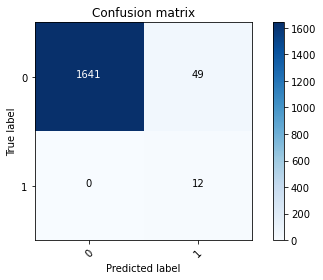

Tempo gasto fold 4 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.22      0.92      0.35        12

    accuracy                           0.98      1702
   macro avg       0.61      0.95      0.67      1702
weighted avg       0.99      0.98      0.98      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard Smote  0.976498       0.22  0.916667  0.354839  0.561224   

                        MCC    TP      TN  ROC Curve  
Voting Hard Smote  0.442774  11.0  1651.0   0.946795  
Confusion matrix, without normalization
[[1651   39]
 [   1   11]]


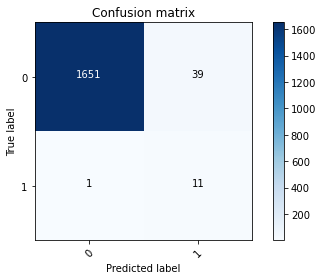

Tempo gasto fold 5 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.34      0.92      0.50        12

    accuracy                           0.99      1702
   macro avg       0.67      0.95      0.75      1702
weighted avg       0.99      0.99      0.99      1702

                    Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
Voting Hard Smote  0.987074    0.34375  0.916667       0.5  0.6875  0.557038   

                     TP      TN  ROC Curve  
Voting Hard Smote  11.0  1669.0    0.95212  
Confusion matrix, without normalization
[[1669   21]
 [   1   11]]


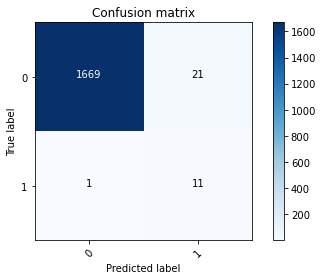

Tempo gasto fold 6 - 00:00:03


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.33      0.67      0.44        12

    accuracy                           0.99      1702
   macro avg       0.67      0.83      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard Smote  0.988249   0.333333  0.666667  0.444444  0.555556   

                        MCC   TP      TN  ROC Curve  
Voting Hard Smote  0.466369  8.0  1674.0     0.8286  
Confusion matrix, without normalization
[[1674   16]
 [   4    8]]


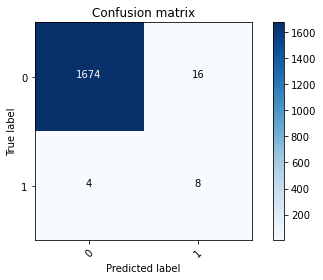

Tempo gasto fold 7 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.27      0.75      0.40        12

    accuracy                           0.98      1702
   macro avg       0.64      0.87      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Hard Smote  0.984136   0.272727    0.75       0.4  0.555556  0.446486   

                    TP      TN  ROC Curve  
Voting Hard Smote  9.0  1666.0   0.867899  
Confusion matrix, without normalization
[[1666   24]
 [   3    9]]


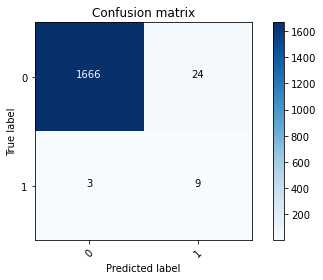

Tempo gasto fold 8 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      0.92      0.43        12

    accuracy                           0.98      1702
   macro avg       0.64      0.95      0.71      1702
weighted avg       0.99      0.98      0.99      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard Smote  0.982961   0.282051  0.916667  0.431373  0.632184   

                        MCC    TP      TN  ROC Curve  
Voting Hard Smote  0.503322  11.0  1662.0   0.950049  
Confusion matrix, without normalization
[[1662   28]
 [   1   11]]


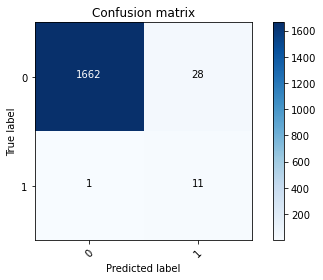

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Hard Smote

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.45      0.83      0.59        12

    accuracy                           0.99      1702
   macro avg       0.73      0.91      0.79      1702
weighted avg       0.99      0.99      0.99      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Hard Smote  0.991774   0.454545  0.833333  0.588235  0.714286   

                        MCC    TP      TN  ROC Curve  
Voting Hard Smote  0.612027  10.0  1678.0   0.913116  
Confusion matrix, without normalization
[[1678   12]
 [   2   10]]


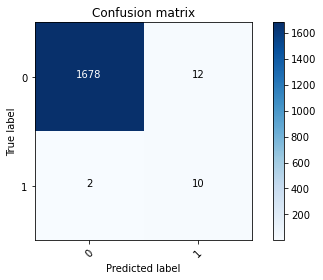

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16383   520]
 [   13   104]]


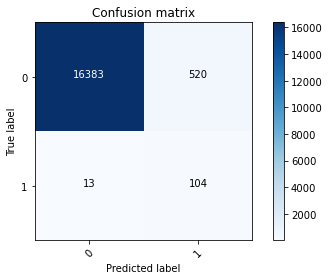

In [99]:
results_metrics, results_cv, bestModel = cv(X, y, vot_hard, 'Voting Hard Smote', ros)

all_results = all_results.append(results_metrics)

**SOFT**

In [73]:
# Voting Classifier with hard voting 
vot_soft = VotingClassifier(estimators = estimators, voting ='soft', n_jobs=-1)

**No Balance**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.44      0.36      0.40        11

    accuracy                           0.99      1702
   macro avg       0.72      0.68      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance  0.992949   0.444444  0.363636       0.4  0.377358   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.398511  4.0  1686.0    0.68034  
Confusion matrix, without normalization
[[1686    5]
 [   7    4]]


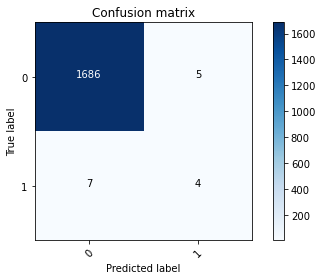

best fold 1
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.44      0.36      0.40        11

    accuracy                           0.99      1702
   macro avg       0.72      0.68      0.70      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance  0.992949   0.444444  0.363636       0.4  0.377358   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.398511  4.0  1686.0    0.68034  
Confusion matrix, without normalization
[[1686    5]
 [   7    4]]


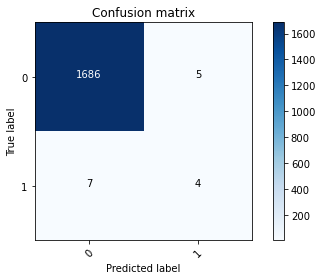

Tempo gasto fold 1 - 00:00:18


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.64      0.82      0.72        11

    accuracy                           1.00      1702
   macro avg       0.82      0.91      0.86      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance  0.995887   0.642857  0.818182      0.72  0.775862   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.723262  9.0  1686.0   0.907612  
Confusion matrix, without normalization
[[1686    5]
 [   2    9]]


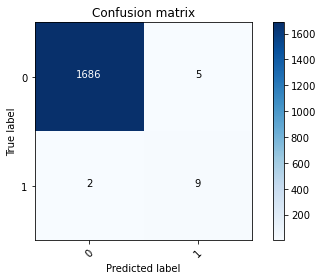

best fold 2
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.64      0.82      0.72        11

    accuracy                           1.00      1702
   macro avg       0.82      0.91      0.86      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance  0.995887   0.642857  0.818182      0.72  0.775862   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.723262  9.0  1686.0   0.907612  
Confusion matrix, without normalization
[[1686    5]
 [   2    9]]


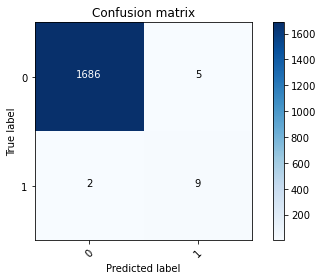

Tempo gasto fold 2 - 00:00:16


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       1.00      0.27      0.43        11

    accuracy                           1.00      1702
   macro avg       1.00      0.64      0.71      1702
weighted avg       1.00      1.00      0.99      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance   0.9953        1.0  0.272727  0.428571  0.319149   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.521002  3.0  1691.0   0.636364  
Confusion matrix, without normalization
[[1691    0]
 [   8    3]]


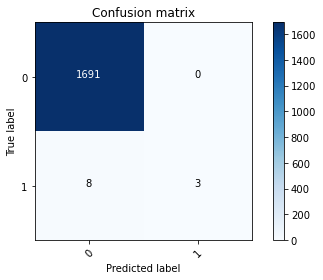

Tempo gasto fold 3 - 00:00:17


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


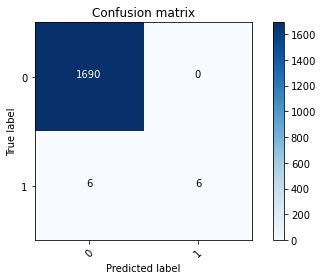

Tempo gasto fold 4 - 00:00:49


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.50      0.67        12

    accuracy                           1.00      1702
   macro avg       1.00      0.75      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft No Balance  0.996475        1.0     0.5  0.666667  0.555556   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.705855  6.0  1690.0       0.75  
Confusion matrix, without normalization
[[1690    0]
 [   6    6]]


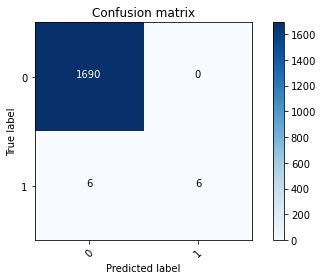

Tempo gasto fold 5 - 00:00:20


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      0.33      0.50        12

    accuracy                           1.00      1702
   macro avg       1.00      0.67      0.75      1702
weighted avg       1.00      1.00      0.99      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance   0.9953        1.0  0.333333       0.5  0.384615   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.575989  4.0  1690.0   0.666667  
Confusion matrix, without normalization
[[1690    0]
 [   8    4]]


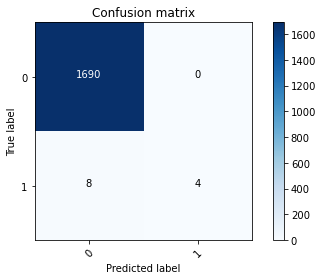

Tempo gasto fold 6 - 00:00:32


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Soft No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


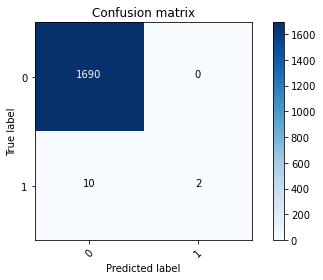

Tempo gasto fold 7 - 00:00:24


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft No Balance  0.993537        1.0  0.083333  0.153846  0.102041   

                            MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.28774  1.0  1690.0   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


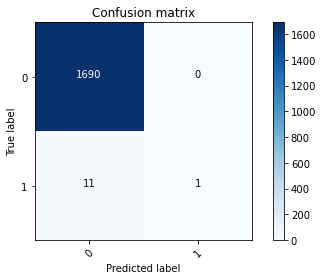

Tempo gasto fold 8 - 00:00:20


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  MCC  \
Voting Soft No Balance  0.992949        0.0     0.0       0.0     0.0  0.0   

                         TP      TN  ROC Curve  
Voting Soft No Balance  0.0  1690.0        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/

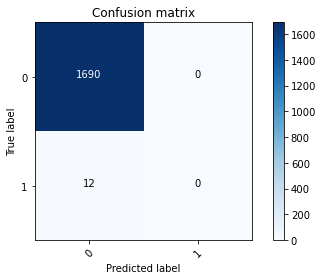

Tempo gasto fold 9 - 00:00:16


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Soft No Balance

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.17      0.29        12

    accuracy                           0.99      1702
   macro avg       1.00      0.58      0.64      1702
weighted avg       0.99      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Soft No Balance  0.994125        1.0  0.166667  0.285714     0.2   

                             MCC   TP      TN  ROC Curve  
Voting Soft No Balance  0.407046  2.0  1690.0   0.583333  
Confusion matrix, without normalization
[[1690    0]
 [  10    2]]


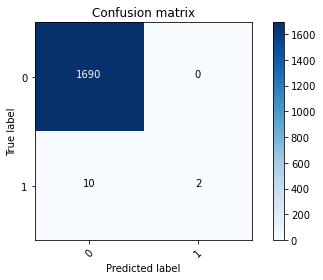

Tempo gasto fold 10 - 00:00:30

Confusion matrix, without normalization
[[16893    10]
 [   80    37]]


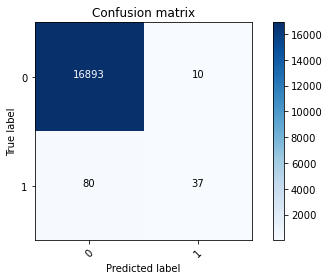

In [101]:
results_metrics, results_cv, bestModel = cv(X, y, vot_soft, 'Voting Soft No Balance')

all_results = all_results.append(results_metrics)

**UnderSample**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.87      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.87      0.92      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.865452   0.045833     1.0  0.087649  0.193662   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.199064  11.0  1462.0   0.932289  
Confusion matrix, without normalization
[[1462  229]
 [   0   11]]


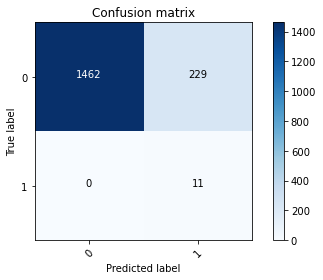

best fold 1
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.87      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.87      0.92      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.865452   0.045833     1.0  0.087649  0.193662   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.199064  11.0  1462.0   0.932289  
Confusion matrix, without normalization
[[1462  229]
 [   0   11]]


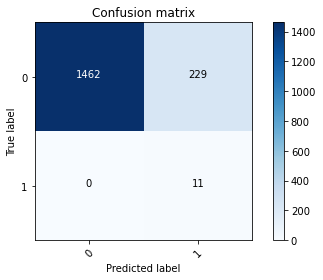

Tempo gasto fold 1 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.87      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.87      0.92      1702

                          Acuracy  Precision  Recall  F1-score   F-beta  \
Voting Soft UnderSample  0.867215   0.046414     1.0   0.08871  0.19573   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.200525  11.0  1465.0   0.933176  
Confusion matrix, without normalization
[[1465  226]
 [   0   11]]


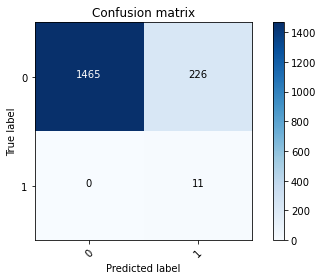

best fold 2
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.87      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.87      0.92      1702

                          Acuracy  Precision  Recall  F1-score   F-beta  \
Voting Soft UnderSample  0.867215   0.046414     1.0   0.08871  0.19573   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.200525  11.0  1465.0   0.933176  
Confusion matrix, without normalization
[[1465  226]
 [   0   11]]


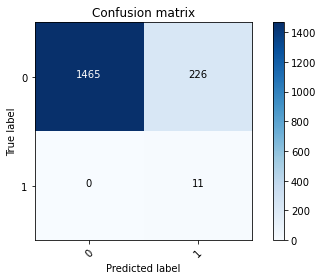

Tempo gasto fold 2 - 00:00:01
For fold 3:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.08      0.91      0.15        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.932432   0.080645  0.909091  0.148148  0.297619   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.259507  10.0  1577.0   0.920838  
Confusion matrix, without normalization
[[1577  114]
 [   1   10]]


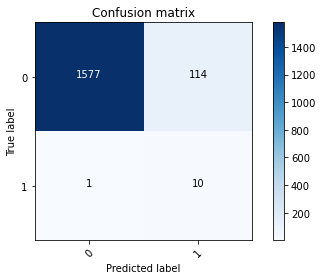

Tempo gasto fold 3 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.18      1.00      0.31        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.968273   0.181818     1.0  0.307692  0.526316   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.419534  12.0  1636.0   0.984024  
Confusion matrix, without normalization
[[1636   54]
 [   0   12]]


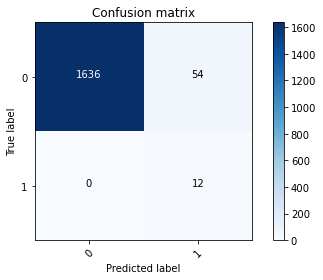

best fold 4
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.18      1.00      0.31        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.968273   0.181818     1.0  0.307692  0.526316   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.419534  12.0  1636.0   0.984024  
Confusion matrix, without normalization
[[1636   54]
 [   0   12]]


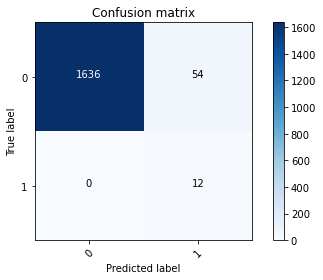

Tempo gasto fold 4 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.16      1.00      0.28        12

    accuracy                           0.96      1702
   macro avg       0.58      0.98      0.63      1702
weighted avg       0.99      0.96      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.962985       0.16     1.0  0.275862  0.487805   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.392474  12.0  1627.0   0.981361  
Confusion matrix, without normalization
[[1627   63]
 [   0   12]]


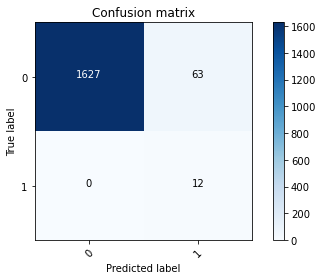

Tempo gasto fold 5 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.21      0.92      0.34        12

    accuracy                           0.97      1702
   macro avg       0.60      0.95      0.66      1702
weighted avg       0.99      0.97      0.98      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.974736   0.207547  0.916667  0.338462  0.544554   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.429596  11.0  1648.0   0.945907  
Confusion matrix, without normalization
[[1648   42]
 [   1   11]]


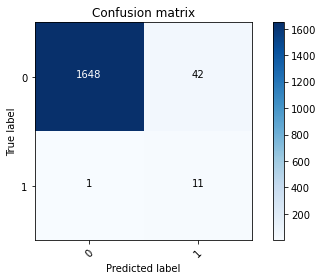

Tempo gasto fold 6 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.24      0.75      0.37        12

    accuracy                           0.98      1702
   macro avg       0.62      0.87      0.68      1702
weighted avg       0.99      0.98      0.99      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.981786   0.243243    0.75  0.367347  0.529412   

                             MCC   TP      TN  ROC Curve  
Voting Soft UnderSample  0.42081  9.0  1662.0   0.866716  
Confusion matrix, without normalization
[[1662   28]
 [   3    9]]


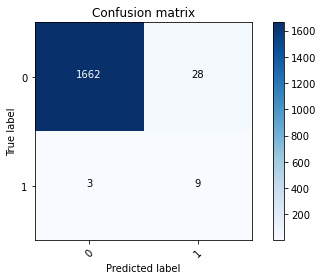

Tempo gasto fold 7 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.19      0.75      0.31        12

    accuracy                           0.98      1702
   macro avg       0.59      0.86      0.65      1702
weighted avg       0.99      0.98      0.98      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.975911   0.191489    0.75  0.305085  0.473684   

                              MCC   TP      TN  ROC Curve  
Voting Soft UnderSample  0.371474  9.0  1652.0   0.863757  
Confusion matrix, without normalization
[[1652   38]
 [   3    9]]


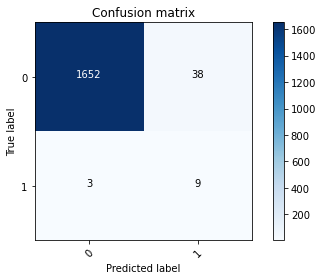

Tempo gasto fold 8 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.28      0.83      0.42        12

    accuracy                           0.98      1702
   macro avg       0.64      0.91      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                          Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.983549   0.277778  0.833333  0.416667  0.595238   

                              MCC    TP      TN  ROC Curve  
Voting Soft UnderSample  0.475632  10.0  1664.0   0.908974  
Confusion matrix, without normalization
[[1664   26]
 [   2   10]]


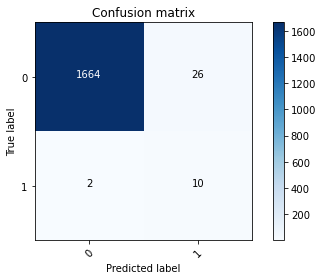

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.45      0.75      0.56        12

    accuracy                           0.99      1702
   macro avg       0.72      0.87      0.78      1702
weighted avg       0.99      0.99      0.99      1702

                          Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft UnderSample  0.991774       0.45    0.75    0.5625  0.661765   

                              MCC   TP      TN  ROC Curve  
Voting Soft UnderSample  0.577274  9.0  1679.0   0.871746  
Confusion matrix, without normalization
[[1679   11]
 [   3    9]]


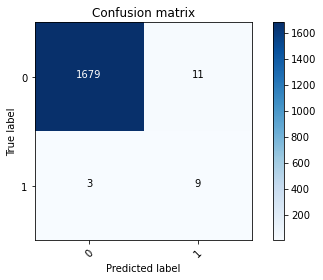

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16072   831]
 [   13   104]]


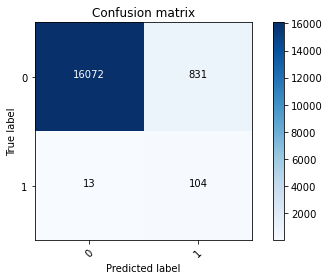

In [102]:
results_metrics, results_cv, bestModel = cv(X, y, vot_soft, 'Voting Soft UnderSample', rus)

all_results = all_results.append(results_metrics)

**OverSample**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.897767   0.059459     1.0  0.112245  0.240175   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.230957  11.0  1517.0   0.948551  
Confusion matrix, without normalization
[[1517  174]
 [   0   11]]


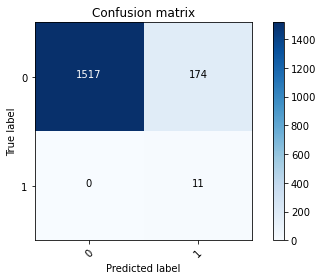

best fold 1
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.897767   0.059459     1.0  0.112245  0.240175   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.230957  11.0  1517.0   0.948551  
Confusion matrix, without normalization
[[1517  174]
 [   0   11]]


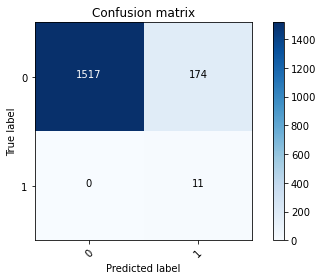

Tempo gasto fold 1 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.934195   0.089431     1.0  0.164179  0.329341   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.288977  11.0  1579.0   0.966884  
Confusion matrix, without normalization
[[1579  112]
 [   0   11]]


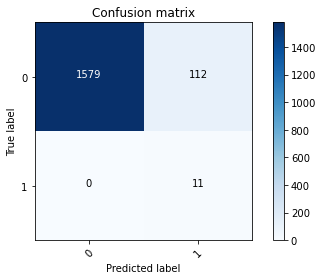

best fold 2
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.934195   0.089431     1.0  0.164179  0.329341   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.288977  11.0  1579.0   0.966884  
Confusion matrix, without normalization
[[1579  112]
 [   0   11]]


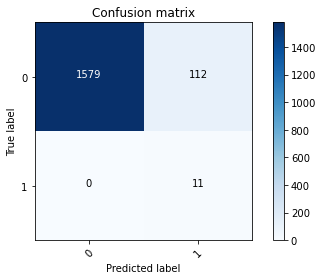

Tempo gasto fold 2 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1691
           1       0.12      0.91      0.22        11

    accuracy                           0.96      1702
   macro avg       0.56      0.93      0.60      1702
weighted avg       0.99      0.96      0.97      1702

                         Acuracy  Precision    Recall  F1-score  F-beta  \
Voting Soft OverSample  0.957697   0.123457  0.909091  0.217391     0.4   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.326366  10.0  1620.0   0.933552  
Confusion matrix, without normalization
[[1620   71]
 [   1   10]]


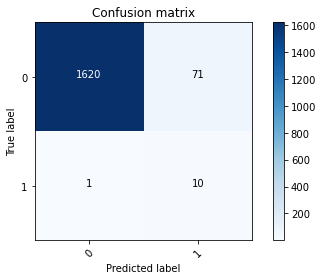

Tempo gasto fold 3 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.18        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.934195   0.096774     1.0  0.176471  0.348837   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.300601  12.0  1578.0   0.966864  
Confusion matrix, without normalization
[[1578  112]
 [   0   12]]


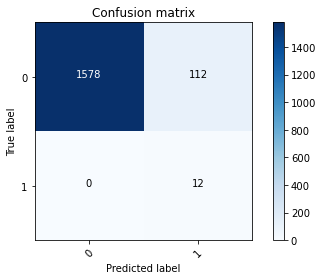

Tempo gasto fold 4 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 5:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.19      1.00      0.32        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.969448     0.1875     1.0  0.315789  0.535714   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.426299  12.0  1638.0   0.984615  
Confusion matrix, without normalization
[[1638   52]
 [   0   12]]


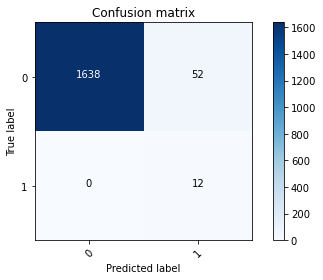

best fold 5
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.19      1.00      0.32        12

    accuracy                           0.97      1702
   macro avg       0.59      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                         Acuracy  Precision  Recall  F1-score    F-beta  \
Voting Soft OverSample  0.969448     0.1875     1.0  0.315789  0.535714   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.426299  12.0  1638.0   0.984615  
Confusion matrix, without normalization
[[1638   52]
 [   0   12]]


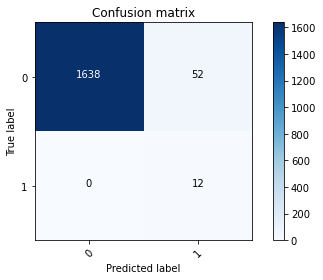

Tempo gasto fold 5 - 00:00:00
For fold 6:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      0.92      0.26        12

    accuracy                           0.96      1702
   macro avg       0.58      0.94      0.62      1702
weighted avg       0.99      0.96      0.98      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft OverSample  0.963572   0.152778  0.916667  0.261905  0.458333   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.366049  11.0  1629.0   0.940286  
Confusion matrix, without normalization
[[1629   61]
 [   1   11]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


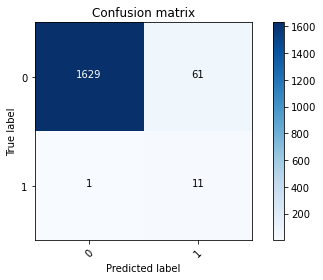

Tempo gasto fold 6 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.28      0.75      0.41        12

    accuracy                           0.98      1702
   macro avg       0.64      0.87      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision  Recall  F1-score  F-beta  \
Voting Soft OverSample  0.984724    0.28125    0.75  0.409091  0.5625   

                             MCC   TP      TN  ROC Curve  
Voting Soft OverSample  0.453637  9.0  1667.0   0.868195  
Confusion matrix, without normalization
[[1667   23]
 [   3    9]]


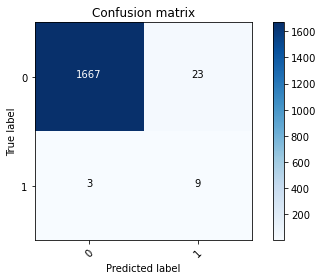

Tempo gasto fold 7 - 00:00:00
For fold 8:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.26      0.75      0.39        12

    accuracy                           0.98      1702
   macro avg       0.63      0.87      0.69      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision  Recall  F1-score   F-beta  \
Voting Soft OverSample  0.983549   0.264706    0.75  0.391304  0.54878   

                             MCC   TP      TN  ROC Curve  
Voting Soft OverSample  0.439649  9.0  1665.0   0.867604  
Confusion matrix, without normalization
[[1665   25]
 [   3    9]]


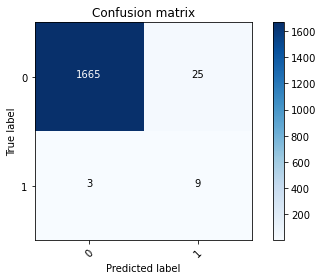

Tempo gasto fold 8 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.83      0.39        12

    accuracy                           0.98      1702
   macro avg       0.63      0.91      0.69      1702
weighted avg       0.99      0.98      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft OverSample  0.981786    0.25641  0.833333  0.392157  0.574713   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.456392  10.0  1661.0   0.908087  
Confusion matrix, without normalization
[[1661   29]
 [   2   10]]


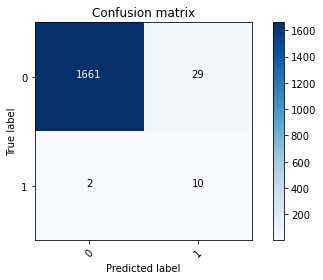

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1690
           1       0.53      0.83      0.65        12

    accuracy                           0.99      1702
   macro avg       0.76      0.91      0.82      1702
weighted avg       1.00      0.99      0.99      1702

                         Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft OverSample  0.993537   0.526316  0.833333  0.645161  0.746269   

                             MCC    TP      TN  ROC Curve  
Voting Soft OverSample  0.659401  10.0  1681.0   0.914004  
Confusion matrix, without normalization
[[1681    9]
 [   2   10]]


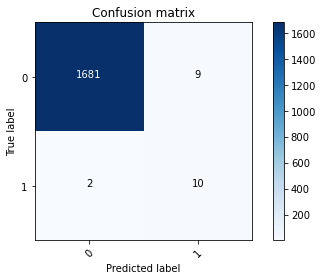

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16235   668]
 [   12   105]]


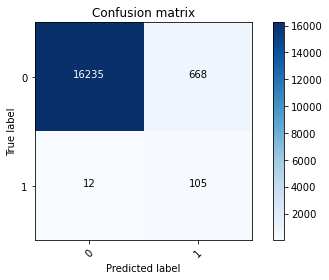

In [103]:
results_metrics, results_cv, bestModel = cv(X, y, vot_soft, 'Voting Soft OverSample', ros)

all_results = all_results.append(results_metrics)

**Smote**

/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 1:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                    Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Voting Soft Smote  0.896005   0.058511     1.0  0.110553  0.237069  0.22888   

                     TP      TN  ROC Curve  
Voting Soft Smote  11.0  1514.0   0.947664  
Confusion matrix, without normalization
[[1514  177]
 [   0   11]]


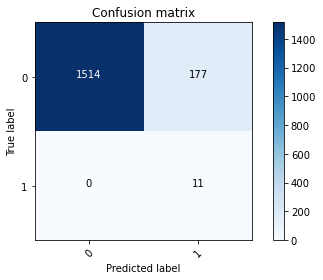

best fold 1
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1691
           1       0.06      1.00      0.11        11

    accuracy                           0.90      1702
   macro avg       0.53      0.95      0.53      1702
weighted avg       0.99      0.90      0.94      1702

                    Acuracy  Precision  Recall  F1-score    F-beta      MCC  \
Voting Soft Smote  0.896005   0.058511     1.0  0.110553  0.237069  0.22888   

                     TP      TN  ROC Curve  
Voting Soft Smote  11.0  1514.0   0.947664  
Confusion matrix, without normalization
[[1514  177]
 [   0   11]]


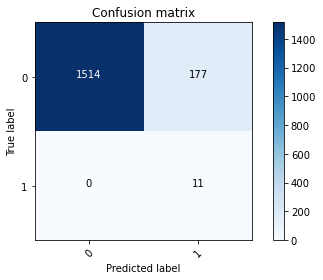

Tempo gasto fold 1 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 2:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.937133    0.09322     1.0  0.170543  0.339506  0.295502   

                     TP      TN  ROC Curve  
Voting Soft Smote  11.0  1584.0   0.968362  
Confusion matrix, without normalization
[[1584  107]
 [   0   11]]


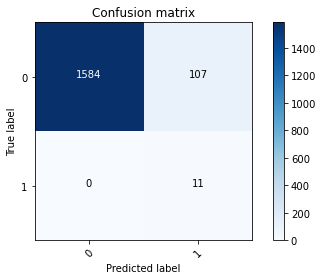

best fold 2
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.937133    0.09322     1.0  0.170543  0.339506  0.295502   

                     TP      TN  ROC Curve  
Voting Soft Smote  11.0  1584.0   0.968362  
Confusion matrix, without normalization
[[1584  107]
 [   0   11]]


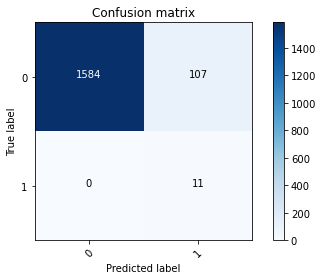

Tempo gasto fold 2 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 3:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.09      0.91      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.93      0.57      1702
weighted avg       0.99      0.94      0.97      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft Smote  0.942421   0.093458  0.909091  0.169492  0.331126   

                        MCC    TP      TN  ROC Curve  
Voting Soft Smote  0.281188  10.0  1594.0   0.925864  
Confusion matrix, without normalization
[[1594   97]
 [   1   10]]


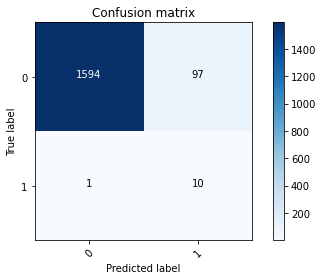

Tempo gasto fold 3 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 4:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.948884   0.121212     1.0  0.216216  0.408163  0.339076   

                     TP      TN  ROC Curve  
Voting Soft Smote  12.0  1603.0    0.97426  
Confusion matrix, without normalization
[[1603   87]
 [   0   12]]


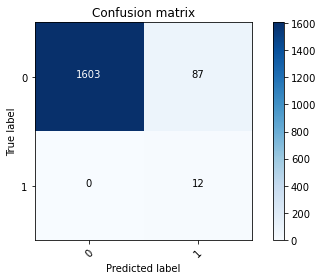

best fold 4
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.948884   0.121212     1.0  0.216216  0.408163  0.339076   

                     TP      TN  ROC Curve  
Voting Soft Smote  12.0  1603.0    0.97426  
Confusion matrix, without normalization
[[1603   87]
 [   0   12]]


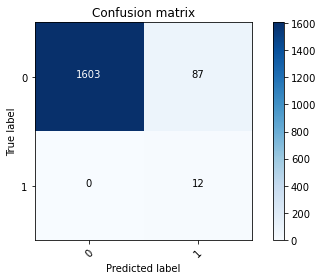

Tempo gasto fold 4 - 00:00:00
For fold 5:


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      1.00      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.955934   0.137931     1.0  0.242424  0.444444  0.363056   

                     TP      TN  ROC Curve  
Voting Soft Smote  12.0  1615.0   0.977811  
Confusion matrix, without normalization
[[1615   75]
 [   0   12]]


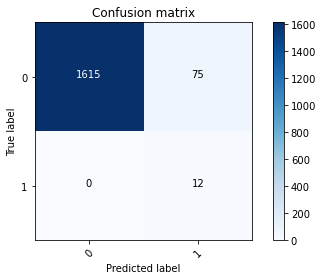

best fold 5
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      1.00      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.955934   0.137931     1.0  0.242424  0.444444  0.363056   

                     TP      TN  ROC Curve  
Voting Soft Smote  12.0  1615.0   0.977811  
Confusion matrix, without normalization
[[1615   75]
 [   0   12]]


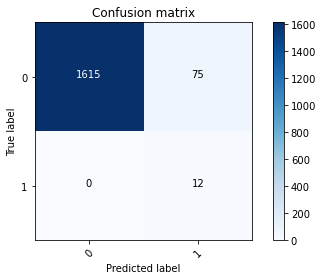

Tempo gasto fold 5 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 6:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.14      0.92      0.24        12

    accuracy                           0.96      1702
   macro avg       0.57      0.94      0.61      1702
weighted avg       0.99      0.96      0.97      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft Smote  0.960047   0.141026  0.916667  0.244444  0.436508   

                        MCC    TP      TN  ROC Curve  
Voting Soft Smote  0.350917  11.0  1623.0   0.938511  
Confusion matrix, without normalization
[[1623   67]
 [   1   11]]


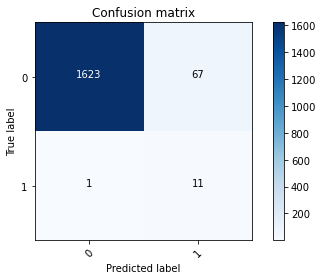

Tempo gasto fold 6 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 7:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.32      0.75      0.45        12

    accuracy                           0.99      1702
   macro avg       0.66      0.87      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                    Acuracy  Precision  Recall  F1-score    F-beta       MCC  \
Voting Soft Smote  0.987074   0.321429    0.75      0.45  0.592105  0.485936   

                    TP      TN  ROC Curve  
Voting Soft Smote  9.0  1671.0   0.869379  
Confusion matrix, without normalization
[[1671   19]
 [   3    9]]


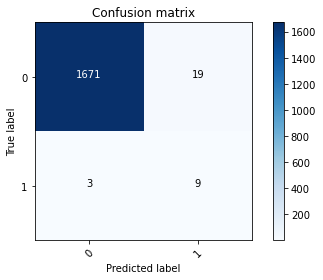

Tempo gasto fold 7 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 8:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.23      0.83      0.36        12

    accuracy                           0.98      1702
   macro avg       0.61      0.91      0.67      1702
weighted avg       0.99      0.98      0.98      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft Smote  0.978848   0.227273  0.833333  0.357143  0.543478   

                        MCC    TP      TN  ROC Curve  
Voting Soft Smote  0.428766  10.0  1656.0   0.906607  
Confusion matrix, without normalization
[[1656   34]
 [   2   10]]


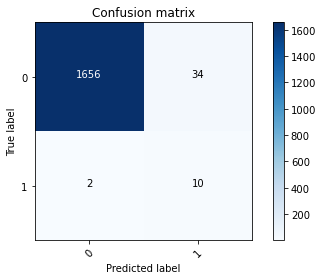

Tempo gasto fold 8 - 00:00:01


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 9:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.92      0.40        12

    accuracy                           0.98      1702
   macro avg       0.63      0.95      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                    Acuracy  Precision    Recall  F1-score    F-beta  \
Voting Soft Smote  0.980611   0.255814  0.916667       0.4  0.604396   

                        MCC    TP      TN  ROC Curve  
Voting Soft Smote  0.478656  11.0  1658.0   0.948866  
Confusion matrix, without normalization
[[1658   32]
 [   1   11]]


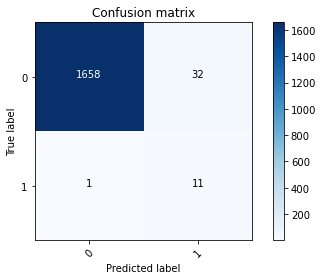

Tempo gasto fold 9 - 00:00:00


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For fold 10:
Voting Soft Smote

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.31      0.83      0.45        12

    accuracy                           0.99      1702
   macro avg       0.66      0.91      0.72      1702
weighted avg       0.99      0.99      0.99      1702

                    Acuracy  Precision    Recall  F1-score  F-beta       MCC  \
Voting Soft Smote  0.985899     0.3125  0.833333  0.454545   0.625  0.505338   

                     TP      TN  ROC Curve  
Voting Soft Smote  10.0  1668.0   0.910158  
Confusion matrix, without normalization
[[1668   22]
 [   2   10]]


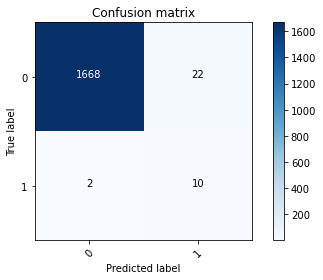

Tempo gasto fold 10 - 00:00:00

Confusion matrix, without normalization
[[16186   717]
 [   10   107]]


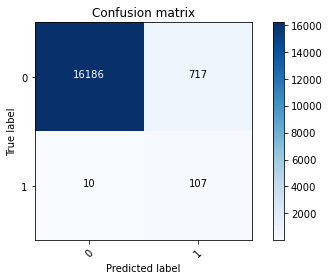

In [104]:
results_metrics, results_cv, bestModel = cv(X, y, vot_soft, 'Voting Soft Smote', ros)

all_results = all_results.append(results_metrics)

In [69]:
all_results

Acuracy  Precision    Recall  F1-score  \
KNN No Balance                   0.994066   0.629032  0.333333  0.435754   
KNN UnderSample                  0.929553   0.079316  0.871795  0.145403   
KNN OverSample                   0.927791   0.081955  0.931624  0.150657   
KNN Smote                        0.949530   0.106992  0.863248  0.190386   
Decision Tree No Balance         0.993948   0.594595  0.376068  0.460733   
Decision Tree UnderSample        0.936369   0.092749  0.940171  0.168841   
Decision Tree OverSample         0.937720   0.095973  0.957265  0.174455   
Decision Tree Smote              0.962573   0.136872  0.837607  0.235294   
Random Forest No Balance         0.994771   0.705882  0.410256  0.518919   
Random Forest UnderSample        0.943772   0.104520  0.948718  0.188295   
Random Forest OverSample         0.942832   0.104436  0.965812  0.188490   
Random Forest Smote              0.985488   0.271127  0.658120  0.384040   
Regressao Logistica No Balance   0.987838   0.255435  0.401709  0.312292   
Regressao Logistica UnderSample  0.903349   0.061424  0.914530  0.115116   
Regressao Logistica              0.742832   0.024341  0.931624  0.047443   
Regressao Logistica Smote        0.961810   0.132414  0.820513  0.228029   

                                   F-beta       MCC     TP       TN  ROC Curve  
KNN No Balance                   0.367925  0.455296   39.0  16880.0   0.665986  
KNN UnderSample                  0.290764  0.250653  102.0  15719.0   0.900874  
KNN OverSample                   0.303115  0.264562  109.0  15682.0   0.929694  
KNN Smote                        0.357649  0.293623  101.0  16060.0   0.906688  
Decision Tree No Balance         0.405904  0.470043   44.0  16873.0   0.687147  
Decision Tree UnderSample        0.332527  0.284443  110.0  15827.0   0.938257  
Decision Tree OverSample         0.342508  0.292573  112.0  15848.0   0.947425  
Decision Tree Smote              0.413851  0.329707   98.0  16285.0   0.900523  
Random Forest No Balance         0.447761  0.535810   48.0  16883.0   0.704537  
Random Forest UnderSample        0.362745  0.304867  111.0  15952.0   0.946228  
Random Forest OverSample         0.364516  0.307654  113.0  15934.0   0.954242  
Random Forest Smote              0.511968  0.416617   77.0  16696.0   0.822937  
Regressao Logistica No Balance   0.360429  0.314490   47.0  16766.0   0.696802  
Regressao Logistica UnderSample  0.242081  0.222928  107.0  15268.0   0.908901  
Regressao Logistica              0.110190  0.126317  109.0  12534.0   0.836575  
Regressao Logistica Smote        0.402347  0.320485   96.0  16274.0   0.891650

In [70]:
print(all_results.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &   Acuracy &  Precision &    Recall &  F1-score &    F-beta &       MCC &     TP &       TN &  ROC Curve \\
\midrule
KNN No Balance                  &  0.994066 &   0.629032 &  0.333333 &  0.435754 &  0.367925 &  0.455296 &   39.0 &  16880.0 &   0.665986 \\
KNN UnderSample                 &  0.929553 &   0.079316 &  0.871795 &  0.145403 &  0.290764 &  0.250653 &  102.0 &  15719.0 &   0.900874 \\
KNN OverSample                  &  0.927791 &   0.081955 &  0.931624 &  0.150657 &  0.303115 &  0.264562 &  109.0 &  15682.0 &   0.929694 \\
KNN Smote                       &  0.949530 &   0.106992 &  0.863248 &  0.190386 &  0.357649 &  0.293623 &  101.0 &  16060.0 &   0.906688 \\
Decision Tree No Balance        &  0.993948 &   0.594595 &  0.376068 &  0.460733 &  0.405904 &  0.470043 &   44.0 &  16873.0 &   0.687147 \\
Decision Tree UnderSample       &  0.936369 &   0.092749 &  0.940171 &  0.168841 &  0.332527 &  0.284443 &  110.0 &  15827.0 &   0.938257

## Grid Search for Soft Voting

In [71]:
def grid_search_plot_results(gs, params):
    cv_results = gs.cv_results_

    for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
        print(params, mean_score)

    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))


In [82]:
def curva_roc_func(y_true, y_pred):
    
        tp = y_true[(y_true==1) & (y_pred==1)].count()
        tn = y_true[(y_true==0) & (y_pred==0)].count()
        fp = y_true[(y_true==0) & (y_pred==1)].count()
        fn = y_true[(y_true==1) & (y_pred==0)].count() 
        
        auc = (tp/((tp+fn)*2)) + (tn/((tn+fp)*2))
        return auc

In [97]:
comb = itertools.product([0,0.5,1], repeat=7)

params = []
for i in list(comb): 
    params.append(list(i))
    
del params[0]
params = {'weights': params }


roc_score = make_scorer(curva_roc_func, greater_is_better=True)

gs = GridSearchCV(estimator=vot_soft, param_grid=params, scoring=roc_score, n_jobs=-1)

grid_results = metrics_structure()

In [96]:
results_metrics, results_cv, bestModel = cv(X, y, gs, 'Grid Soft No Balance', params=params)
grid_results = grid_results.append(results_metrics)

KeyboardInterrupt: 

In [ ]:
grid_results

For fold 1:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.86      0.92      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.863102   0.045082     1.0  0.086275  0.190972   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.197155  11.0  1458.0   0.931106  
Confusion matrix, without normalization
[[1458  233]
 [   0   11]]


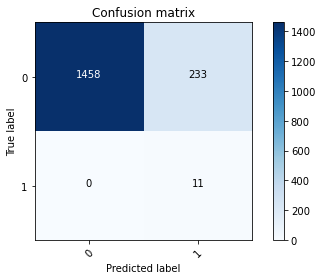

best fold 1
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      1691
           1       0.05      1.00      0.09        11

    accuracy                           0.86      1702
   macro avg       0.52      0.93      0.51      1702
weighted avg       0.99      0.86      0.92      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.863102   0.045082     1.0  0.086275  0.190972   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.197155  11.0  1458.0   0.931106  
Confusion matrix, without normalization
[[1458  233]
 [   0   11]]


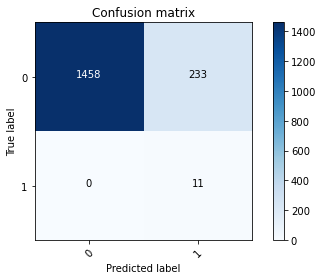

Tempo gasto fold 1 - 00:11:59
For fold 2:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.10      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.938895   0.095652     1.0  0.174603  0.345912   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.299615  11.0  1587.0   0.969249  
Confusion matrix, without normalization
[[1587  104]
 [   0   11]]


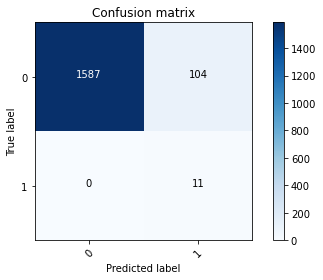

best fold 2
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1691
           1       0.10      1.00      0.17        11

    accuracy                           0.94      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.94      0.96      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.938895   0.095652     1.0  0.174603  0.345912   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.299615  11.0  1587.0   0.969249  
Confusion matrix, without normalization
[[1587  104]
 [   0   11]]


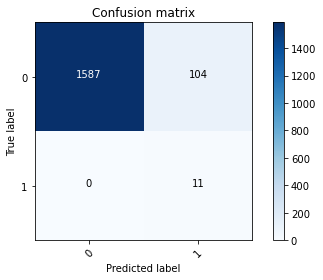

Tempo gasto fold 2 - 00:45:49
For fold 3:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.07      0.91      0.14        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.93      0.96      1702

                        Acuracy  Precision    Recall  F1-score   F-beta  \
Grid Soft UnderSample  0.925969   0.074074  0.909091  0.136986  0.27933   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.247652  10.0  1566.0   0.917585  
Confusion matrix, without normalization
[[1566  125]
 [   1   10]]


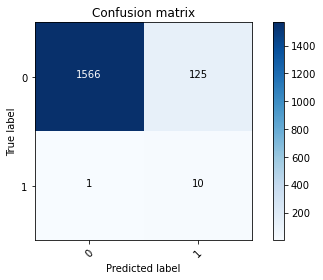

Tempo gasto fold 3 - 01:03:25
For fold 4:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.948296       0.12     1.0  0.214286  0.405405   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.337271  12.0  1602.0   0.973964  
Confusion matrix, without normalization
[[1602   88]
 [   0   12]]


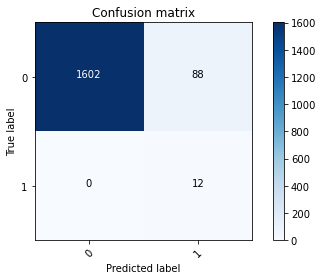

best fold 4
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.21        12

    accuracy                           0.95      1702
   macro avg       0.56      0.97      0.59      1702
weighted avg       0.99      0.95      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.948296       0.12     1.0  0.214286  0.405405   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.337271  12.0  1602.0   0.973964  
Confusion matrix, without normalization
[[1602   88]
 [   0   12]]


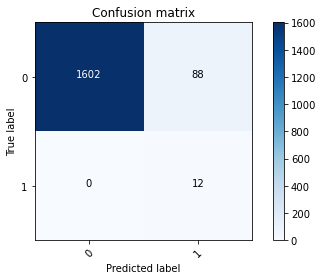

Tempo gasto fold 4 - 00:10:46
For fold 5:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.950646      0.125     1.0  0.222222  0.416667   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.344655  12.0  1606.0   0.975148  
Confusion matrix, without normalization
[[1606   84]
 [   0   12]]


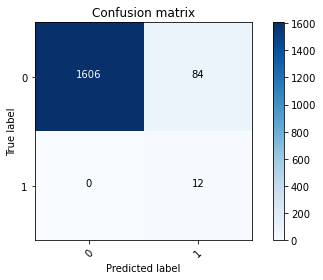

best fold 5
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1690
           1       0.12      1.00      0.22        12

    accuracy                           0.95      1702
   macro avg       0.56      0.98      0.60      1702
weighted avg       0.99      0.95      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.950646      0.125     1.0  0.222222  0.416667   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.344655  12.0  1606.0   0.975148  
Confusion matrix, without normalization
[[1606   84]
 [   0   12]]


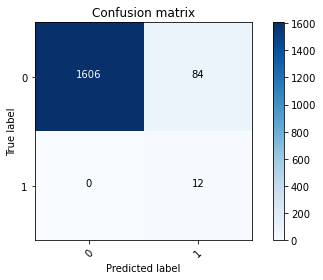

Tempo gasto fold 5 - 00:12:10
For fold 6:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      0.92      0.27        12

    accuracy                           0.96      1702
   macro avg       0.58      0.94      0.62      1702
weighted avg       0.99      0.96      0.98      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.96416    0.15493  0.916667   0.26506  0.462185   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.368752  11.0  1630.0   0.940582  
Confusion matrix, without normalization
[[1630   60]
 [   1   11]]


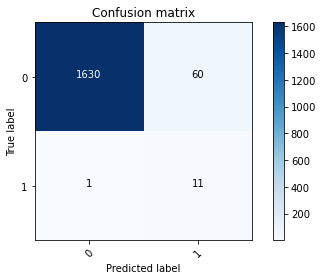

Tempo gasto fold 6 - 00:10:48
For fold 7:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.35      0.75      0.47        12

    accuracy                           0.99      1702
   macro avg       0.67      0.87      0.73      1702
weighted avg       0.99      0.99      0.99      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.988249   0.346154    0.75  0.473684  0.608108   

                            MCC   TP      TN  ROC Curve  
Grid Soft UnderSample  0.504786  9.0  1673.0    0.86997  
Confusion matrix, without normalization
[[1673   17]
 [   3    9]]


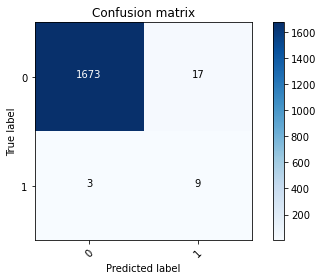

Tempo gasto fold 7 - 00:12:03
For fold 8:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      1.00      0.26        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.62      1702
weighted avg       0.99      0.96      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.959459   0.148148     1.0  0.258065  0.465116   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.376961  12.0  1621.0   0.979586  
Confusion matrix, without normalization
[[1621   69]
 [   0   12]]


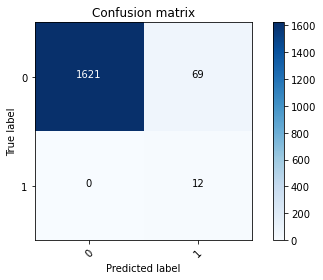

best fold 8
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1690
           1       0.15      1.00      0.26        12

    accuracy                           0.96      1702
   macro avg       0.57      0.98      0.62      1702
weighted avg       0.99      0.96      0.97      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.959459   0.148148     1.0  0.258065  0.465116   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.376961  12.0  1621.0   0.979586  
Confusion matrix, without normalization
[[1621   69]
 [   0   12]]


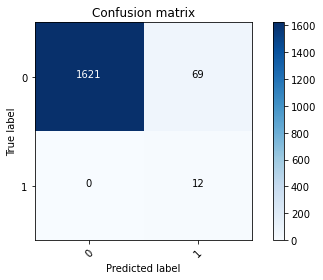

Tempo gasto fold 8 - 09:04:53
For fold 9:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.21      1.00      0.35        12

    accuracy                           0.97      1702
   macro avg       0.61      0.99      0.67      1702
weighted avg       0.99      0.97      0.98      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.974148   0.214286     1.0  0.352941  0.576923   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.456844  12.0  1646.0   0.986982  
Confusion matrix, without normalization
[[1646   44]
 [   0   12]]


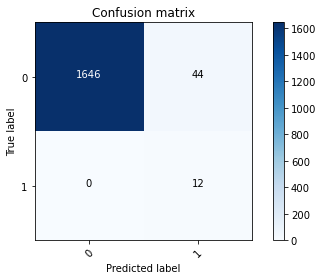

best fold 9
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.21      1.00      0.35        12

    accuracy                           0.97      1702
   macro avg       0.61      0.99      0.67      1702
weighted avg       0.99      0.97      0.98      1702

                        Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.974148   0.214286     1.0  0.352941  0.576923   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.456844  12.0  1646.0   0.986982  
Confusion matrix, without normalization
[[1646   44]
 [   0   12]]


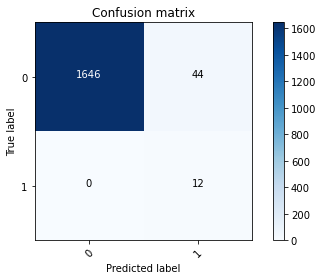

Tempo gasto fold 9 - 08:56:51
For fold 10:
Grid Soft UnderSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.33      0.92      0.49        12

    accuracy                           0.99      1702
   macro avg       0.67      0.95      0.74      1702
weighted avg       0.99      0.99      0.99      1702

                        Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.986486   0.333333  0.916667  0.488889  0.679012   

                            MCC    TP      TN  ROC Curve  
Grid Soft UnderSample  0.548338  11.0  1668.0   0.951824  
Confusion matrix, without normalization
[[1668   22]
 [   1   11]]


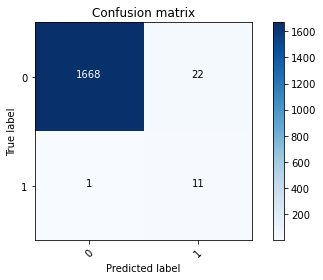

Tempo gasto fold 10 - 00:15:06

{'weights': [0, 0, 0, 0, 0, 0, 0.5]} 0.8666666666666666
{'weights': [0, 0, 0, 0, 0, 0, 1]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0, 0.5, 0]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 0.5, 0.5]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 0.5, 1]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 1, 0]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 1, 0.5]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 1, 1]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 0, 0]} 0.8523809523809522
{'weights': [0, 0, 0, 0, 0.5, 0, 0.5]} 0.8666666666666666
{'weights': [0, 0, 0, 0, 0.5, 0, 1]} 0.8619047619047618
{'weights': [0, 0, 0, 0, 0.5, 0.5, 0]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 0.5, 0.5]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 0.5, 1]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 1, 0]} 0.8809523809523808
{'weights': [0, 0, 0, 0, 0.5, 1, 0.5]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 1, 1]} 0.8761904761904761
{'weight

{'weights': [0, 0.5, 1, 0, 0, 0, 1]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0, 0.5, 0]} 0.919047619047619
{'weights': [0, 0.5, 1, 0, 0, 0.5, 0.5]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0, 0.5, 1]} 0.919047619047619
{'weights': [0, 0.5, 1, 0, 0, 1, 0]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0, 1, 0.5]} 0.919047619047619
{'weights': [0, 0.5, 1, 0, 0, 1, 1]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 0, 0]} 0.919047619047619
{'weights': [0, 0.5, 1, 0, 0.5, 0, 0.5]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 0, 1]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 0.5, 0]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 0.5, 0.5]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 0.5, 1]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 1, 0]} 0.919047619047619
{'weights': [0, 0.5, 1, 0, 0.5, 1, 0.5]} 0.9142857142857143
{'weights': [0, 0.5, 1, 0, 0.5, 1, 1]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0, 1, 0, 0]} 0.9142857142857143
{'weights': [

{'weights': [0.5, 0.5, 0, 0, 1, 0.5, 0.5]} 0.8904761904761905
{'weights': [0.5, 0.5, 0, 0, 1, 0.5, 1]} 0.8857142857142858
{'weights': [0.5, 0.5, 0, 0, 1, 1, 0]} 0.8904761904761905
{'weights': [0.5, 0.5, 0, 0, 1, 1, 0.5]} 0.8857142857142858
{'weights': [0.5, 0.5, 0, 0, 1, 1, 1]} 0.8857142857142858
{'weights': [0.5, 0.5, 0, 0.5, 0, 0, 0]} 0.9238095238095237
{'weights': [0.5, 0.5, 0, 0.5, 0, 0, 0.5]} 0.9142857142857143
{'weights': [0.5, 0.5, 0, 0.5, 0, 0, 1]} 0.9047619047619048
{'weights': [0.5, 0.5, 0, 0.5, 0, 0.5, 0]} 0.9142857142857143
{'weights': [0.5, 0.5, 0, 0.5, 0, 0.5, 0.5]} 0.9047619047619048
{'weights': [0.5, 0.5, 0, 0.5, 0, 0.5, 1]} 0.8952380952380953
{'weights': [0.5, 0.5, 0, 0.5, 0, 1, 0]} 0.9047619047619048
{'weights': [0.5, 0.5, 0, 0.5, 0, 1, 0.5]} 0.8952380952380953
{'weights': [0.5, 0.5, 0, 0.5, 0, 1, 1]} 0.8952380952380953
{'weights': [0.5, 0.5, 0, 0.5, 0.5, 0, 0]} 0.919047619047619
{'weights': [0.5, 0.5, 0, 0.5, 0.5, 0, 0.5]} 0.8952380952380953
{'weights': [0.5, 0.5, 0,

{'weights': [1, 0, 0.5, 0.5, 1, 1, 1]} 0.9
{'weights': [1, 0, 0.5, 1, 0, 0, 0]} 0.919047619047619
{'weights': [1, 0, 0.5, 1, 0, 0, 0.5]} 0.9095238095238095
{'weights': [1, 0, 0.5, 1, 0, 0, 1]} 0.9047619047619048
{'weights': [1, 0, 0.5, 1, 0, 0.5, 0]} 0.9142857142857143
{'weights': [1, 0, 0.5, 1, 0, 0.5, 0.5]} 0.9047619047619048
{'weights': [1, 0, 0.5, 1, 0, 0.5, 1]} 0.9
{'weights': [1, 0, 0.5, 1, 0, 1, 0]} 0.9095238095238095
{'weights': [1, 0, 0.5, 1, 0, 1, 0.5]} 0.9
{'weights': [1, 0, 0.5, 1, 0, 1, 1]} 0.8952380952380953
{'weights': [1, 0, 0.5, 1, 0.5, 0, 0]} 0.9095238095238095
{'weights': [1, 0, 0.5, 1, 0.5, 0, 0.5]} 0.9047619047619048
{'weights': [1, 0, 0.5, 1, 0.5, 0, 1]} 0.9
{'weights': [1, 0, 0.5, 1, 0.5, 0.5, 0]} 0.9047619047619048
{'weights': [1, 0, 0.5, 1, 0.5, 0.5, 0.5]} 0.9
{'weights': [1, 0, 0.5, 1, 0.5, 0.5, 1]} 0.8952380952380953
{'weights': [1, 0, 0.5, 1, 0.5, 1, 0]} 0.9
{'weights': [1, 0, 0.5, 1, 0.5, 1, 0.5]} 0.8952380952380953
{'weights': [1, 0, 0.5, 1, 0.5, 1, 1]} 0.

{'weights': [1, 0.5, 0.5, 1, 0, 0.5, 1]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0, 1, 0]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0, 1, 0.5]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0, 1, 1]} 0.9047619047619048
{'weights': [1, 0.5, 0.5, 1, 0.5, 0, 0]} 0.9238095238095237
{'weights': [1, 0.5, 0.5, 1, 0.5, 0, 0.5]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0.5, 0, 1]} 0.9047619047619048
{'weights': [1, 0.5, 0.5, 1, 0.5, 0.5, 0]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0.5, 0.5, 0.5]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0.5, 0.5, 1]} 0.9
{'weights': [1, 0.5, 0.5, 1, 0.5, 1, 0]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 0.5, 1, 0.5]} 0.9047619047619048
{'weights': [1, 0.5, 0.5, 1, 0.5, 1, 1]} 0.9
{'weights': [1, 0.5, 0.5, 1, 1, 0, 0]} 0.9095238095238095
{'weights': [1, 0.5, 0.5, 1, 1, 0, 0.5]} 0.9047619047619048
{'weights': [1, 0.5, 0.5, 1, 1, 0, 1]} 0.9
{'weights': [1, 0.5, 0.5, 1, 1, 0.5, 0]} 0.9047619047619048
{'weights': [1, 0.5, 

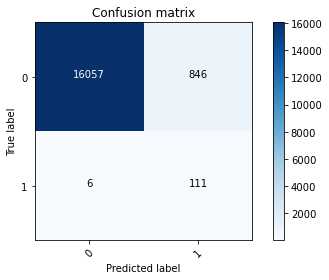

In [98]:
results_metrics, results_cv, bestModel = cv(X, y, gs, 'Grid Soft UnderSample', rus, params=params)
grid_results = grid_results.append(results_metrics)

In [99]:
grid_results

Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.949941   0.115987  0.948718  0.206704  0.389474   

                            MCC     TP       TN  ROC Curve  
Grid Soft UnderSample  0.322333  111.0  16057.0   0.949334

For fold 1:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.84      1702
   macro avg       0.52      0.92      0.50      1702
weighted avg       0.99      0.84      0.91      1702

                       Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.844301   0.039855     1.0  0.076655  0.171875   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.183328  11.0  1426.0   0.921644  
Confusion matrix, without normalization
[[1426  265]
 [   0   11]]


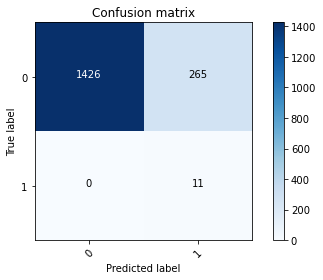

best fold 1
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1691
           1       0.04      1.00      0.08        11

    accuracy                           0.84      1702
   macro avg       0.52      0.92      0.50      1702
weighted avg       0.99      0.84      0.91      1702

                       Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.844301   0.039855     1.0  0.076655  0.171875   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.183328  11.0  1426.0   0.921644  
Confusion matrix, without normalization
[[1426  265]
 [   0   11]]


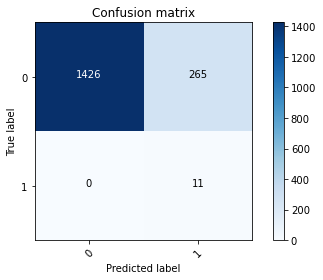

Tempo gasto fold 1 - 00:48:12
For fold 2:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                       Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.931257   0.085938     1.0  0.158273  0.319767   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.282828  11.0  1574.0   0.965405  
Confusion matrix, without normalization
[[1574  117]
 [   0   11]]


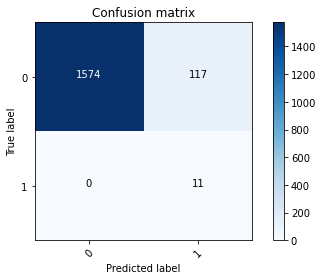

best fold 2
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.09      1.00      0.16        11

    accuracy                           0.93      1702
   macro avg       0.54      0.97      0.56      1702
weighted avg       0.99      0.93      0.96      1702

                       Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.931257   0.085938     1.0  0.158273  0.319767   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.282828  11.0  1574.0   0.965405  
Confusion matrix, without normalization
[[1574  117]
 [   0   11]]


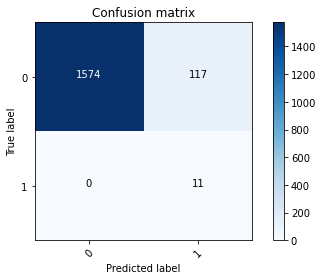

Tempo gasto fold 2 - 00:11:12
For fold 3:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1691
           1       0.07      0.91      0.14        11

    accuracy                           0.93      1702
   macro avg       0.54      0.92      0.55      1702
weighted avg       0.99      0.93      0.96      1702

                       Acuracy  Precision    Recall  F1-score   F-beta  \
Grid Soft OverSample  0.925969   0.074074  0.909091  0.136986  0.27933   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.247652  10.0  1566.0   0.917585  
Confusion matrix, without normalization
[[1566  125]
 [   1   10]]


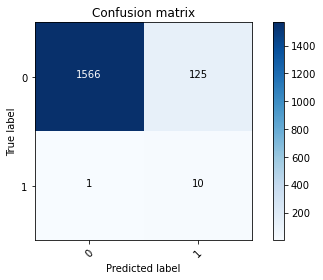

Tempo gasto fold 3 - 00:51:50
For fold 4:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.93302   0.095238     1.0  0.173913  0.344828   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.298016  12.0  1576.0   0.966272  
Confusion matrix, without normalization
[[1576  114]
 [   0   12]]


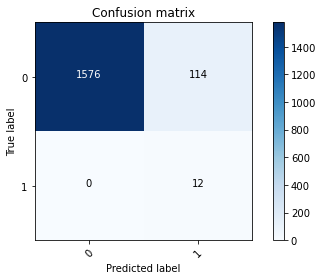

best fold 4
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1690
           1       0.10      1.00      0.17        12

    accuracy                           0.93      1702
   macro avg       0.55      0.97      0.57      1702
weighted avg       0.99      0.93      0.96      1702

                      Acuracy  Precision  Recall  F1-score    F-beta  \
Grid Soft OverSample  0.93302   0.095238     1.0  0.173913  0.344828   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.298016  12.0  1576.0   0.966272  
Confusion matrix, without normalization
[[1576  114]
 [   0   12]]


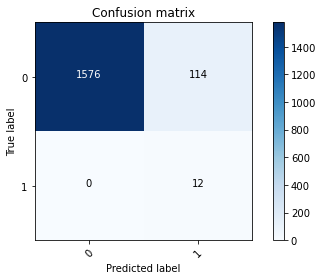

Tempo gasto fold 4 - 00:42:00
For fold 5:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.19      1.00      0.32        12

    accuracy                           0.97      1702
   macro avg       0.60      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                       Acuracy  Precision  Recall  F1-score    F-beta     MCC  \
Grid Soft OverSample  0.970035   0.190476     1.0      0.32  0.540541  0.4298   

                        TP      TN  ROC Curve  
Grid Soft OverSample  12.0  1639.0   0.984911  
Confusion matrix, without normalization
[[1639   51]
 [   0   12]]


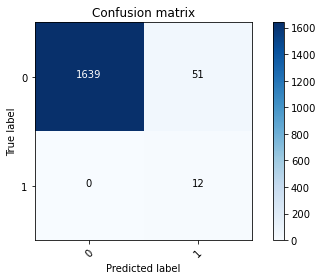

best fold 5
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.19      1.00      0.32        12

    accuracy                           0.97      1702
   macro avg       0.60      0.98      0.65      1702
weighted avg       0.99      0.97      0.98      1702

                       Acuracy  Precision  Recall  F1-score    F-beta     MCC  \
Grid Soft OverSample  0.970035   0.190476     1.0      0.32  0.540541  0.4298   

                        TP      TN  ROC Curve  
Grid Soft OverSample  12.0  1639.0   0.984911  
Confusion matrix, without normalization
[[1639   51]
 [   0   12]]


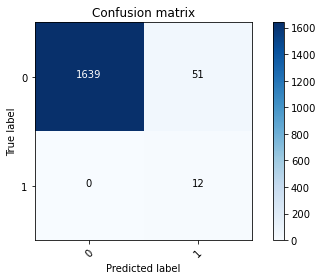

Tempo gasto fold 5 - 05:18:49
For fold 6:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1690
           1       0.17      0.92      0.28        12

    accuracy                           0.97      1702
   macro avg       0.58      0.94      0.63      1702
weighted avg       0.99      0.97      0.98      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft OverSample  0.967098   0.166667  0.916667  0.282051  0.482456   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.383162  11.0  1635.0   0.942061  
Confusion matrix, without normalization
[[1635   55]
 [   1   11]]


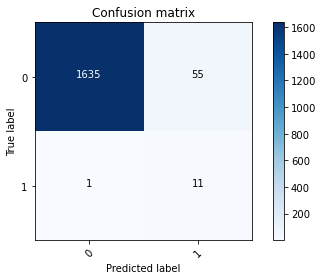

Tempo gasto fold 6 - 00:13:49
For fold 7:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.26      0.92      0.40        12

    accuracy                           0.98      1702
   macro avg       0.63      0.95      0.70      1702
weighted avg       0.99      0.98      0.99      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft OverSample  0.980611   0.255814  0.916667       0.4  0.604396   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.478656  11.0  1658.0   0.948866  
Confusion matrix, without normalization
[[1658   32]
 [   1   11]]


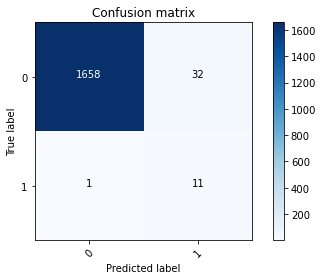

Tempo gasto fold 7 - 02:30:25
For fold 8:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1690
           1       0.18      0.83      0.30        12

    accuracy                           0.97      1702
   macro avg       0.59      0.90      0.64      1702
weighted avg       0.99      0.97      0.98      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft OverSample  0.972385   0.181818  0.833333  0.298507  0.485437   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.381699  10.0  1645.0   0.903353  
Confusion matrix, without normalization
[[1645   45]
 [   2   10]]


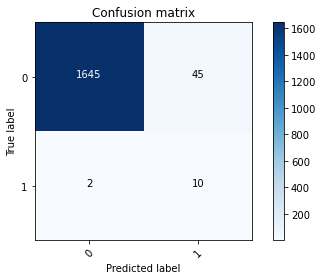

Tempo gasto fold 8 - 00:10:23
For fold 9:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1690
           1       0.24      0.92      0.38        12

    accuracy                           0.98      1702
   macro avg       0.62      0.95      0.68      1702
weighted avg       0.99      0.98      0.98      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft OverSample  0.978848    0.23913  0.916667   0.37931  0.585106   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.462287  11.0  1655.0   0.947978  
Confusion matrix, without normalization
[[1655   35]
 [   1   11]]


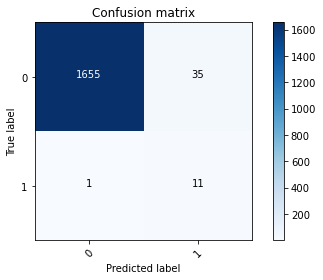

Tempo gasto fold 9 - 00:28:58
For fold 10:
Grid Soft OverSample

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1690
           1       0.41      0.92      0.56        12

    accuracy                           0.99      1702
   macro avg       0.70      0.95      0.78      1702
weighted avg       1.00      0.99      0.99      1702

                       Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft OverSample  0.990012   0.407407  0.916667  0.564103  0.733333   

                           MCC    TP      TN  ROC Curve  
Grid Soft OverSample  0.607501  11.0  1674.0     0.9536  
Confusion matrix, without normalization
[[1674   16]
 [   1   11]]


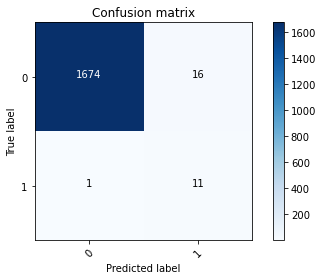

Tempo gasto fold 10 - 00:19:41

{'weights': [0, 0, 0, 0, 0, 0, 0.5]} 0.8619047619047618
{'weights': [0, 0, 0, 0, 0, 0, 1]} 0.8619047619047618
{'weights': [0, 0, 0, 0, 0, 0.5, 0]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0, 0.5, 0.5]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0, 0.5, 1]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0, 1, 0]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0, 1, 0.5]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0, 1, 1]} 0.8761904761904761
{'weights': [0, 0, 0, 0, 0.5, 0, 0]} 0.8428571428571427
{'weights': [0, 0, 0, 0, 0.5, 0, 0.5]} 0.8571428571428571
{'weights': [0, 0, 0, 0, 0.5, 0, 1]} 0.8571428571428571
{'weights': [0, 0, 0, 0, 0.5, 0.5, 0]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0.5, 0.5, 0.5]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0.5, 0.5, 1]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0.5, 1, 0]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0.5, 1, 0.5]} 0.8714285714285713
{'weights': [0, 0, 0, 0, 0.5, 1, 1]} 0.8714285714285713
{'weight

{'weights': [0, 0.5, 1, 0, 0.5, 0.5, 1]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0, 0.5, 1, 0]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0, 0.5, 1, 0.5]} 0.880952380952381
{'weights': [0, 0.5, 1, 0, 0.5, 1, 1]} 0.8857142857142858
{'weights': [0, 0.5, 1, 0, 1, 0, 0]} 0.8904761904761905
{'weights': [0, 0.5, 1, 0, 1, 0, 0.5]} 0.9047619047619048
{'weights': [0, 0.5, 1, 0, 1, 0, 1]} 0.9047619047619048
{'weights': [0, 0.5, 1, 0, 1, 0.5, 0]} 0.9
{'weights': [0, 0.5, 1, 0, 1, 0.5, 0.5]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0, 1, 0.5, 1]} 0.8904761904761905
{'weights': [0, 0.5, 1, 0, 1, 1, 0]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0, 1, 1, 0.5]} 0.9
{'weights': [0, 0.5, 1, 0, 1, 1, 1]} 0.8952380952380953
{'weights': [0, 0.5, 1, 0.5, 0, 0, 0]} 0.9
{'weights': [0, 0.5, 1, 0.5, 0, 0, 0.5]} 0.9047619047619048
{'weights': [0, 0.5, 1, 0.5, 0, 0, 1]} 0.9
{'weights': [0, 0.5, 1, 0.5, 0, 0.5, 0]} 0.9047619047619048
{'weights': [0, 0.5, 1, 0.5, 0, 0.5, 0.5]} 0.9047619047619048
{'weights':

{'weights': [0.5, 0, 1, 0.5, 0, 0, 0]} 0.9142857142857143
{'weights': [0.5, 0, 1, 0.5, 0, 0, 0.5]} 0.9095238095238095
{'weights': [0.5, 0, 1, 0.5, 0, 0, 1]} 0.8952380952380953
{'weights': [0.5, 0, 1, 0.5, 0, 0.5, 0]} 0.9142857142857143
{'weights': [0.5, 0, 1, 0.5, 0, 0.5, 0.5]} 0.8952380952380953
{'weights': [0.5, 0, 1, 0.5, 0, 0.5, 1]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0, 1, 0]} 0.8904761904761905
{'weights': [0.5, 0, 1, 0.5, 0, 1, 0.5]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0, 1, 1]} 0.8904761904761905
{'weights': [0.5, 0, 1, 0.5, 0.5, 0, 0]} 0.9095238095238095
{'weights': [0.5, 0, 1, 0.5, 0.5, 0, 0.5]} 0.9
{'weights': [0.5, 0, 1, 0.5, 0.5, 0, 1]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0.5, 0.5, 0]} 0.8952380952380953
{'weights': [0.5, 0, 1, 0.5, 0.5, 0.5, 0.5]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0.5, 0.5, 1]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0.5, 1, 0]} 0.8857142857142858
{'weights': [0.5, 0, 1, 0.5, 0.5, 1, 0.5]} 0.890476

{'weights': [0.5, 0.5, 1, 0.5, 0, 1, 0.5]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0, 1, 1]} 0.8904761904761905
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0, 0]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0, 0.5]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0, 1]} 0.9
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0.5, 0]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0.5, 0.5]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 0.5, 1]} 0.8904761904761905
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 1, 0]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 1, 0.5]} 0.880952380952381
{'weights': [0.5, 0.5, 1, 0.5, 0.5, 1, 1]} 0.8761904761904761
{'weights': [0.5, 0.5, 1, 0.5, 1, 0, 0]} 0.9047619047619048
{'weights': [0.5, 0.5, 1, 0.5, 1, 0, 0.5]} 0.9
{'weights': [0.5, 0.5, 1, 0.5, 1, 0, 1]} 0.8952380952380953
{'weights': [0.5, 0.5, 1, 0.5, 1, 0.5, 0]} 0.9
{'weights': [0.5, 0.5, 1, 0.5, 1, 0.5, 0.5]} 0.8857142857142858
{'weights': [0.5, 0.5, 1, 0.5, 1, 0.5, 1]} 0.8

{'weights': [1, 0.5, 0, 0.5, 0, 0.5, 1]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 0, 1, 0]} 0.8809523809523808
{'weights': [1, 0.5, 0, 0.5, 0, 1, 0.5]} 0.8809523809523808
{'weights': [1, 0.5, 0, 0.5, 0, 1, 1]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 0.5, 0, 0]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 0.5, 0, 0.5]} 0.8857142857142856
{'weights': [1, 0.5, 0, 0.5, 0.5, 0, 1]} 0.8952380952380953
{'weights': [1, 0.5, 0, 0.5, 0.5, 0.5, 0]} 0.8952380952380953
{'weights': [1, 0.5, 0, 0.5, 0.5, 0.5, 0.5]} 0.8952380952380953
{'weights': [1, 0.5, 0, 0.5, 0.5, 0.5, 1]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 0.5, 1, 0]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 0.5, 1, 0.5]} 0.8761904761904761
{'weights': [1, 0.5, 0, 0.5, 0.5, 1, 1]} 0.8714285714285713
{'weights': [1, 0.5, 0, 0.5, 1, 0, 0]} 0.8809523809523808
{'weights': [1, 0.5, 0, 0.5, 1, 0, 0.5]} 0.8857142857142858
{'weights': [1, 0.5, 0, 0.5, 1, 0, 1]} 0.8809523809523808
{'weights': [1, 0.5, 0, 0.5, 1, 0.5,

{'weights': [1, 1, 0.5, 0, 1, 0.5, 1]} 0.9047619047619048
{'weights': [1, 1, 0.5, 0, 1, 1, 0]} 0.9
{'weights': [1, 1, 0.5, 0, 1, 1, 0.5]} 0.8904761904761905
{'weights': [1, 1, 0.5, 0, 1, 1, 1]} 0.8857142857142858
{'weights': [1, 1, 0.5, 0.5, 0, 0, 0]} 0.880952380952381
{'weights': [1, 1, 0.5, 0.5, 0, 0, 0.5]} 0.8952380952380953
{'weights': [1, 1, 0.5, 0.5, 0, 0, 1]} 0.8857142857142856
{'weights': [1, 1, 0.5, 0.5, 0, 0.5, 0]} 0.8857142857142858
{'weights': [1, 1, 0.5, 0.5, 0, 0.5, 0.5]} 0.9047619047619048
{'weights': [1, 1, 0.5, 0.5, 0, 0.5, 1]} 0.9
{'weights': [1, 1, 0.5, 0.5, 0, 1, 0]} 0.8904761904761903
{'weights': [1, 1, 0.5, 0.5, 0, 1, 0.5]} 0.9
{'weights': [1, 1, 0.5, 0.5, 0, 1, 1]} 0.8809523809523808
{'weights': [1, 1, 0.5, 0.5, 0.5, 0, 0]} 0.8857142857142858
{'weights': [1, 1, 0.5, 0.5, 0.5, 0, 0.5]} 0.8904761904761903
{'weights': [1, 1, 0.5, 0.5, 0.5, 0, 1]} 0.8857142857142856
{'weights': [1, 1, 0.5, 0.5, 0.5, 0.5, 0]} 0.8904761904761903
{'weights': [1, 1, 0.5, 0.5, 0.5, 0.5, 0

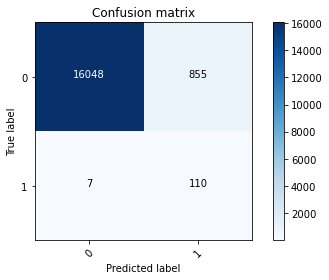

In [94]:
results_metrics, results_cv, bestModel = cv(X, y, gs, 'Grid Soft OverSample', ros, params=params)
grid_results = grid_results.append(results_metrics)

In [95]:
grid_results

Acuracy  Precision    Recall  F1-score    F-beta  \
Grid Soft UnderSample  0.950646   0.113369  0.905983  0.201521  0.377762   
Grid Soft OverSample   0.949354   0.113990  0.940171  0.203327  0.383810   

                            MCC     TP       TN  ROC Curve  
Grid Soft UnderSample  0.310748  106.0  16074.0   0.928469  
Grid Soft OverSample   0.317830  110.0  16048.0   0.944794

In [81]:
results_metrics, results_cv, bestModel = cv(X, y, gs, 'Grid Soft SMOTE', smt, params=params)
grid_results = grid_results.append(results_metrics)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




Traceback (most recent call last):
  File "/Users/julia/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 921, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/julia/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "/Users/julia/opt/anaconda3/lib/python3.7/concurrent/futures/_base.py", line 430, in result
    self._condition.wait(timeout)
  File "/Users/julia/opt/anaconda3/lib/python3.7/threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/Users/julia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py", line 1288, in _ru

TypeError: object of type 'NoneType' has no len()

In [ ]:
grid_results